In [1]:
from matplotlib import pyplot as plt
import matplotlib.patheffects as mpe
from visualize_graphs import *
import numpy as np
from CompilerQC import paths
import matplotlib.patches as patches
import matplotlib.patheffects as mpe

from scipy.special import binom
import matplotlib.colors as mcolors
import matplotlib.cm as cm


from shapely.geometry import Polygon
from itertools import combinations
from CompilerQC import *
import random
import matplotlib



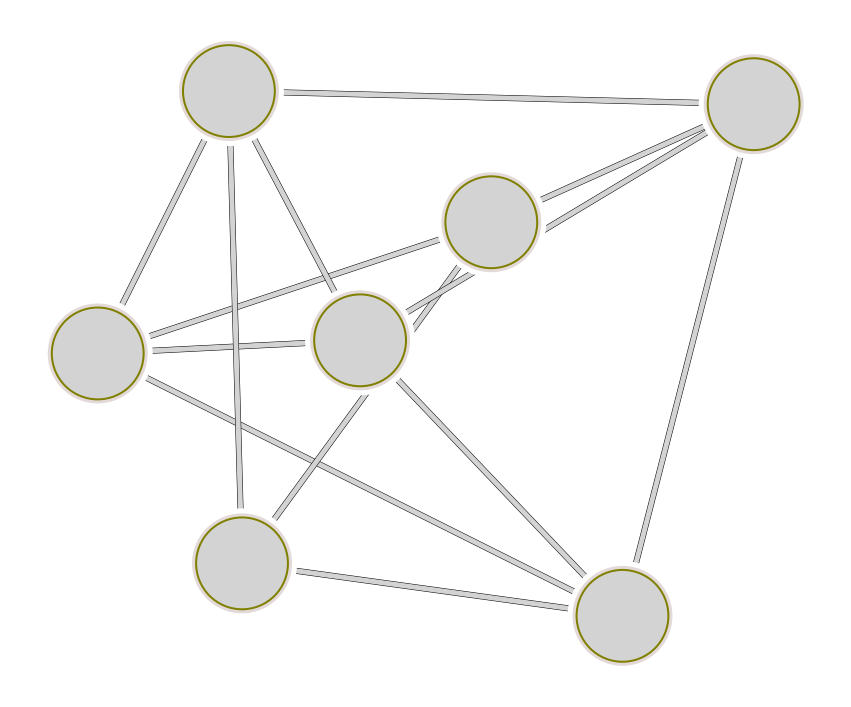

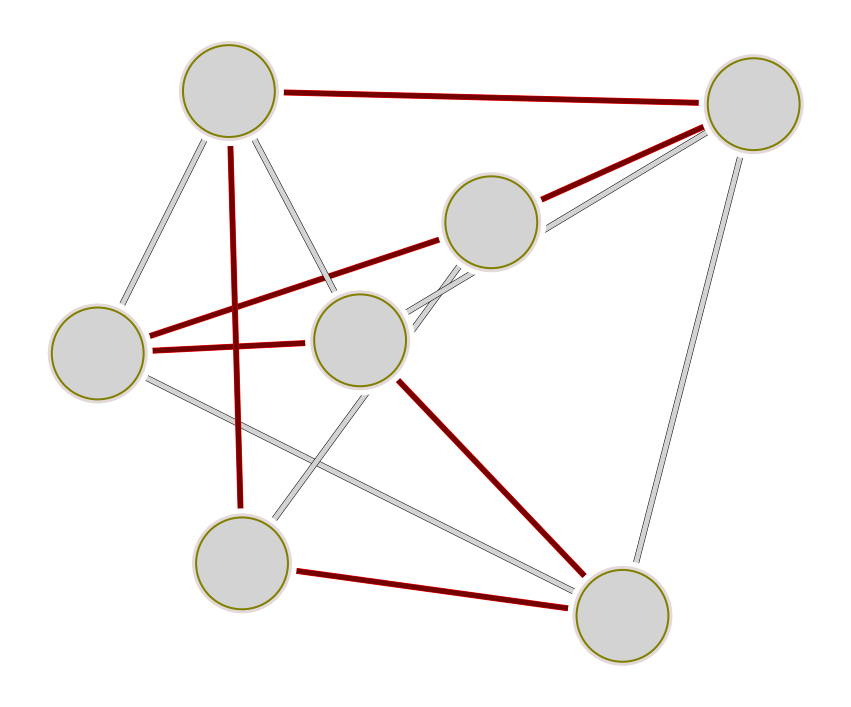

In [2]:
# TSP, noTSP, maxcu...
figsize = (15, 15)
edges = Edges([])
circles = Circles([])
for idx, (i, j) in enumerate([(0, 2), (1, 4), (3, 3), (5, 3.9), (4, 0), (2, 2.1), (1.1, 0.4)]):
    circles.add_circle(Circle(coord=(i, j), name="", fontsize=40))
    
edges_ = [
    ((0, 2), (1, 4)),
     ((0, 2), (3, 3)),
     ((0, 2), (4, 0)),
     ((0, 2), (2, 2.1)),
     ((1, 4), (5, 3.9)),
     ((1, 4), (2, 2.1)),
     ((1, 4), (1.1, 0.4)),
     ((3, 3), (5, 3.9)),
     ((3, 3), (1.1, 0.4)),
     ((5, 3.9), (4, 0)),
     ((5, 3.9), (2, 2.1)),
     ((4, 0), (2, 2.1)),
     ((4, 0), (1.1, 0.4))
]
edges = Edges(edges_)
tsps = [[], [
     ((0, 2), (3, 3)),
     ((0, 2), (2, 2.1)),
     ((1, 4), (5, 3.9)),
     ((1, 4), (1.1, 0.4)),
     ((3, 3), (5, 3.9)),
     ((4, 0), (2, 2.1)),
     ((4, 0), (1.1, 0.4))
]]
for tsp in tsps: 


    for edge in edges:
        if edge.edge in tsp:
            edge.tsp = True
        else:
            edge.tsp = False

    _, ax = plt.subplots(figsize=figsize)
    ax.set_aspect('equal', 'box')
    ax.axis('off')
    ax.scatter(*circles.xy, color="black", s=0, alpha=1)

    for edge in edges:
        edge.linewidth = 5
        edge.edgewidth= 6
        edge.alpha=0.1
        if edge.tsp:
            edge.linewidth = 5
            edge.color = "#750000"
            edge.edgewidth= 6

            edge.edgecolor = 'red'
        outline=mpe.withStroke(linewidth=edge.edgewidth, foreground=edge.edgecolor)
        ax.plot(*edge.xy, color=edge.color, linewidth=edge.linewidth, path_effects=[outline])


    for circle in circles:
        circle.size=0.35
        circle.linewidth = 2
        circle.edgecolor = "olive"
        if circle.name is not None:
            label = ax.annotate(
                r"{}".format(circle.name),
                xy=circle.coord,
                ha="center",
                va="center",
                fontsize=circle.fontsize,
                zorder=5,
            )
        patch = plt.Circle(
            circle.coord,
            radius=circle.size+0.05,
            alpha=1,
            fill=True,
            fc='#e3d9d9',
            lw=5,
            ec='white',
            zorder=circle.zorder
        )
        ax.add_patch(patch)

        ax.add_patch(circle.patch)
        #ax.arrow(circle.coord[0], circle.coord[1] - circle.size, 0, circle.size, linewidth=6,head_width=0.1, head_length=0.2, fc='k', ec='k', zorder=6)
        #ax.arrow(circle.coord[0] , circle.coord[1] + circle.size, 0, - circle.size, linewidth=6,head_width=0.1, head_length=0.2, fc='k', ec='k', zorder=6)
    if tsp == []:
        plt.savefig(paths.plots / "Figures/illustration_of_TSP_no_red_line.pdf",bbox_inches='tight')
        plt.savefig(paths.plots / "Figures/pngs/illustration_of_TSP_no_red_line.png",bbox_inches='tight')
    else:
        plt.savefig(paths.plots / "Figures/illustration_of_TSP.pdf",bbox_inches='tight')
        plt.savefig(paths.plots / "Figures/pngs/illustration_of_TSP.png",bbox_inches='tight')

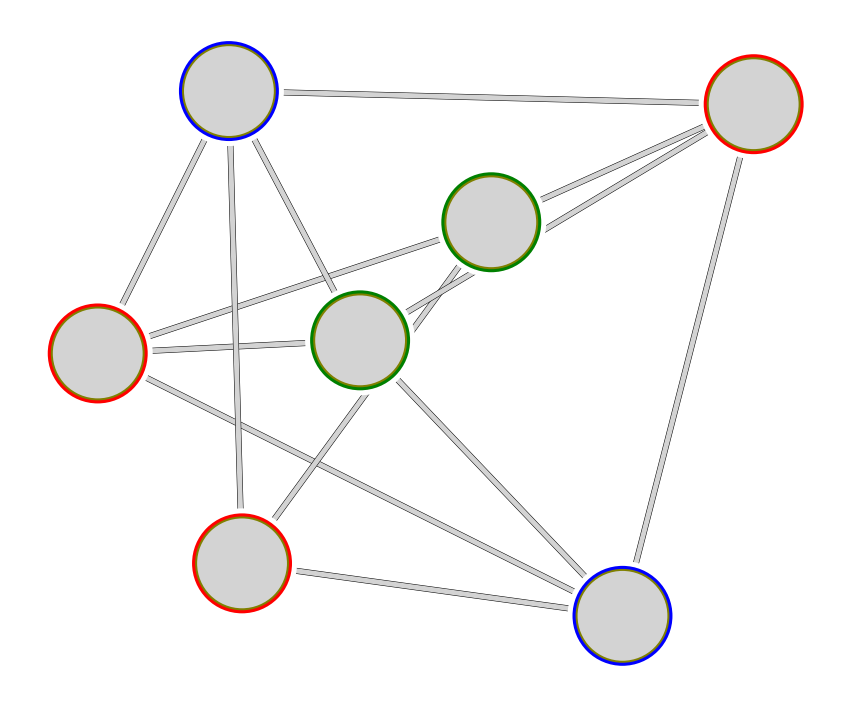

In [3]:
# grap color
figsize = (15, 15)
edges = Edges([])
circles = Circles([])
for idx, (i, j) in enumerate([(0, 2), (1, 4), (3, 3), (5, 3.9), (4, 0), (2, 2.1), (1.1, 0.4)]):
    circles.add_circle(Circle(coord=(i, j), name="", fontsize=40))
    
edges_ = [
    ((0, 2), (1, 4)),
     ((0, 2), (3, 3)),
     ((0, 2), (4, 0)),
     ((0, 2), (2, 2.1)),
     ((1, 4), (5, 3.9)),
     ((1, 4), (2, 2.1)),
     ((1, 4), (1.1, 0.4)),
     ((3, 3), (5, 3.9)),
     ((3, 3), (1.1, 0.4)),
     ((5, 3.9), (4, 0)),
     ((5, 3.9), (2, 2.1)),
     ((4, 0), (2, 2.1)),
     ((4, 0), (1.1, 0.4))
]
edges = Edges(edges_)
color_ = ['red', 'blue', 'green', 'red', 'blue', 'green', 'red']


_, ax = plt.subplots(figsize=figsize)
ax.set_aspect('equal', 'box')
ax.axis('off')
ax.scatter(*circles.xy, color="black", s=0, alpha=1)

for edge in edges:
    edge.linewidth = 5
    edge.edgewidth= 6
    edge.alpha=0.1
    outline=mpe.withStroke(linewidth=edge.edgewidth, foreground=edge.edgecolor)
    ax.plot(*edge.xy, color=edge.color, linewidth=edge.linewidth, path_effects=[outline])


for idx, circle in enumerate(circles.circles):
    circle.size=0.35
    circle.linewidth = 2
    circle.edgecolor = "olive"
    if circle.name is not None:
        label = ax.annotate(
            r"{}".format(circle.name),
            xy=circle.coord,
            ha="center",
            va="center",
            fontsize=circle.fontsize,
            zorder=5,
        )
    patch = plt.Circle(
        circle.coord,
        radius=circle.size+0.05,
        alpha=1,
        fill=True,
        fc=color_[idx],
        lw=5,
        ec='white',
        zorder=circle.zorder
    )
    ax.add_patch(patch)

    ax.add_patch(circle.patch)

plt.savefig(paths.plots / "Figures/illustration_of_graph_coloring.pdf",bbox_inches='tight')
plt.savefig(paths.plots / "Figures/pngs/illustration_of_graph_coloring.png",bbox_inches='tight')

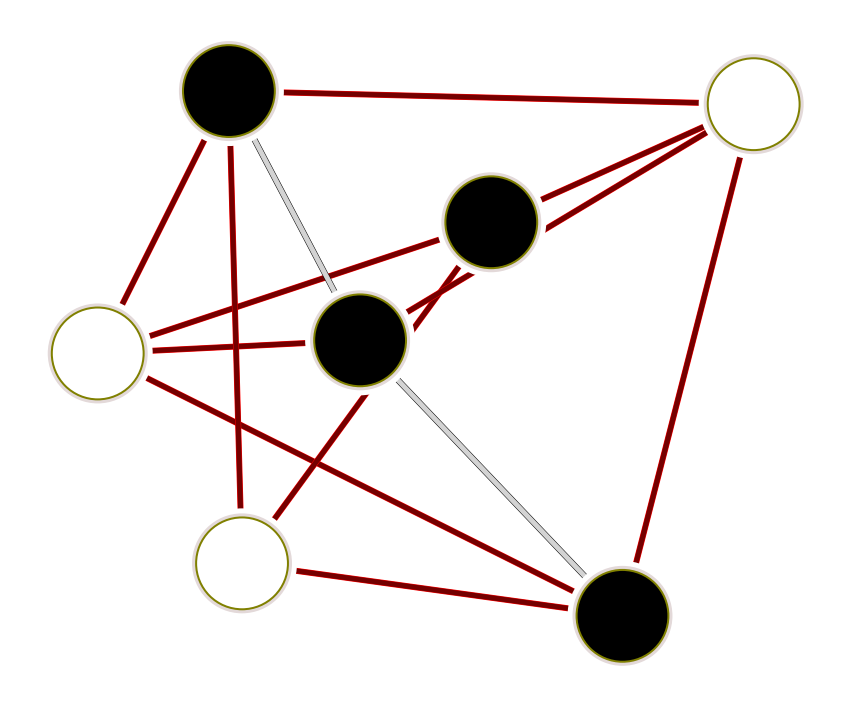

In [4]:
# TSP, noTSP, maxcu...
figsize = (15, 15)
edges = Edges([])
circles = Circles([])
for idx, (i, j) in enumerate([(0, 2), (1, 4), (3, 3), (5, 3.9), (4, 0), (2, 2.1), (1.1, 0.4)]):
    circle = Circle(coord=(i, j), name="", fontsize=40)
    circle.color = 'white'
    if idx in [1, 2, 4, 5]:
        circle.color = 'black'
    circles.add_circle(circle)
    
edges_ = [
    ((0, 2), (1, 4)),
     ((0, 2), (3, 3)),
     ((0, 2), (4, 0)),
     ((0, 2), (2, 2.1)),
     ((1, 4), (5, 3.9)),
     ((1, 4), (2, 2.1)),
     ((1, 4), (1.1, 0.4)),
     ((3, 3), (5, 3.9)),
     ((3, 3), (1.1, 0.4)),
     ((5, 3.9), (4, 0)),
     ((5, 3.9), (2, 2.1)),
     ((4, 0), (2, 2.1)),
     ((4, 0), (1.1, 0.4))
]
edges = Edges(edges_)
tsp = list(set(edges_) - set([((1, 4), (2, 2.1)), ((4, 0), (2, 2.1))]))

for edge in edges:
    if edge.edge in tsp:
        edge.tsp = True
    else:
        edge.tsp = False

_, ax = plt.subplots(figsize=figsize)
ax.set_aspect('equal', 'box')
ax.axis('off')
ax.scatter(*circles.xy, color="black", s=0, alpha=1)

for edge in edges:
    edge.linewidth = 5
    edge.edgewidth= 6
    edge.alpha=0.1
    if edge.tsp:
        edge.linewidth = 5
        edge.color = "#750000"
        edge.edgewidth= 6

        edge.edgecolor = 'red'
    outline=mpe.withStroke(linewidth=edge.edgewidth, foreground=edge.edgecolor)
    ax.plot(*edge.xy, color=edge.color, linewidth=edge.linewidth, path_effects=[outline])


for circle in circles:
    circle.size=0.35
    circle.linewidth = 2
    circle.edgecolor = "olive"
    if circle.name is not None:
        label = ax.annotate(
            r"{}".format(circle.name),
            xy=circle.coord,
            ha="center",
            va="center",
            fontsize=circle.fontsize,
            zorder=5,
        )
    patch = plt.Circle(
        circle.coord,
        radius=circle.size+0.05,
        alpha=1,
        fill=True,
        fc="#e3d9d9",
        lw=5,
        ec='white',
        zorder=circle.zorder
    )
    ax.add_patch(patch)

    ax.add_patch(circle.patch)

# from scipy.interpolate import interp1d

# x = [0, 4, 4.1, 4.3, 4.5, 5]# 2, 4, 5]
# y = [4, 0, 2, 4, 4, 4]# 6, 4, 2]
# fun = interp1d(x=x, y=y, kind=2)
# x2 = np.linspace(start=0, stop=4, num=1000)
# y2 = fun(x2)

# plt.plot(x2, y2, color='b')
# plt.plot(x, y, ls='', marker='o', color='r')
    
    
# plt.savefig(paths.plots / "Figures/illustration_of_maxcut.pdf")
# plt.savefig(paths.plots / "Figures/pngs/illustration_of_maxcut.png")

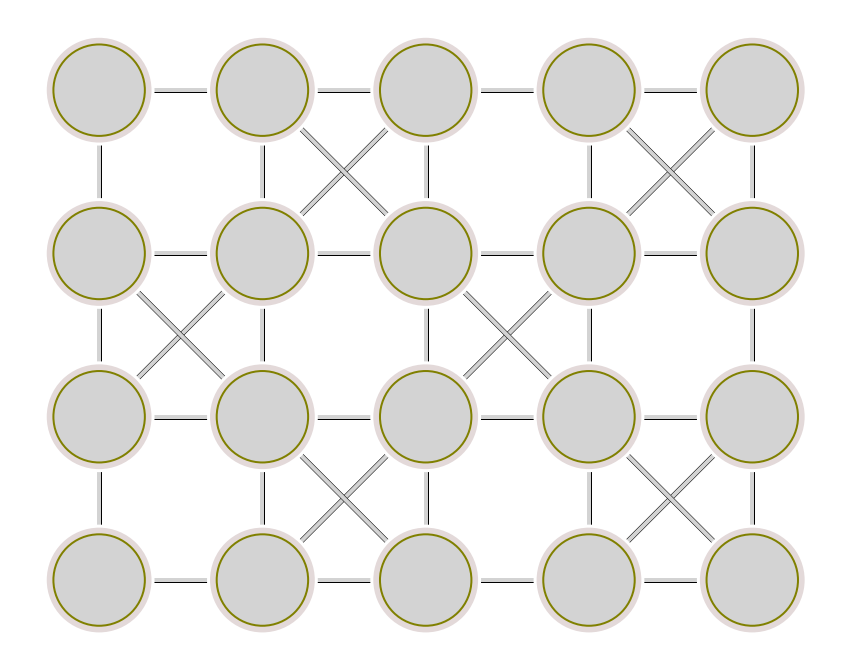

In [5]:
figsize = (15, 15)
edges = Edges([])
circles = Circles([])
for idx, (i, j) in enumerate([(i, j) for i in range(5) for j in range(4)]):
    circles.add_circle(Circle(coord=(i, j), fontsize=40))
    
forbidden_edges = [((0, 3), (1, 2)),
((0, 2), (1, 3)),
((0, 1), (1, 0)),
((0, 0), (1, 1)),
((1, 1), (2, 2)),
((1, 2), (2, 1)),
((2, 3), (3, 2)),
((2, 2), (3, 3)),
((2, 1), (3, 0)),
((2, 0), (3, 1)),
((3, 2), (4, 1)),
((3, 1), (4, 2)),]

for edge in list(combinations(circles.coords, 2)):
    if random.random() < 0.3:
        pass#continue
    if (np.abs(np.subtract(*edge)).sum()) <= 2:
        if edge not in forbidden_edges:
            edges.add_edge(Edge(edge=edge))

_, ax = plt.subplots(figsize=figsize)
ax.set_aspect('equal', 'box')
ax.axis('off')
ax.scatter(*circles.xy, color="black", s=0, alpha=1)

for edge in edges:
    edge.linewidth = 4
    edge.edgewidth= 5
    edge.alpha=0.1

    outline=mpe.withStroke(linewidth=edge.edgewidth, foreground=edge.edgecolor)
    ax.plot(*edge.xy, color=edge.color, linewidth=edge.linewidth, path_effects=[outline])
    
    
for circle in circles:
    circle.size=0.28
    circle.linewidth = 2
    circle.edgecolor = "olive"
    if circle.name is not None:
        label = ax.annotate(
            r"{}".format(circle.name),
            xy=circle.coord,
            ha="center",
            va="center",
            fontsize=circle.fontsize,
            zorder=5,
        )
    patch = plt.Circle(
        circle.coord,
        radius=circle.size+0.05,
        alpha=1,
        fill=True,
        fc='#e3d9d9',
        lw=3,
        ec='white',
        zorder=circle.zorder
    )
    ax.add_patch(patch)
       
    ax.add_patch(circle.patch)

plt.savefig(paths.plots / "Figures/IBM_connectivity.pdf")
plt.savefig(paths.plots / "Figures/pngs/IBM_connectivity.png")

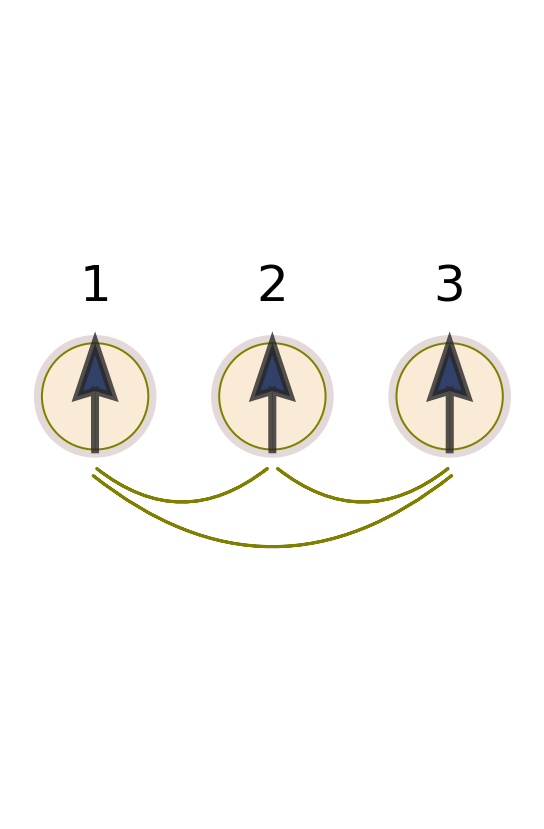

In [6]:
circles = Circles([])
up=True
circles.add_circle(
        Circle(
            coord=(0, 0),
            color="antiquewhite",
            name=1,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))
circles.add_circle(
        Circle(
            coord=(.5, 0),
            color="antiquewhite",
            name=2,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))
circles.add_circle(
        Circle(
            coord=(1, 0),
            color="antiquewhite",
            name=3,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        )
    )
_, ax = plt.subplots(figsize=figsize)
ax.set_aspect('equal', 'box')
ax.axis('off')
ax.scatter(*circles.xy, color="black", s=0, alpha=1)
ax.set_ylim(-1.2,1.1)

for circle in circles:

    if circle.name is not None:
        label = ax.annotate(
            r"{}".format(circle.name),
            xy= (circle.coord[0], circle.coord[1]+.31),
            ha="center",
            va="center",
            fontsize=circle.fontsize,
            zorder=10,
            color='black'

        )
    patch = plt.Circle(
        circle.coord,
        radius=circle.size*1.2,
        alpha=1,
        fill=True,
        fc='#e3d9d9',
        lw=5,
        ec='white',
        zorder=circle.zorder
    )
    ax.add_patch(patch)

    ax.add_patch(circle.patch)

    if circle.up:
        ax.arrow(circle.coord[0] , circle.coord[1] - circle.size, 0, circle.size, alpha=0.8,overhang=.1,
                 linewidth=circle.size * 50,head_width=circle.size/1.5, head_length=circle.size,
                 fc='#00164F', ec='#282727', zorder=6)
    if circle.down:
        ax.arrow(circle.coord[0] , circle.coord[1] + circle.size, 0, - circle.size, alpha=0.8,overhang=.1,
                 linewidth=circle.size * 50,head_width=circle.size/1.5, head_length=circle.size,
                 fc='#00164F', ec='#282727', zorder=6)


a3 = patches.FancyArrowPatch((0, -.2), (.49, -.2),lw=3,connectionstyle="arc3,rad=.4", zorder=39, color='olive')
for a in [a3]:
    plt.gca().add_patch(a)
a3 = patches.FancyArrowPatch((.51, -.2), (1, -.2),lw=3,connectionstyle="arc3,rad=.4", zorder=39, color='olive')
for a in [a3]:
    plt.gca().add_patch(a)
a3 = patches.FancyArrowPatch((-.01, -.22), (1.01, -.22),lw=3,connectionstyle="arc3,rad=.4", zorder=39, color='olive')
for a in [a3]:
    plt.gca().add_patch(a)

plt.savefig(paths.plots / "Figures/123_spin_loop_111.pdf")
plt.savefig(paths.plots / "Figures/pngs/123_spin_loop_111.png")

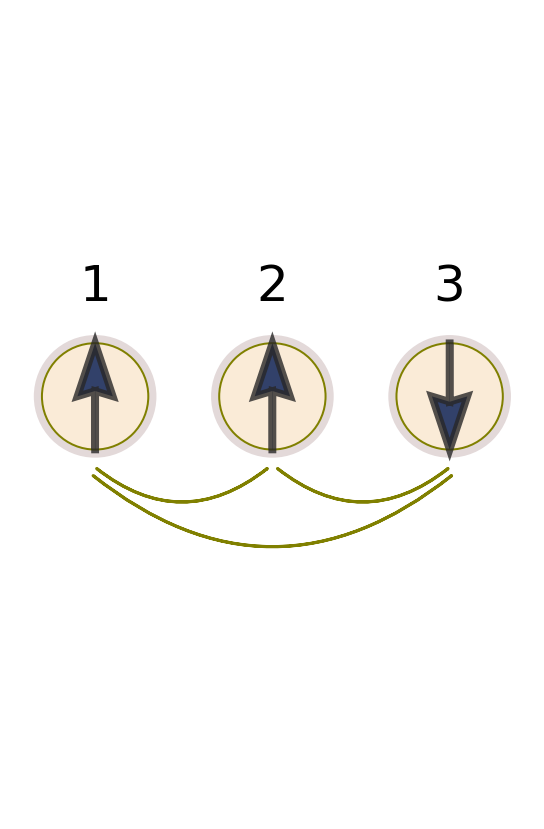

In [7]:
circles = Circles([])
up=True
circles.add_circle(
        Circle(
            coord=(0, 0),
            color="antiquewhite",
            name=1,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))
circles.add_circle(
        Circle(
            coord=(.5, 0),
            color="antiquewhite",
            name=2,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))
up = False
circles.add_circle(
        Circle(
            coord=(1, 0),
            color="antiquewhite",
            name=3,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        )
    )
_, ax = plt.subplots(figsize=figsize)
ax.set_aspect('equal', 'box')
ax.axis('off')
ax.scatter(*circles.xy, color="black", s=0, alpha=1)
ax.set_ylim(-1.2,1.1)

for circle in circles:

    if circle.name is not None:
        label = ax.annotate(
            r"{}".format(circle.name),
            xy= (circle.coord[0], circle.coord[1]+.31),
            ha="center",
            va="center",
            fontsize=circle.fontsize,
            zorder=10,
            color='black'

        )
    patch = plt.Circle(
        circle.coord,
        radius=circle.size*1.2,
        alpha=1,
        fill=True,
        fc='#e3d9d9',
        lw=5,
        ec='white',
        zorder=circle.zorder
    )
    ax.add_patch(patch)

    ax.add_patch(circle.patch)

    if circle.up:
        ax.arrow(circle.coord[0] , circle.coord[1] - circle.size, 0, circle.size, alpha=0.8,overhang=.1,
                 linewidth=circle.size * 50,head_width=circle.size/1.5, head_length=circle.size,
                 fc='#00164F', ec='#282727', zorder=6)
    if circle.down:
        ax.arrow(circle.coord[0] , circle.coord[1] + circle.size, 0, - circle.size, alpha=0.8,overhang=.1,
                 linewidth=circle.size * 50,head_width=circle.size/1.5, head_length=circle.size,
                 fc='#00164F', ec='#282727', zorder=6)


a3 = patches.FancyArrowPatch((0, -.2), (.49, -.2),lw=3,connectionstyle="arc3,rad=.4", zorder=39, color='olive')
for a in [a3]:
    plt.gca().add_patch(a)
a3 = patches.FancyArrowPatch((.51, -.2), (1, -.2),lw=3,connectionstyle="arc3,rad=.4", zorder=39, color='olive')
for a in [a3]:
    plt.gca().add_patch(a)
a3 = patches.FancyArrowPatch((-.01, -.22), (1.01, -.22),lw=3,connectionstyle="arc3,rad=.4", zorder=39, color='olive')
for a in [a3]:
    plt.gca().add_patch(a)

plt.savefig(paths.plots / "Figures/123_spin_loop_110.pdf")
plt.savefig(paths.plots / "Figures/pngs/123_spin_loop_110.png")

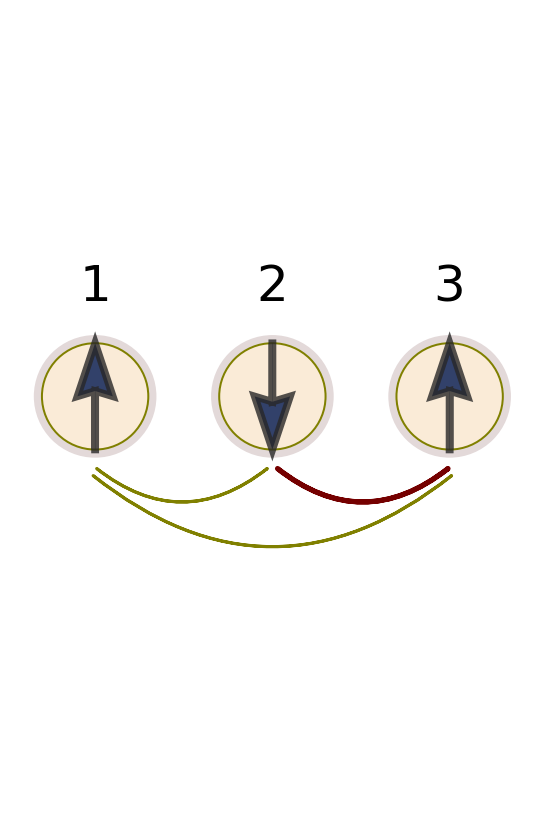

In [8]:
circles = Circles([])
up=True
circles.add_circle(
        Circle(
            coord=(0, 0),
            color="antiquewhite",
            name=1,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))
up=False
circles.add_circle(
        Circle(
            coord=(.5, 0),
            color="antiquewhite",
            name=2,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))
up = False
circles.add_circle(
        Circle(
            coord=(1, 0),
            color="antiquewhite",
            name=3,
            up=False,
            down=False,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        )
    )
_, ax = plt.subplots(figsize=figsize)
ax.set_aspect('equal', 'box')
ax.axis('off')
ax.scatter(*circles.xy, color="black", s=0, alpha=1)
ax.set_ylim(-1.2,1.1)

for circle in circles:

    if circle.name is not None:
        label = ax.annotate(
            r"{}".format(circle.name),
            xy= (circle.coord[0], circle.coord[1]+.31),
            ha="center",
            va="center",
            fontsize=circle.fontsize,
            zorder=10,
            color='black'

        )
    patch = plt.Circle(
        circle.coord,
        radius=circle.size*1.2,
        alpha=1,
        fill=True,
        fc='#e3d9d9',
        lw=5,
        ec='white',
        zorder=circle.zorder
    )
    ax.add_patch(patch)

    ax.add_patch(circle.patch)

    if circle.up:
        ax.arrow(circle.coord[0] , circle.coord[1] - circle.size, 0, circle.size, alpha=0.8,overhang=.1,
                 linewidth=circle.size * 50,head_width=circle.size/1.5, head_length=circle.size,
                 fc='#00164F', ec='#282727', zorder=6)
    if circle.down:
        ax.arrow(circle.coord[0] , circle.coord[1] + circle.size, 0, - circle.size, alpha=0.8,overhang=.1,
                 linewidth=circle.size * 50,head_width=circle.size/1.5, head_length=circle.size,
                 fc='#00164F', ec='#282727', zorder=6)


a3 = patches.FancyArrowPatch((0, -.2), (.49, -.2),lw=3,connectionstyle="arc3,rad=.4", zorder=39, color='olive')
for a in [a3]:
    plt.gca().add_patch(a)
a3 = patches.FancyArrowPatch((.51, -.2), (1, -.2),lw=3,connectionstyle="arc3,rad=.4", zorder=39, color='olive')
for a in [a3]:
    plt.gca().add_patch(a)
a3 = patches.FancyArrowPatch((-.01, -.22), (1.01, -.22),lw=3,connectionstyle="arc3,rad=.4", zorder=39, color='olive')
for a in [a3]:
    plt.gca().add_patch(a)

plt.savefig(paths.plots / "Figures/123_spin_loop_10_.pdf")
plt.savefig(paths.plots / "Figures/pngs/123_spin_loop_10_.png")
up = True
circle = Circle(
            coord=(1, 0),
            color="antiquewhite",
            name=3,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        )
ax.arrow(circle.coord[0] , circle.coord[1] - circle.size, 0, circle.size, alpha=0.8,overhang=.1,
                 linewidth=circle.size * 50,head_width=circle.size/1.5, head_length=circle.size,
                 fc='#00164F', ec='#282727', zorder=6)

plt.savefig(paths.plots / "Figures/123_spin_loop_101.pdf")
plt.savefig(paths.plots / "Figures/pngs/123_spin_loop_101.png")

a3 = patches.FancyArrowPatch((.51, -.2), (1, -.2),lw=5,connectionstyle="arc3,rad=.4", zorder=39, color='#750000')
for a in [a3]:
    plt.gca().add_patch(a)
plt.savefig(paths.plots / "Figures/123_spin_loop_101_red.pdf")
plt.savefig(paths.plots / "Figures/pngs/123_spin_loop_101_red.png")

/net/fermion/csba1344/CompilerQC/graph.py:184: UserWarning: adjacency matrix contains null columns
  warnings.warn("adjacency matrix contains null columns")
/net/fermion/csba1344/CompilerQC/graph.py:184: UserWarning: adjacency matrix contains null columns
  warnings.warn("adjacency matrix contains null columns")


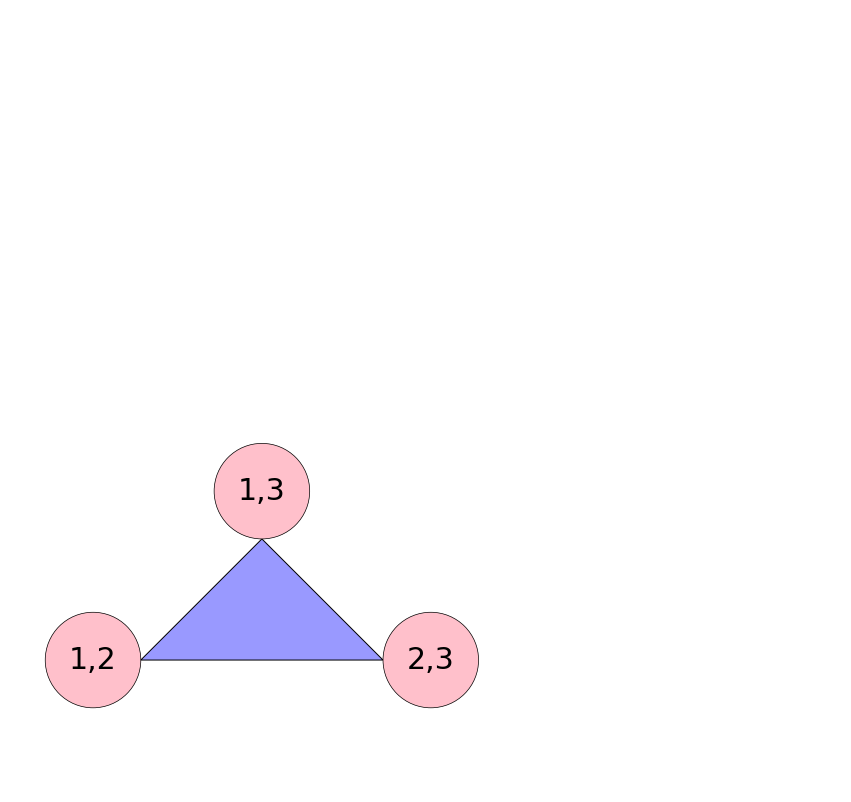

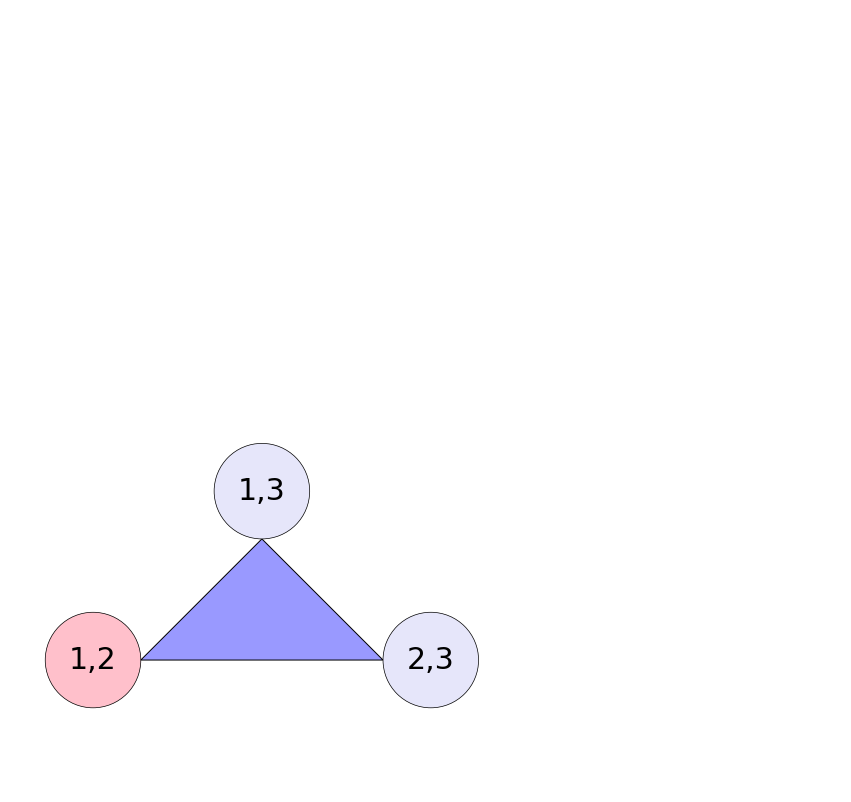

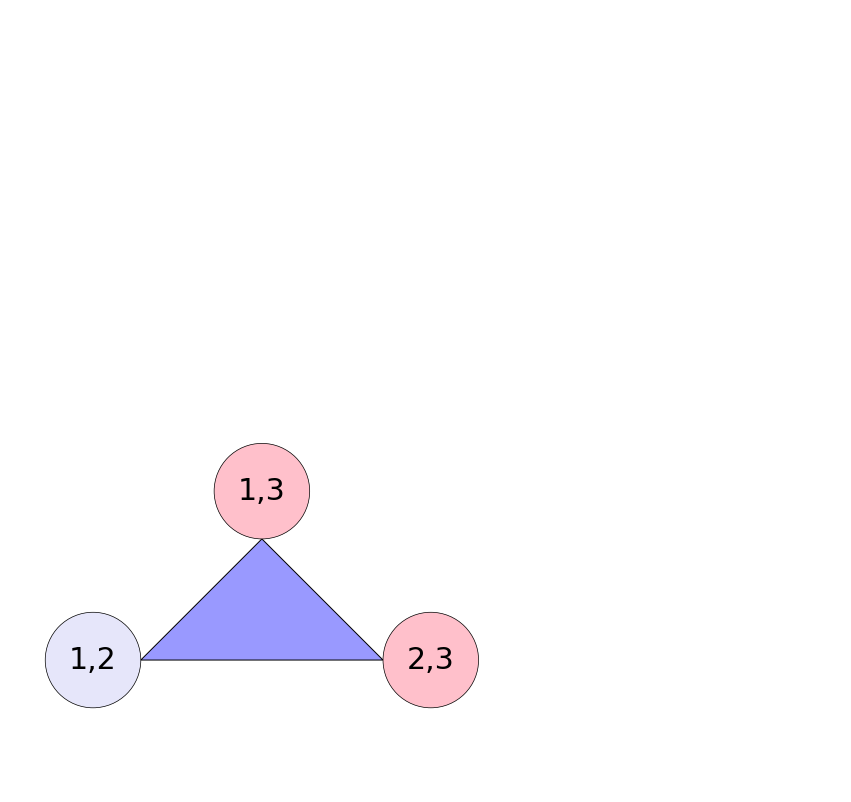

In [9]:
N = 4

circles = Circles([])
spin = [True, True, True, True]
for idx, (i, j) in enumerate(Circles.get_circles_of_n_eck(N)):
    up = spin[idx]
    circles.add_circle(Circle(coord=(i, j), color="antiquewhite", name=idx, up=up, down=not up, size=0.1, fontsize=50))
name_to_coord_dict = {circle.name:circle for circle in circles}

rotate = True
graph = Graph.init_without_edges(N, [(0, 1), (0, 2), (0, 3)])
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
circles.name_to_coord_dict
polygons = [[(1, 2),(1, 3),(2, 3)]]

ax = draw_LHZ_from_spin_glass_(polygon_object, circles.name_to_coord_dict, polygons, ffontsize=30)
ax.figure.savefig(paths.plots / "Figures/parity_123_loop_111.pdf")
ax.figure.savefig(paths.plots / "Figures/pngs/parity_123_loop_111.png")


N = 4

circles = Circles([])
spin = [True, False, False, True]
for idx, (i, j) in enumerate(Circles.get_circles_of_n_eck(N)):
    up = spin[idx]
    circles.add_circle(Circle(coord=(i, j), color="antiquewhite", name=idx, up=up, down=not up, size=0.1, fontsize=50))
name_to_coord_dict = {circle.name:circle for circle in circles}

rotate = True
graph = Graph.init_without_edges(N, [(0, 1), (0, 2), (0, 3)])
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
circles.name_to_coord_dict
polygons = [[(1, 2),(1, 3),(2, 3)]]

ax = draw_LHZ_from_spin_glass_(polygon_object, circles.name_to_coord_dict, polygons, ffontsize=30)
ax.figure.savefig(paths.plots / "Figures/parity_123_loop_100.pdf")
ax.figure.savefig(paths.plots / "Figures/pngs/parity_123_loop_100.png")


ax = draw_LHZ_from_spin_glass_(polygon_object, circles.name_to_coord_dict, polygons, ffontsize=30, invert=True)
ax.figure.savefig(paths.plots / "Figures/parity_123_loop._011.pdf")
ax.figure.savefig(paths.plots / "Figures/pngs/parity_123_loop_011.png")


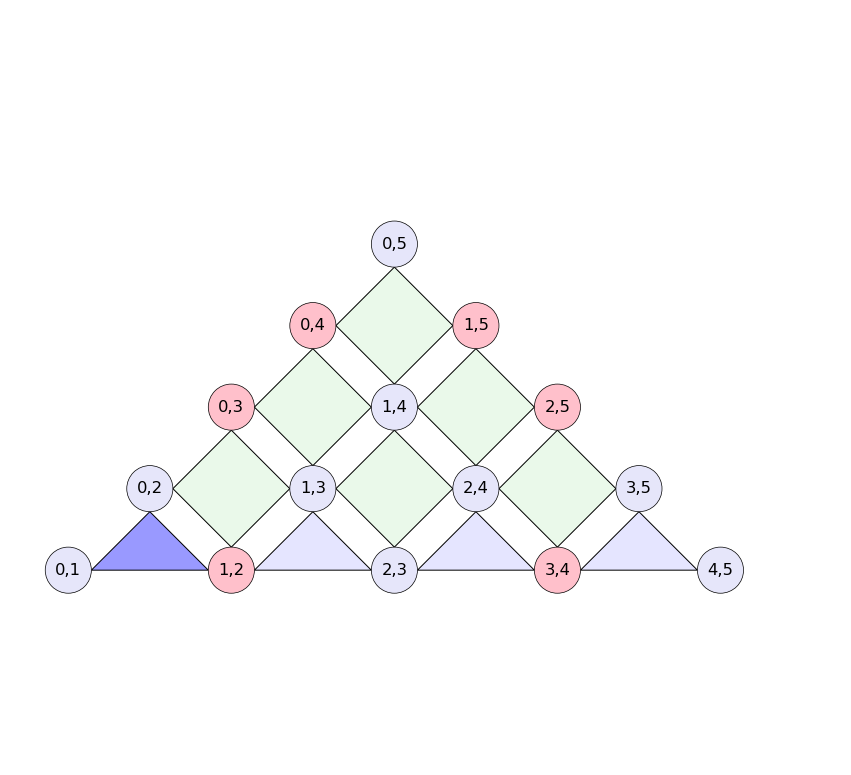

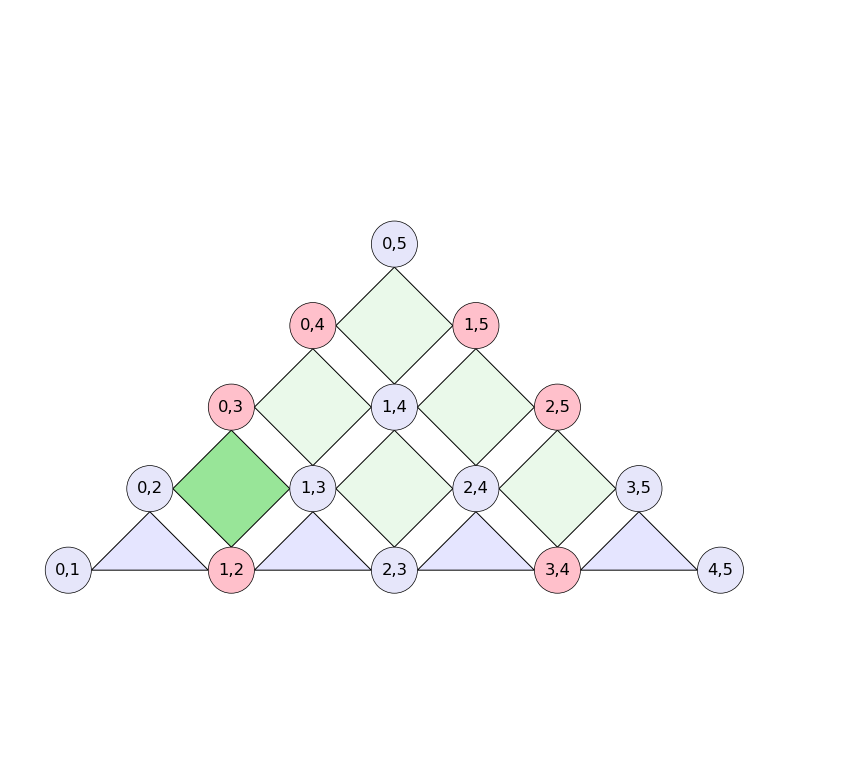

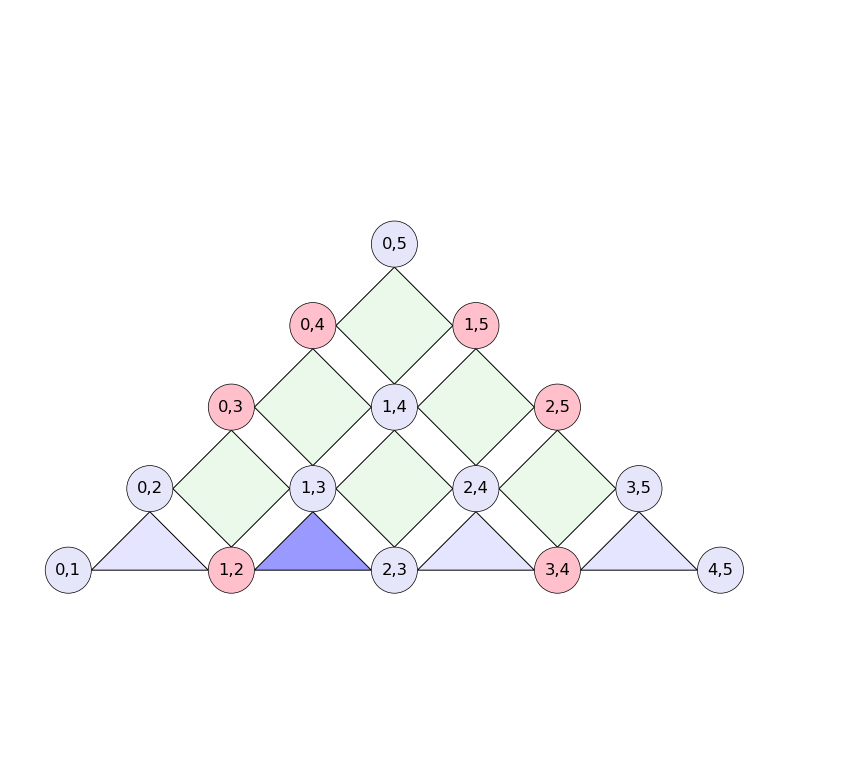

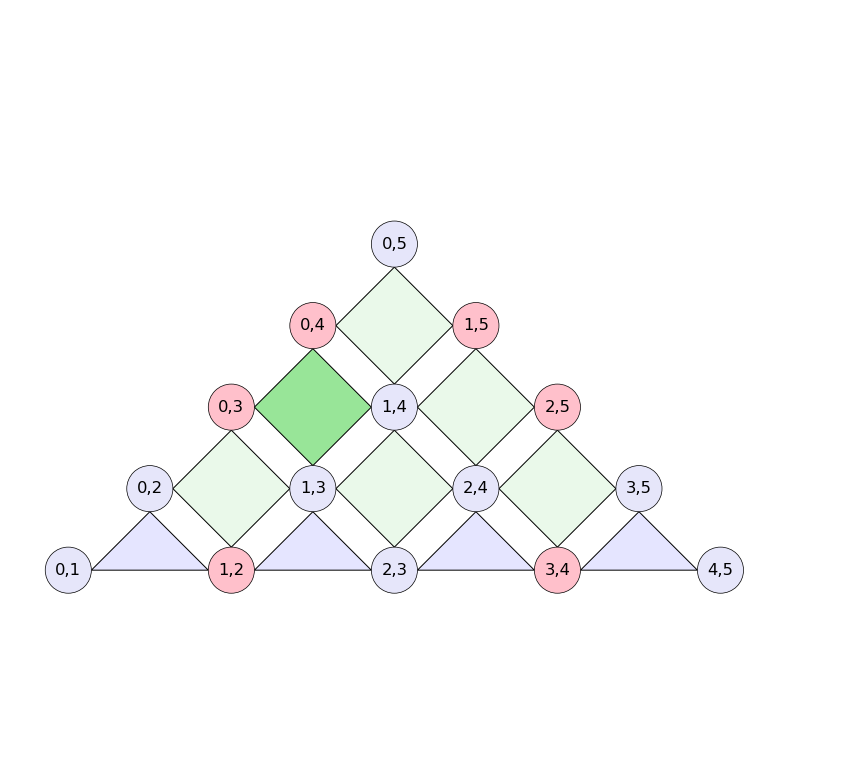

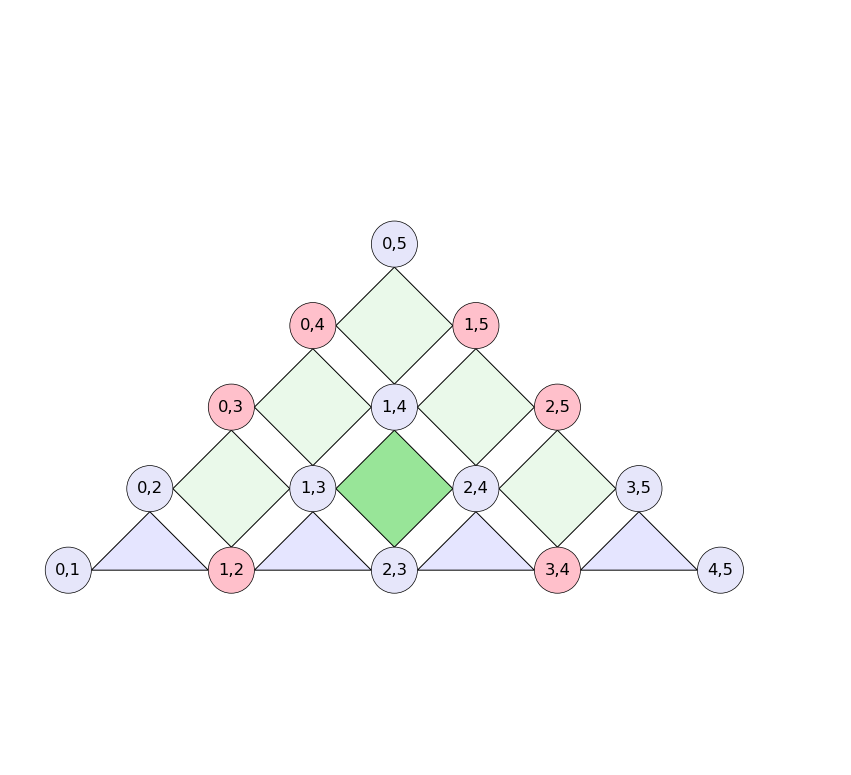

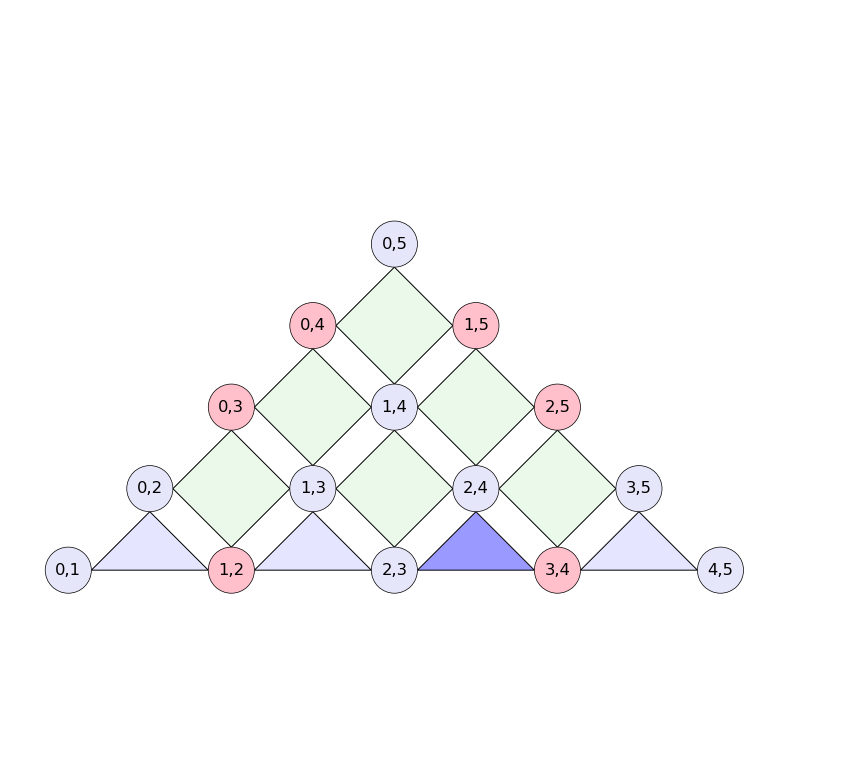

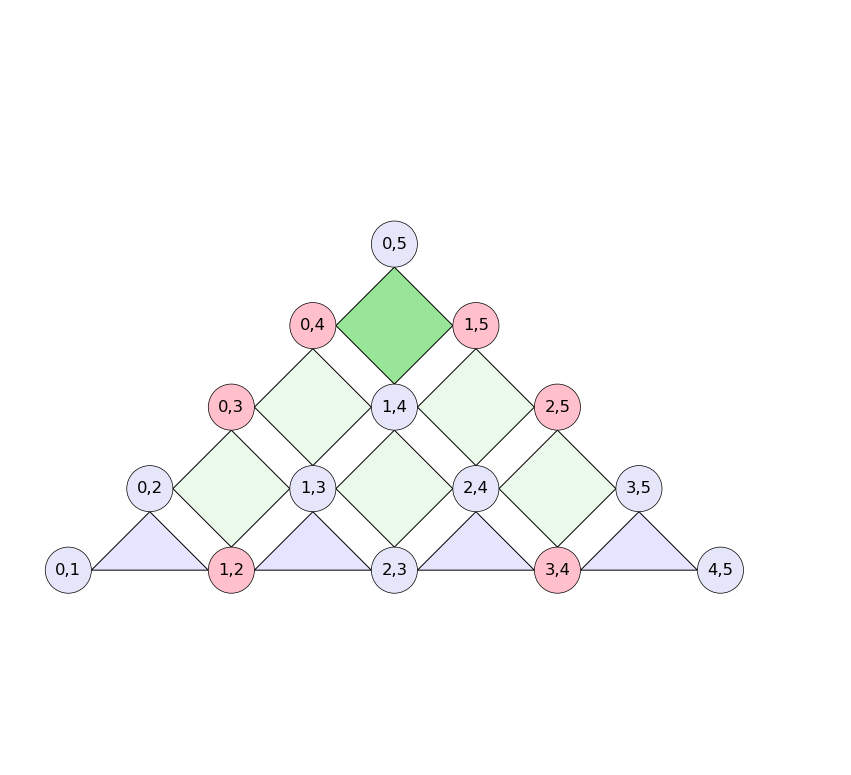

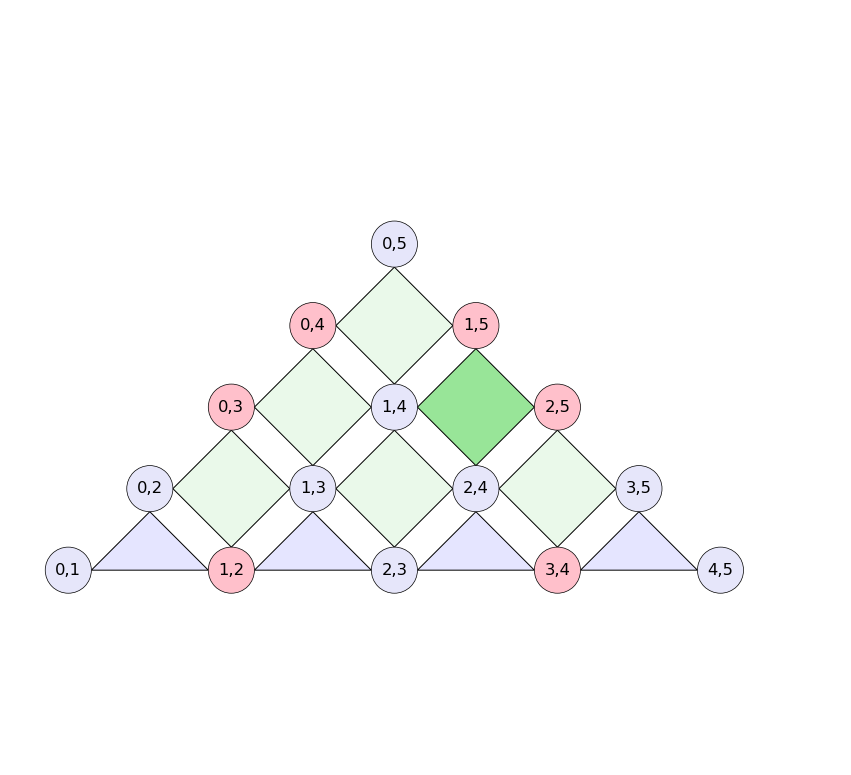

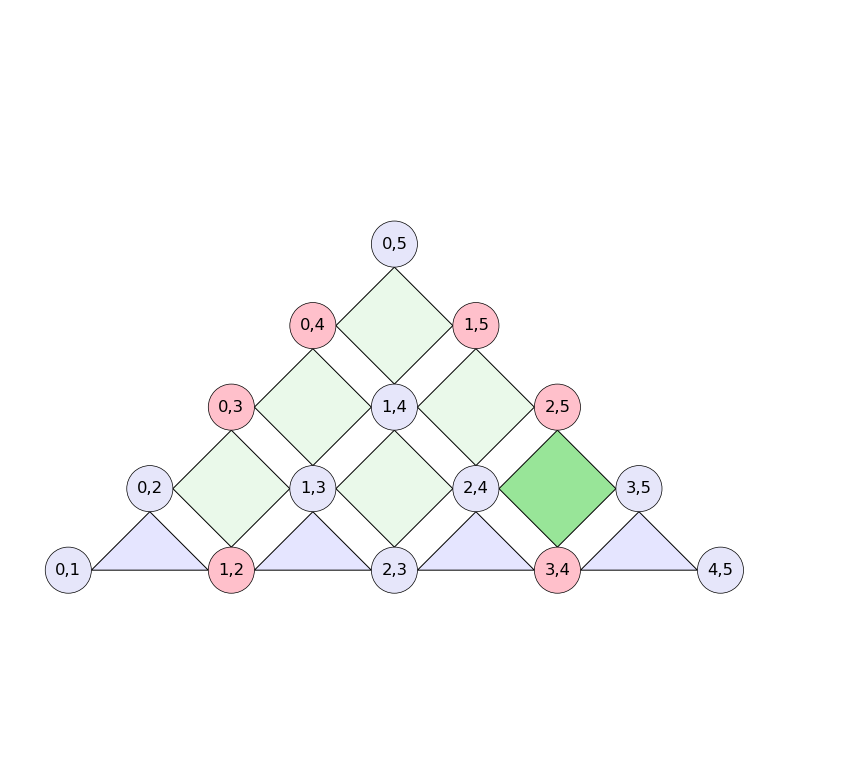

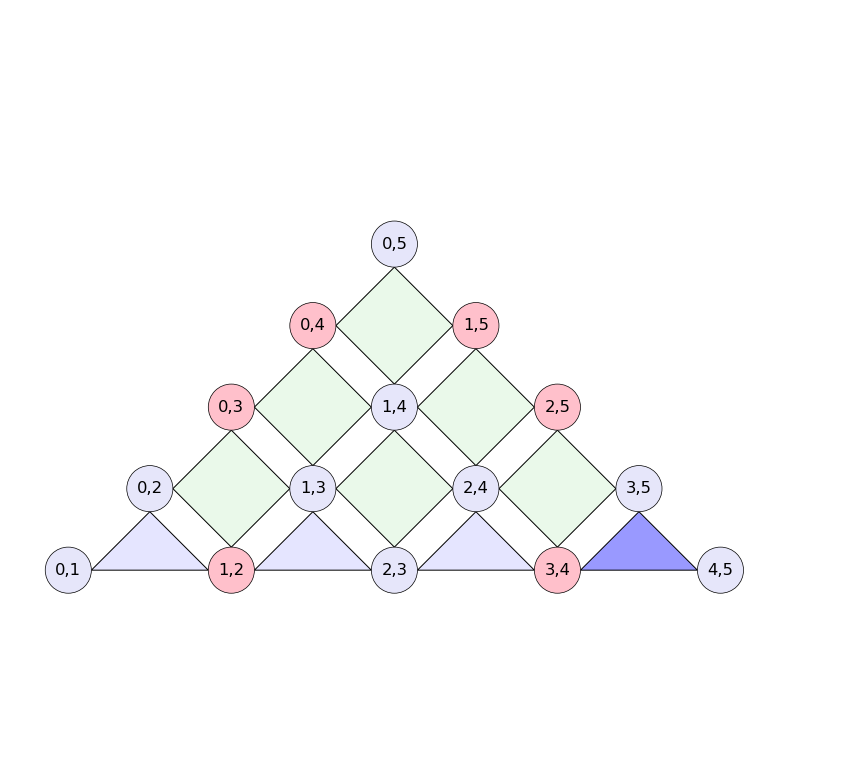

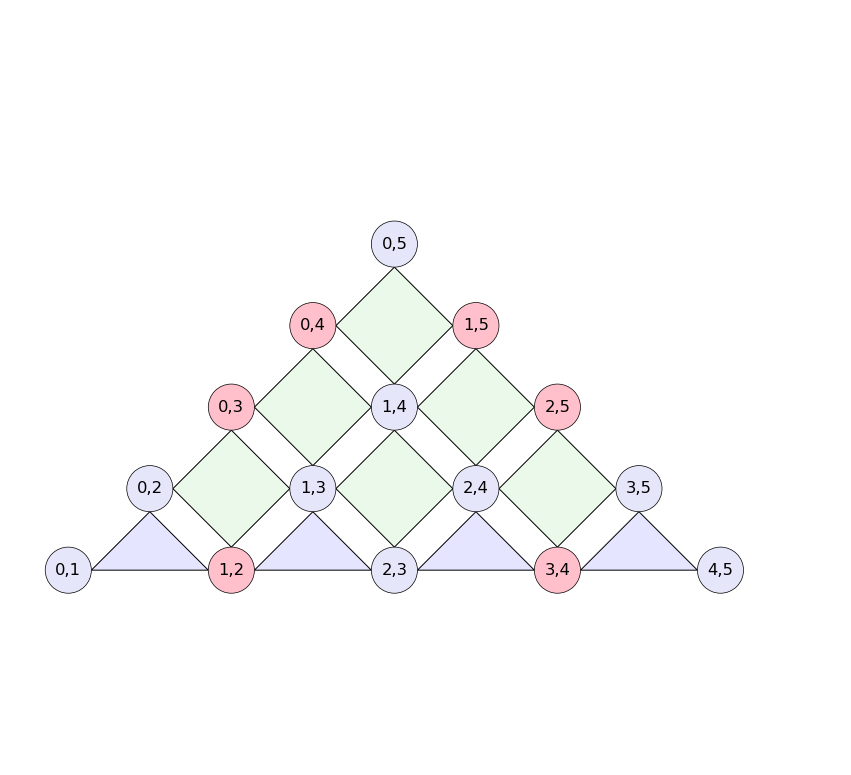

In [10]:

circles = Circles([])
for idx, (i, j) in enumerate(Circles.get_circles_of_n_eck(6)):
    up = (idx**2+idx*i)%2==0
    circles.add_circle(Circle(coord=(i, j), color="antiquewhite", name=idx, up=up, down=not up, size=0.1, fontsize=50))
name_to_coord_dict = {circle.name:circle for circle in circles}

N = 6
rotate = True
graph = Graph.complete(N)
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
circles.name_to_coord_dict
polygons = [sorted(polygon) for polygon in polygon_object.nodes_object.qbits.found_plaqs()]

for polygon in  polygon_object.nodes_object.qbits.found_plaqs() + [[]]:
    ax = draw_LHZ_from_spin_glass_(polygon_object, circles.name_to_coord_dict, [polygon])
    cycle = [sorted(list({str(node) for qubit in polygon for node in qubit}))]
    loop = "".join((cycle[0]))
    ax.figure.savefig(paths.plots / f"Figures/pngs/lhz_with_{loop}_loop.png")
    ax.figure.savefig(paths.plots / f"Figures/lhz_with_{loop}_loop.pdf")


In [11]:
%matplotlib inline

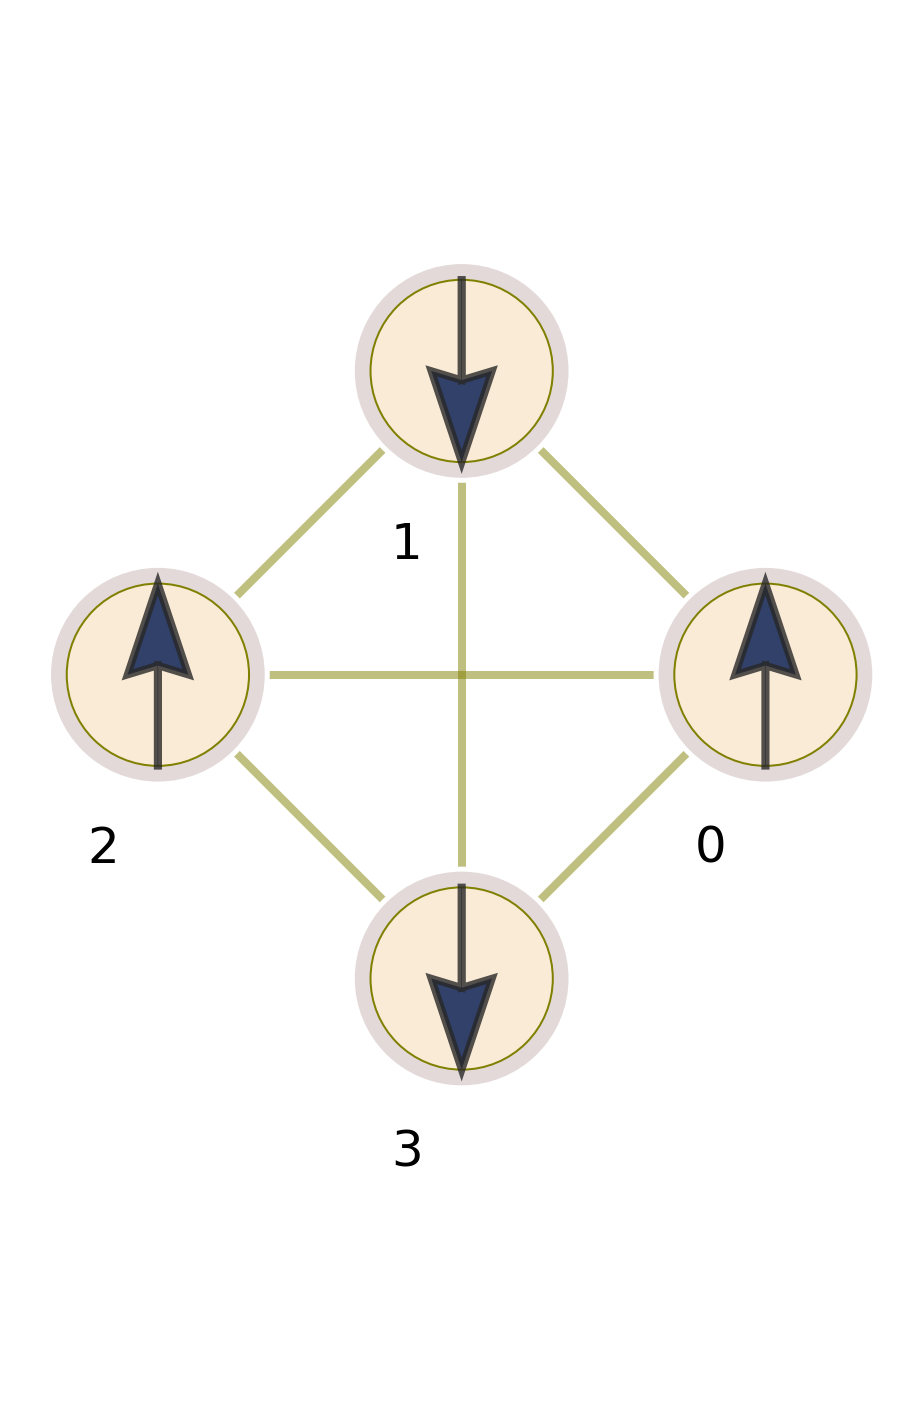

In [12]:
circles = Circles([])
for idx, (i, j) in enumerate(Circles.get_circles_of_n_eck(6)):
    up = (idx**2+idx*i)%2==0
    circles.add_circle(Circle(coord=(i / 2, j / 2), color="antiquewhite", name=idx, up=up, down=not up, size=0.1, fontsize=50))
name_to_coord_dict = {circle.name:circle for circle in circles}

N = 4
rotate = True
graph = Graph.complete(N)
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
circles.name_to_coord_dict
polygons = [sorted(polygon) for polygon in polygon_object.nodes_object.qbits.found_plaqs()]



polygons = [[]]
for polygon in polygons:
    cycle = [sorted(list({str(node) for qubit in polygon for node in qubit}))]
    figsize = (20, 20)
    edges = Edges([])
    circles = Circles([])
    for idx, (i, j) in enumerate(Circles.get_circles_of_n_eck(N)):
        up = (idx**2+idx*i)%2==0
        circles.add_circle(
            Circle(
                coord=(i / 2, j / 2),
                color="antiquewhite",
                name=idx,
                up=up,
                down=not up,
                size=0.15,
                fontsize=50,
                lw=2,
                edgecolor='olive',
            )
        )

    for edge in list(combinations(circles.coords, 2)):
        edges.add_edge(
            Edge(
                edge=edge,
                color='olive',
                lw=8,
                alpha=0.5,
                ew=0,
                zorder=0,
            )
        )

    constraint = [(circles.name_to_coord_dict[i].coord, circles.name_to_coord_dict[j].coord) 
                 for (i, j) in polygon]


    fig, ax = plt.subplots(figsize=figsize)
    fig.tight_layout()
    ax.set_aspect('equal', 'box')
    ax.axis('off')
    ax.scatter(*circles.xy, color="black", s=0, alpha=1)
    ax.set_ylim(-1.2,1.1)

    for edge in edges:
        if edge.edge in constraint:
            edge.linewidth = 8
            edge.edgewidth= 10
            edge.alpha=1
            edge.color='#A52A2A'
            edge.zorder=4
            edge.edgecolor='salmon'

        outline=mpe.withStroke(linewidth=edge.edgewidth, foreground=edge.edgecolor)
        ax.plot(*edge.xy, color=edge.color, linewidth=edge.linewidth, alpha=edge.alpha, path_effects=[outline], zorder=edge.zorder)


    for circle in circles:
        if circle.name is not None:
            label = ax.annotate(
                r"{}".format(circle.name),
                xy= (circle.coord[0] -circle.size * 0.6 , circle.coord[1]-circle.size * 1.9),
                ha="center",
                va="center",
                fontsize=circle.fontsize,
                zorder=10,
                color='black'

            )
        patch = plt.Circle(
            circle.coord,
            radius=circle.size*1.2,
            alpha=1,
            fill=True,
            fc='#e3d9d9',
            lw=5,
            ec='white',
            zorder=circle.zorder
        )
        ax.add_patch(patch)

        ax.add_patch(circle.patch)

        if circle.up:
            ax.arrow(circle.coord[0] , circle.coord[1] - circle.size, 0, circle.size, alpha=0.8,overhang=.1,
                     linewidth=circle.size * 50,head_width=circle.size/1.5, head_length=circle.size,
                     fc='#00164F', ec='#282727', zorder=6)
        if circle.down:
            ax.arrow(circle.coord[0] , circle.coord[1] + circle.size, 0, - circle.size, alpha=0.8,overhang=.1,
                     linewidth=circle.size * 50,head_width=circle.size/1.5, head_length=circle.size,
                     fc='#00164F', ec='#282727', zorder=6)
    loop = "".join((cycle[0]))
    plt.savefig(paths.plots / f"Figures/pngs/spin_glass_N_4_graph_with_{loop}_loop.png", bbox_inches='tight')


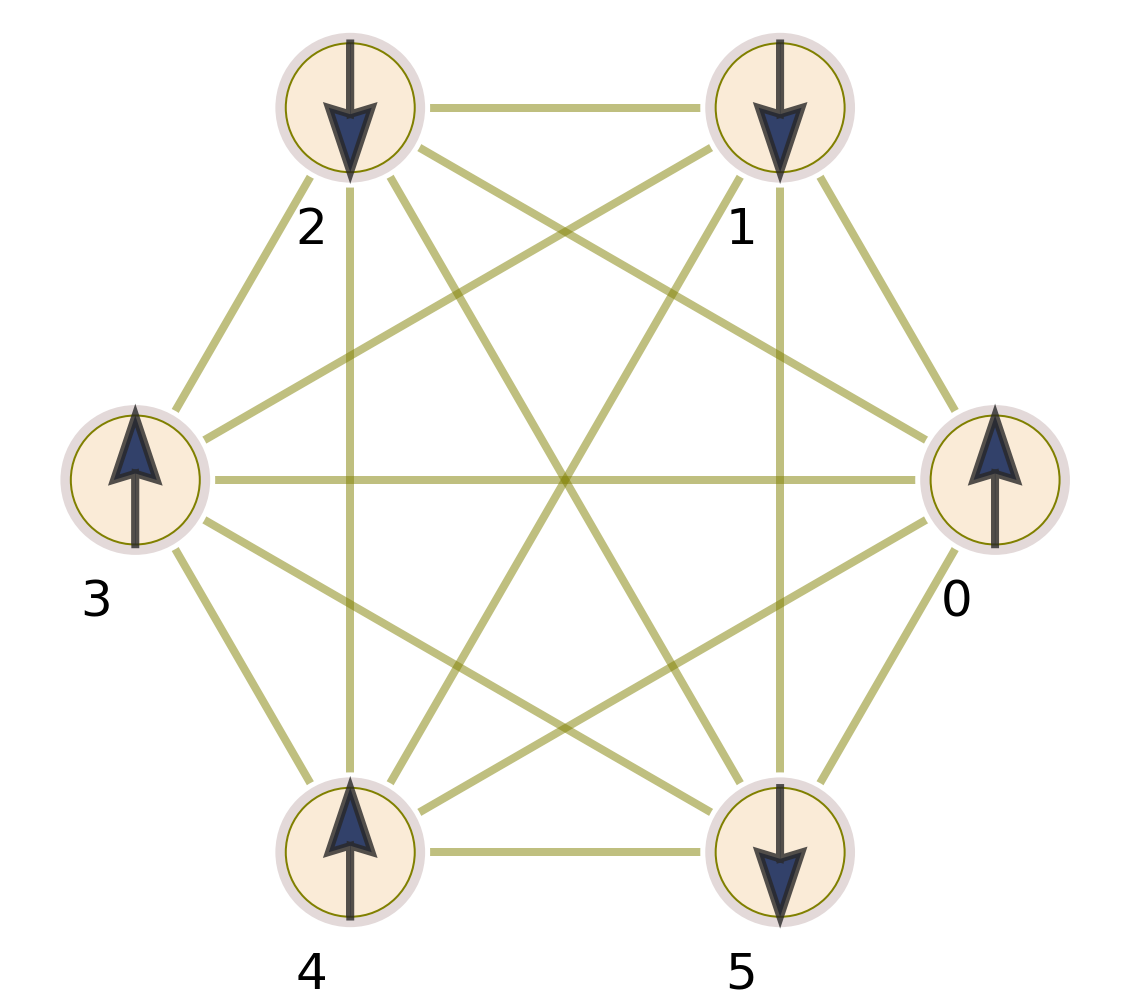

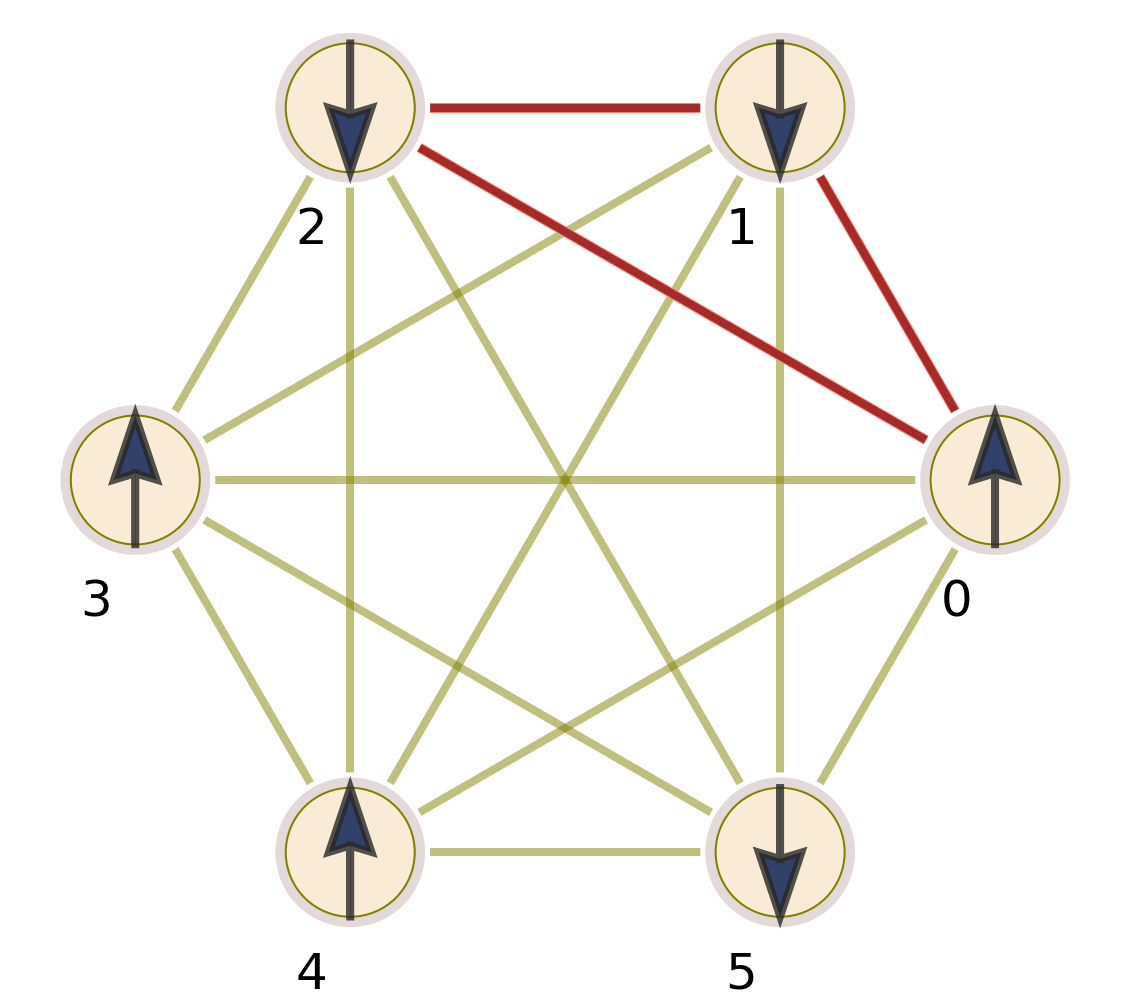

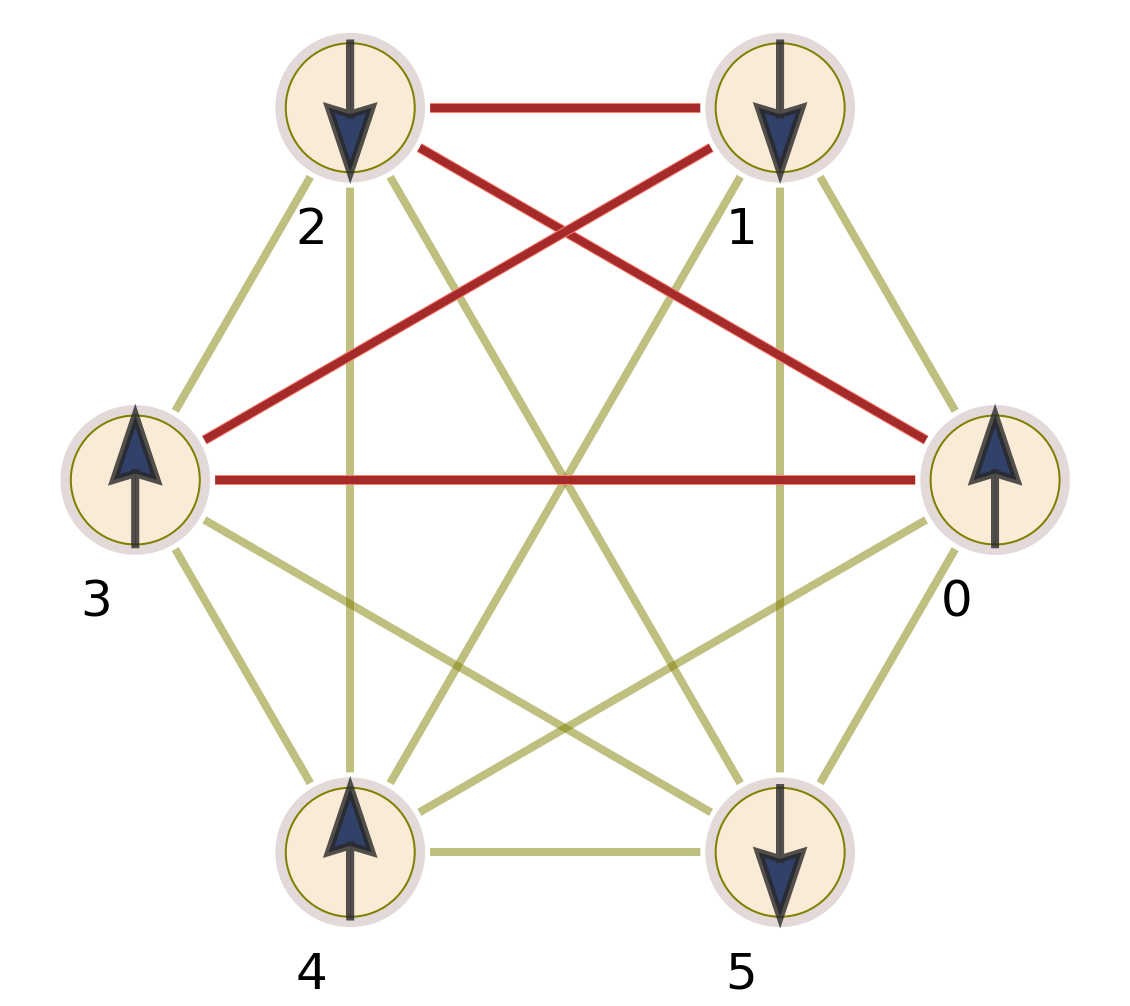

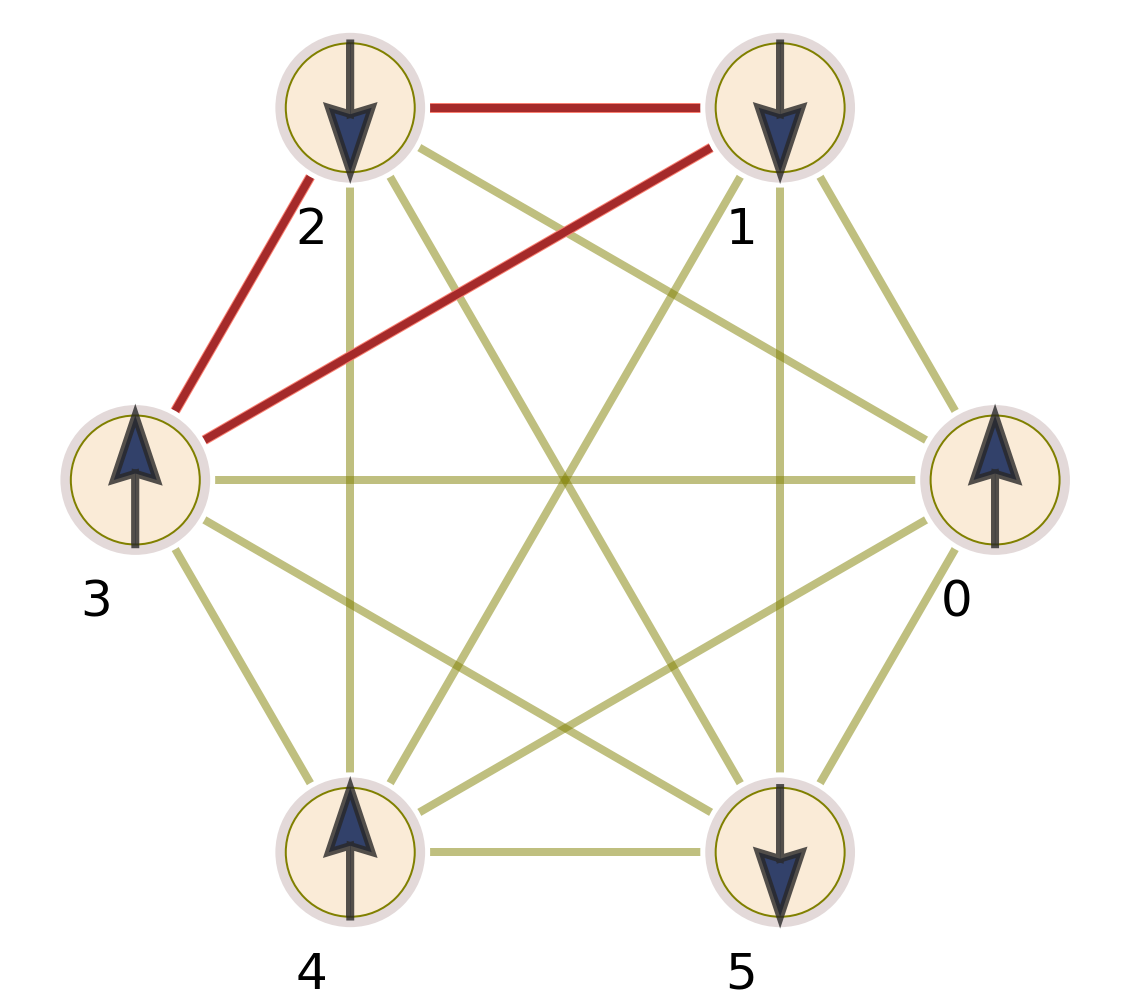

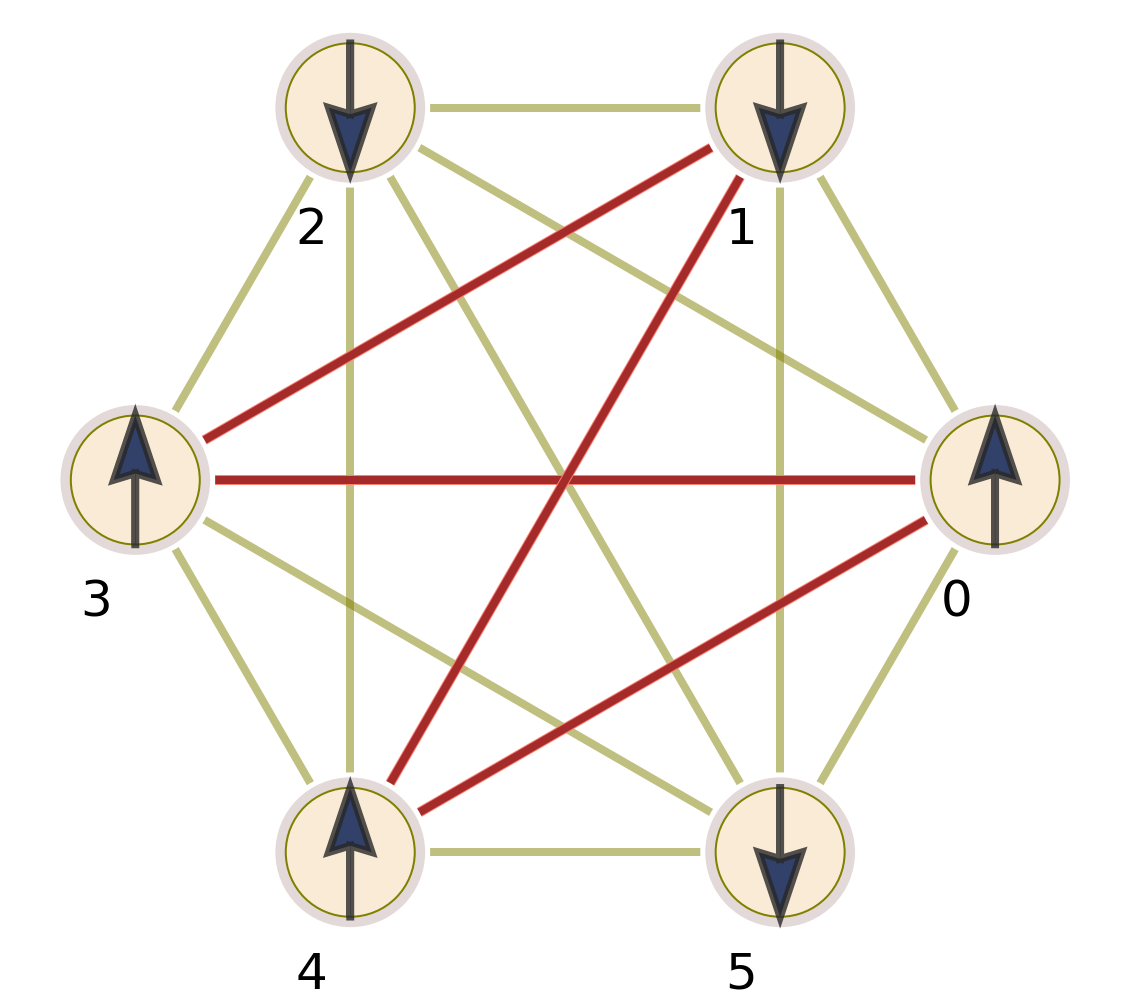

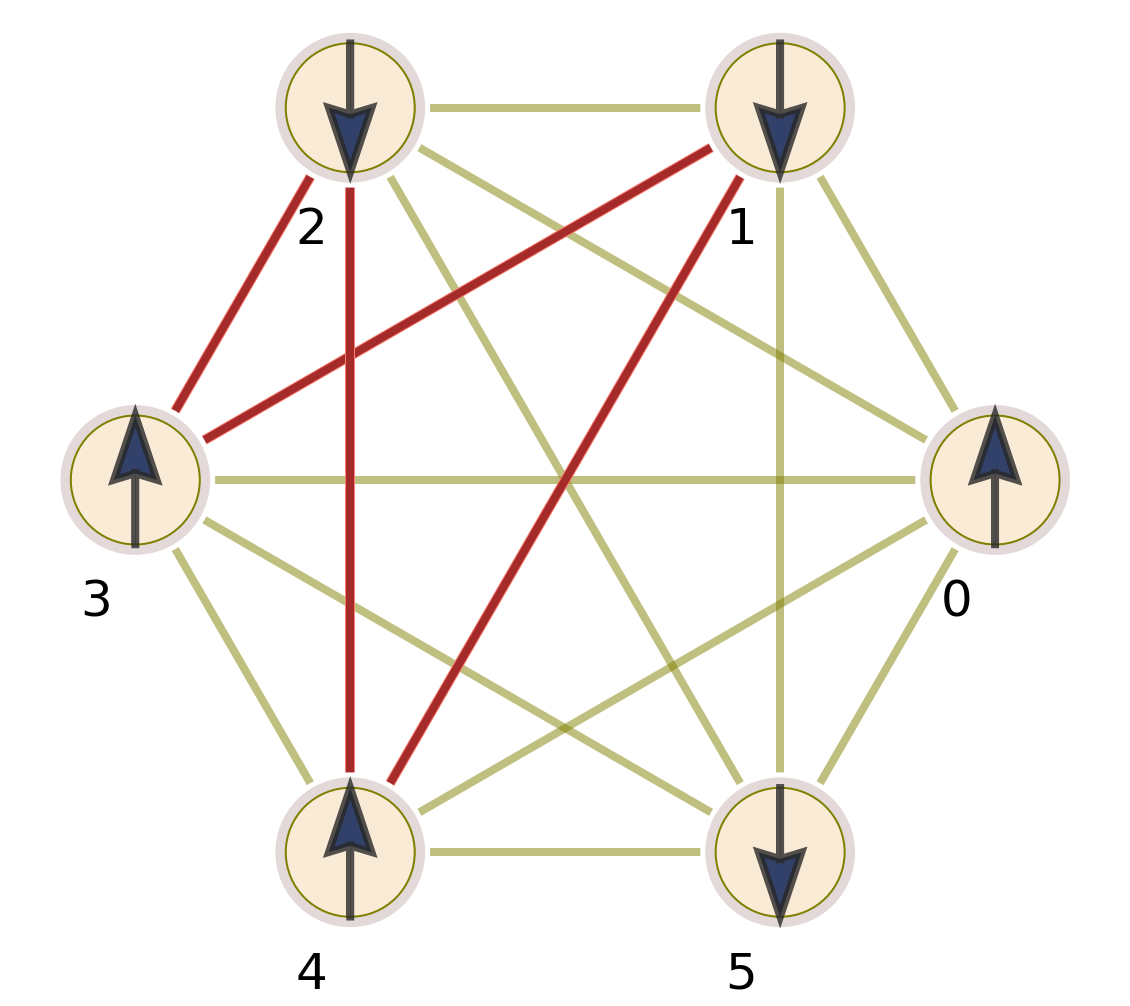

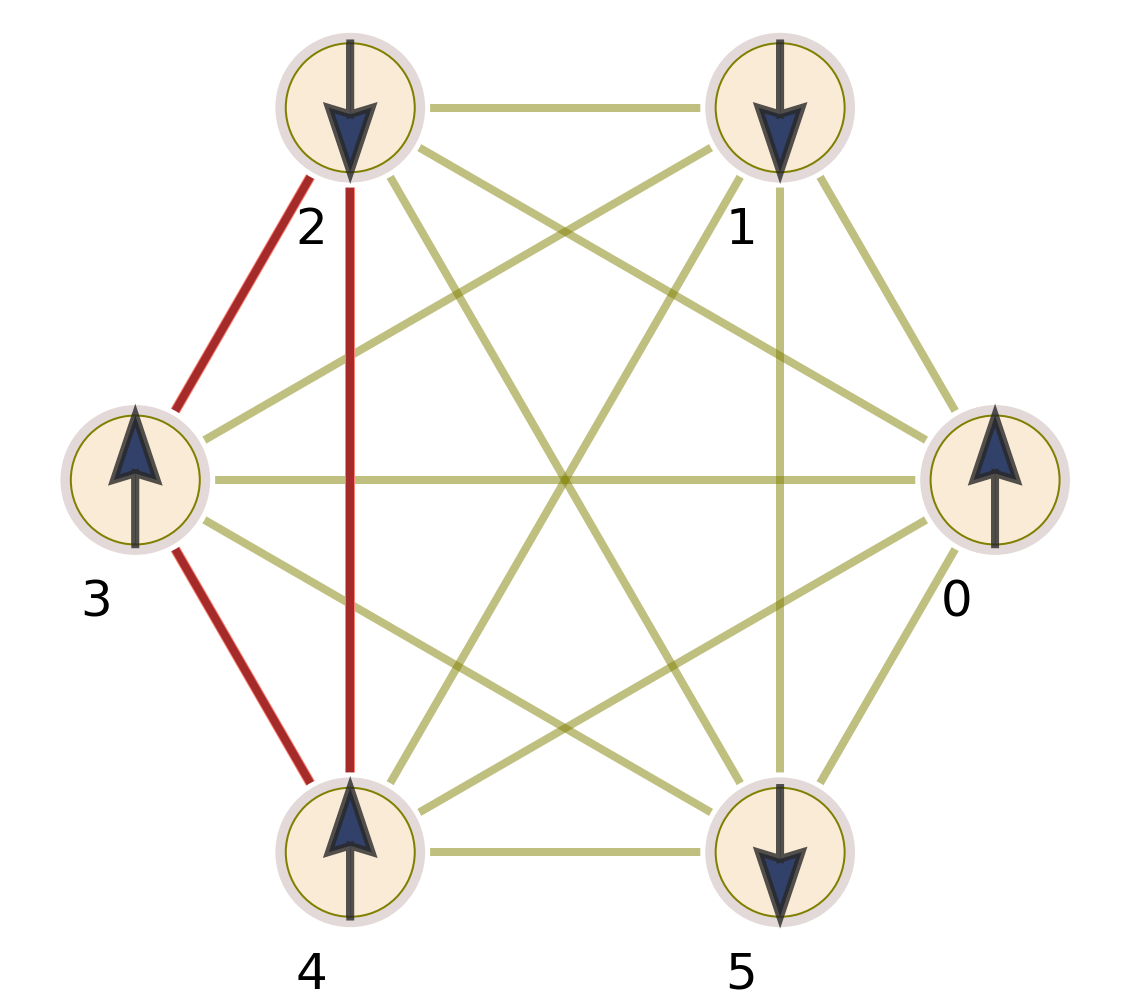

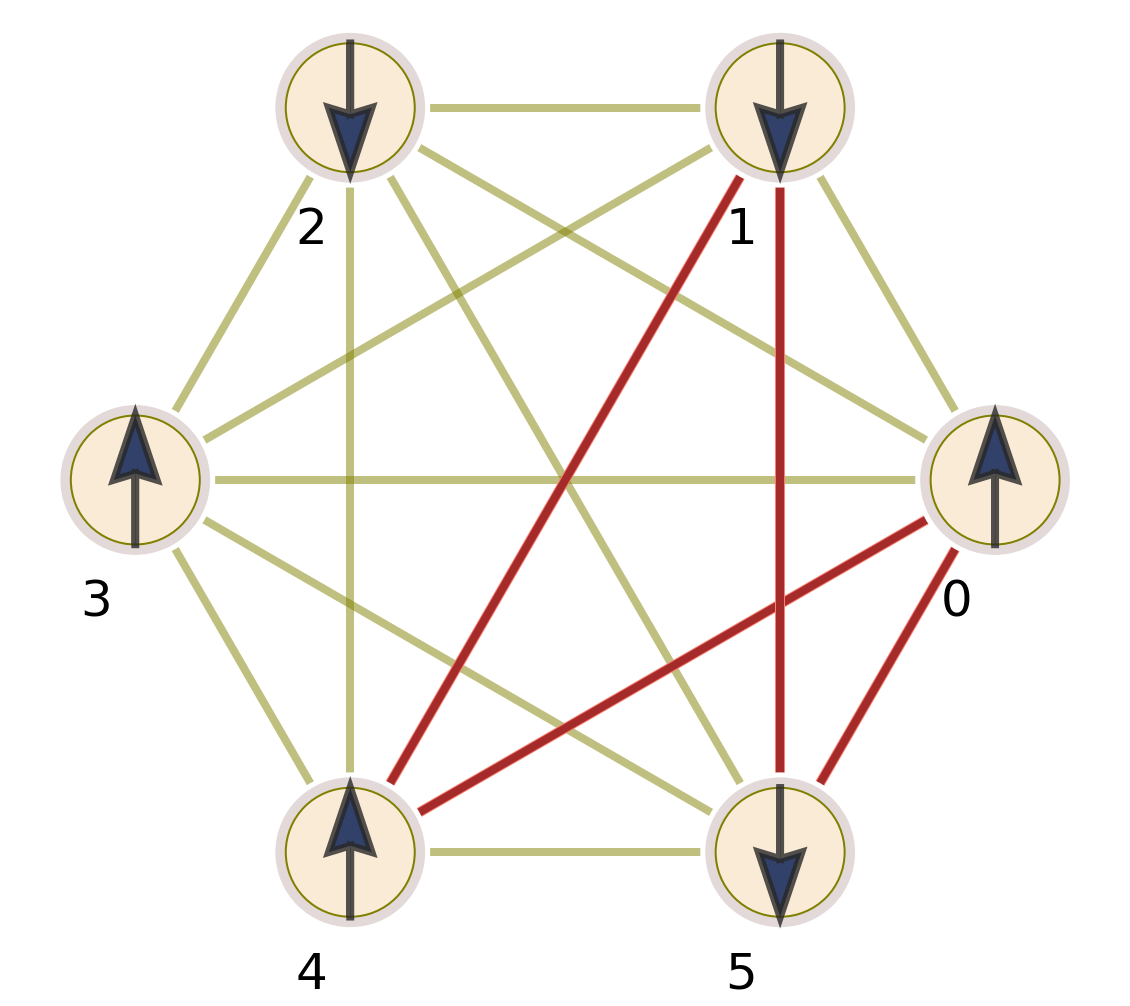

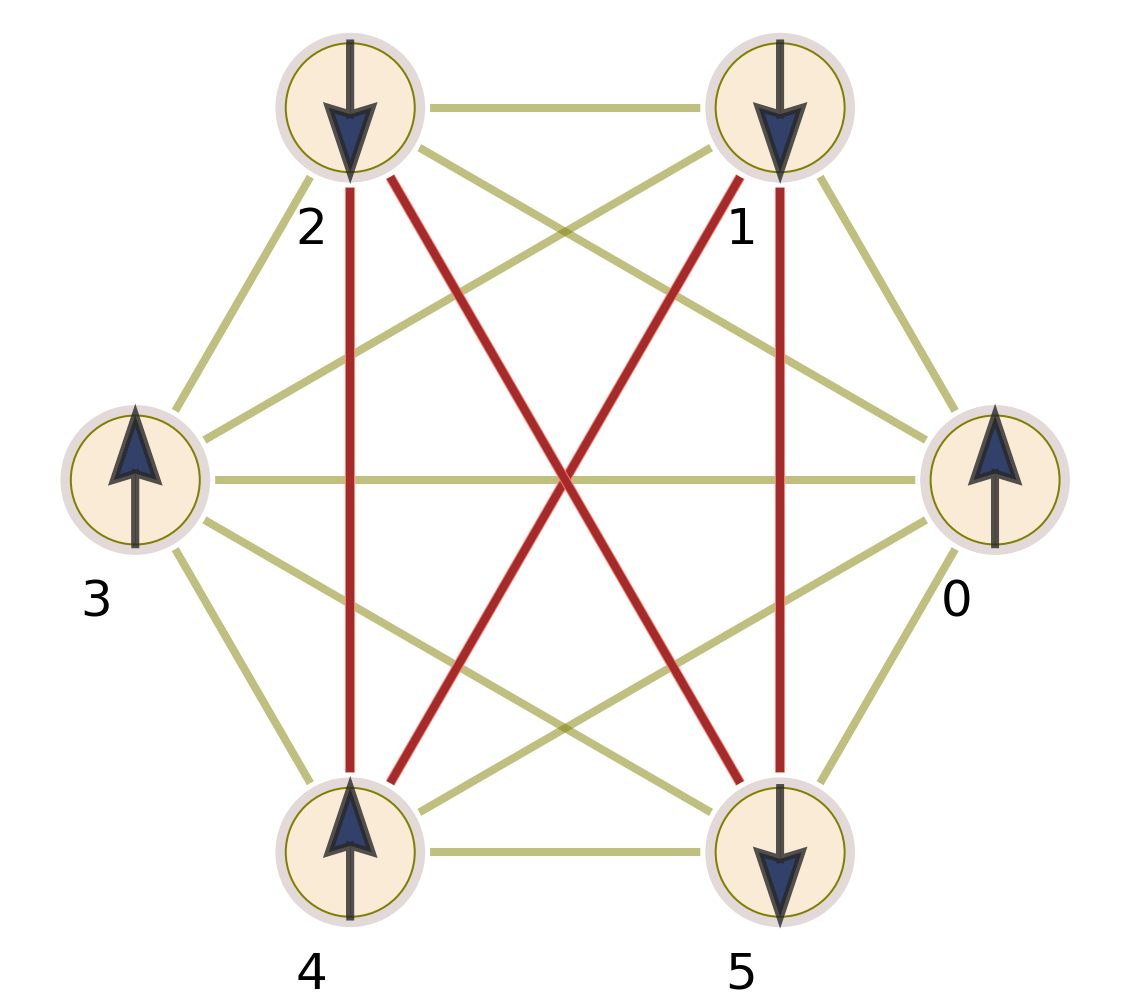

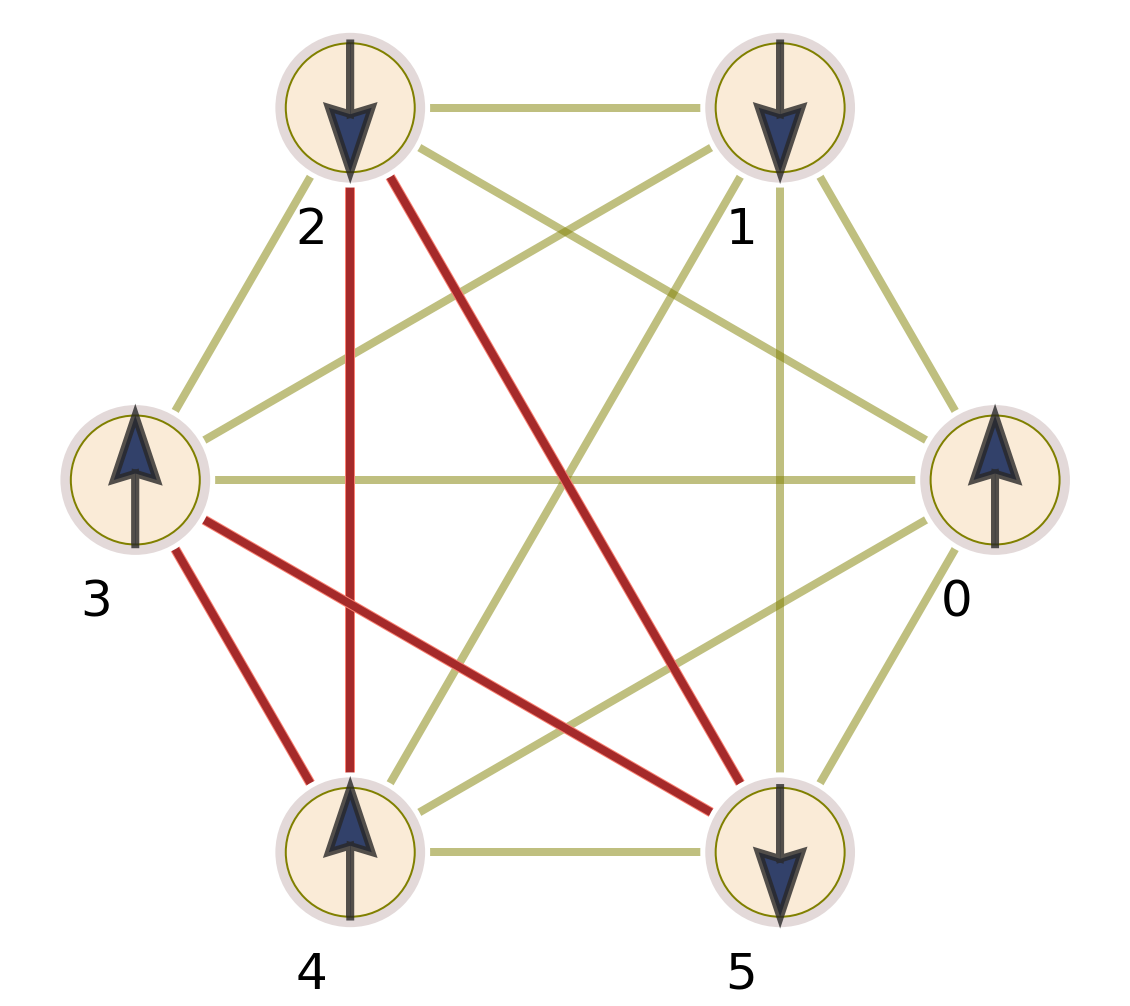

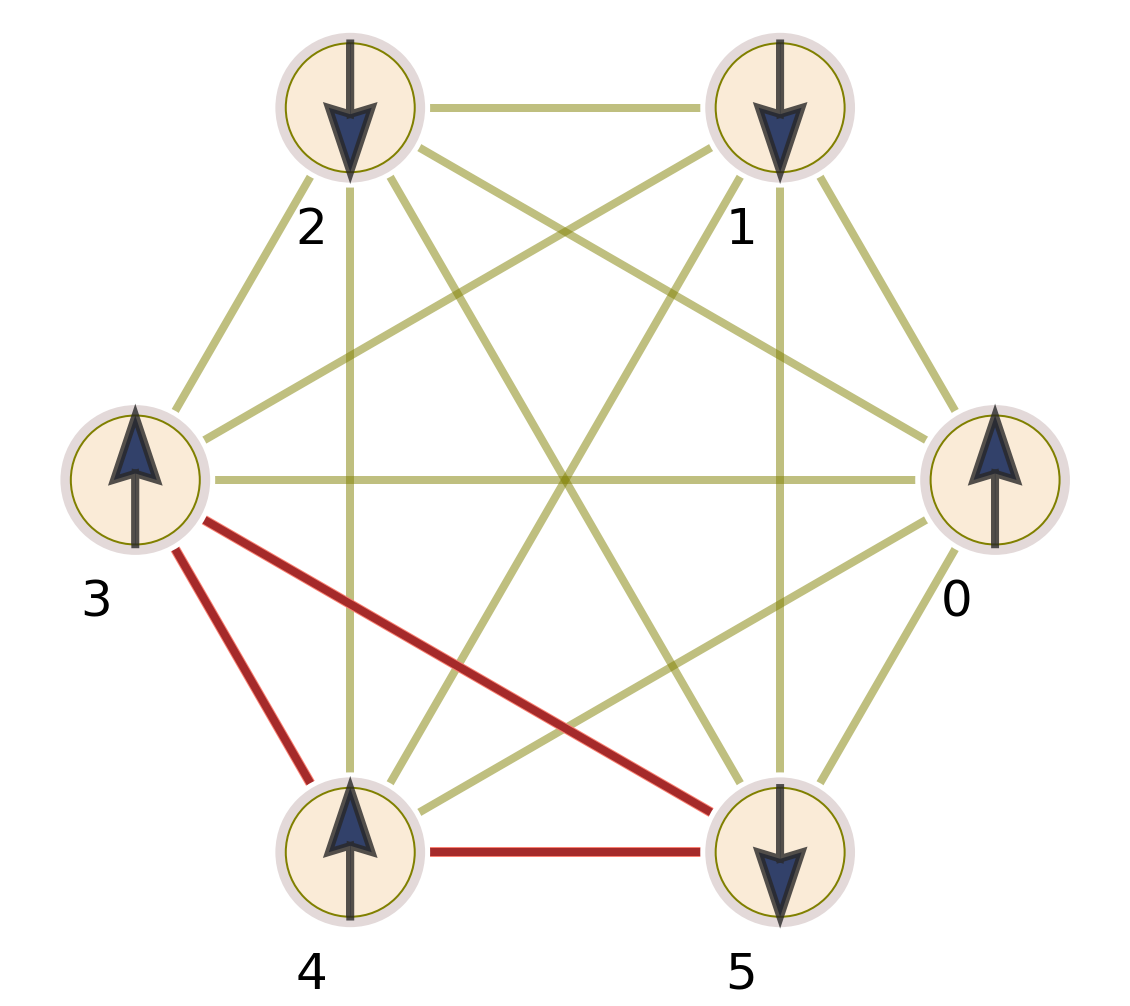

In [13]:
circles = Circles([])
for idx, (i, j) in enumerate(Circles.get_circles_of_n_eck(6)):
    up = (idx**2+idx*i)%2==0
    circles.add_circle(Circle(coord=(i, j), color="antiquewhite", name=idx, up=up, down=not up, size=0.1, fontsize=50))
name_to_coord_dict = {circle.name:circle for circle in circles}

N = 6
rotate = True
graph = Graph.complete(N)
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
circles.name_to_coord_dict
polygons = [sorted(polygon) for polygon in polygon_object.nodes_object.qbits.found_plaqs()]



polygons = [[]] + polygons
for polygon in polygons:
    cycle = [sorted(list({str(node) for qubit in polygon for node in qubit}))]
    figsize = (20, 20)
    edges = Edges([])
    circles = Circles([])
    for idx, (i, j) in enumerate(Circles.get_circles_of_n_eck(6)):
        up = (idx**2+idx*i)%2==0
        circles.add_circle(
            Circle(
                coord=(i, j),
                color="antiquewhite",
                name=idx,
                up=up,
                down=not up,
                size=0.15,
                fontsize=50,
                lw=2,
                edgecolor='olive',
            )
        )

    for edge in list(combinations(circles.coords, 2)):
        edges.add_edge(
            Edge(
                edge=edge,
                color='olive',
                lw=8,
                alpha=0.5,
                ew=0,
                zorder=0,
            )
        )

    constraint = [(circles.name_to_coord_dict[i].coord, circles.name_to_coord_dict[j].coord) 
                 for (i, j) in polygon]


    _, ax = plt.subplots(figsize=figsize)
    ax.set_aspect('equal', 'box')
    ax.axis('off')
    ax.scatter(*circles.xy, color="black", s=0, alpha=1)
    ax.set_ylim(-1.2,1.1)

    for edge in edges:
        if edge.edge in constraint:
            edge.linewidth = 8
            edge.edgewidth= 10
            edge.alpha=1
            edge.color='#A52A2A'
            edge.zorder=4
            edge.edgecolor='salmon'

        outline=mpe.withStroke(linewidth=edge.edgewidth, foreground=edge.edgecolor)
        ax.plot(*edge.xy, color=edge.color, linewidth=edge.linewidth, alpha=edge.alpha, path_effects=[outline], zorder=edge.zorder)


    for circle in circles:
        if circle.name is not None:
            label = ax.annotate(
                r"{}".format(circle.name),
                xy= (circle.coord[0] -circle.size * 0.6 , circle.coord[1]-circle.size * 1.9),
                ha="center",
                va="center",
                fontsize=circle.fontsize,
                zorder=10,
                color='black'

            )
        patch = plt.Circle(
            circle.coord,
            radius=circle.size*1.2,
            alpha=1,
            fill=True,
            fc='#e3d9d9',
            lw=5,
            ec='white',
            zorder=circle.zorder
        )
        ax.add_patch(patch)

        ax.add_patch(circle.patch)

        if circle.up:
            ax.arrow(circle.coord[0] , circle.coord[1] - circle.size, 0, circle.size, alpha=0.8,overhang=.1,
                     linewidth=circle.size * 50,head_width=circle.size/1.5, head_length=circle.size,
                     fc='#00164F', ec='#282727', zorder=6)
        if circle.down:
            ax.arrow(circle.coord[0] , circle.coord[1] + circle.size, 0, - circle.size, alpha=0.8,overhang=.1,
                     linewidth=circle.size * 50,head_width=circle.size/1.5, head_length=circle.size,
                     fc='#00164F', ec='#282727', zorder=6)
    loop = "".join((cycle[0]))
    plt.savefig(paths.plots / f"Figures/pngs/spin_glass_graph_with_{loop}_loop.png")


In [14]:

# circles = Circles([])
# for idx, (i, j) in enumerate(Circles.get_circles_of_n_eck(6)):
#     up = (idx**2+idx*i)%2==0
#     circles.add_circle(Circle(coord=(i, j), color="antiquewhite", name=idx, up=up, down=not up, size=0.1, fontsize=50))
# name_to_coord_dict = {circle.name:circle for circle in circles}

# N = 6
# rotate = True
# graph = Graph.complete(N)
# qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
# nodes_object = Nodes(qbits, place_qbits_in_lines=False)
# polygon_object = Polygons(nodes_object, scope_measure=True)
# circles.name_to_coord_dict
# polygons = [[(1, 2),(1, 3),(2, 3)]]


# ax = draw_LHZ_from_spin_glass_(polygon_object, circles.name_to_coord_dict, polygons)
# ax.figure.savefig(paths.plots / "Figures/lhz_graph_123_loop.pdf")
# ax.figure.savefig(paths.plots / "Figures/pngs/lhz_graph_123_loop.png")

In [15]:
# ax = draw_LHZ_from_spin_glass_(polygon_object, circles.name_to_coord_dict, polygons)
# rotate: bool=True
# radius=0.2

# qbit = polygon_object.nodes_object.qbits[(1, 3)]
# coord = Polygons.rotate_coords_by_45(qbit.coord, rotate)
# if len(str(qbit.qubit)) - 4 == 2:
#     fontsize = 82 * radius
# if len(str(qbit.qubit)) - 4 == 3:
#     fontsize = 70 * radius
# if len(str(qbit.qubit)) - 4 == 4:
#     fontsize = 60 * radius

# label = ax.annotate(
#     r"{},{}".format(*qbit.qubit),
#     xy=coord,
#     ha="center",
#     va="center",
#     fontsize=fontsize,
#     zorder=20,
# )

# circle = plt.Circle(
#     coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="#FFC0CB", zorder=20
# )


# ax.add_patch(circle)

# ax.figure.savefig(paths.plots / "Figures/lhz_graph_123_loop_with_contradiction.pdf")
# ax.figure.savefig(paths.plots / "Figures/pngs/lhz_graph_123_loop_with_contradiction.png")

In [16]:
# polygons = [[],[(1, 3), (1, 2), (2, 3)], [(1, 3), (1, 4), (2, 4), (2, 3)]]

# for polygon in polygons:
#     figsize = (20, 20)
#     edges = Edges([])
#     circles = Circles([])
#     for idx, (i, j) in enumerate(Circles.get_circles_of_n_eck(6)):
#         up = (idx**2+idx*i)%2==0
#         circles.add_circle(
#             Circle(
#                 coord=(i, j),
#                 color="antiquewhite",
#                 name=idx,
#                 up=up,
#                 down=not up,
#                 size=0.15,
#                 fontsize=50,
#                 lw=2,
#                 edgecolor='olive',
#             )
#         )

#     for edge in list(combinations(circles.coords, 2)):
#         edges.add_edge(
#             Edge(
#                 edge=edge,
#                 color='olive',
#                 lw=8,
#                 alpha=0.5,
#                 ew=0,
#                 zorder=0,
#             )
#         )

#     constraint = [(circles.name_to_coord_dict[i].coord, circles.name_to_coord_dict[j].coord) 
#                  for (i, j) in polygon]


#     _, ax = plt.subplots(figsize=figsize)
#     ax.set_aspect('equal', 'box')
#     ax.axis('off')
#     ax.scatter(*circles.xy, color="black", s=0, alpha=1)
#     ax.set_ylim(-1.2,1.1)

#     for edge in edges:
#         if edge.edge in constraint:
#             edge.linewidth = 8
#             edge.edgewidth= 10
#             edge.alpha=1
#             edge.color='#A52A2A'
#             edge.zorder=4
#             edge.edgecolor='salmon'

#         outline=mpe.withStroke(linewidth=edge.edgewidth, foreground=edge.edgecolor)
#         ax.plot(*edge.xy, color=edge.color, linewidth=edge.linewidth, alpha=edge.alpha, path_effects=[outline], zorder=edge.zorder)


#     for circle in circles:
#         if circle.name is not None:
#             label = ax.annotate(
#                 r"{}".format(circle.name),
#                 xy= (circle.coord[0] -circle.size * 0.6 , circle.coord[1]-circle.size * 1.9),
#                 ha="center",
#                 va="center",
#                 fontsize=circle.fontsize,
#                 zorder=10,
#                 color='black'

#             )
#         patch = plt.Circle(
#             circle.coord,
#             radius=circle.size*1.2,
#             alpha=1,
#             fill=True,
#             fc='#e3d9d9',
#             lw=5,
#             ec='white',
#             zorder=circle.zorder
#         )
#         ax.add_patch(patch)

#         ax.add_patch(circle.patch)

#         if circle.up:
#             ax.arrow(circle.coord[0] , circle.coord[1] - circle.size, 0, circle.size, alpha=0.8,overhang=.1,
#                      linewidth=circle.size * 50,head_width=circle.size/1.5, head_length=circle.size,
#                      fc='#00164F', ec='#282727', zorder=6)
#         if circle.down:
#             ax.arrow(circle.coord[0] , circle.coord[1] + circle.size, 0, - circle.size, alpha=0.8,overhang=.1,
#                      linewidth=circle.size * 50,head_width=circle.size/1.5, head_length=circle.size,
#                      fc='#00164F', ec='#282727', zorder=6)
#     if polygon == []:
#         plt.savefig(paths.plots / "Figures/spin_glass_graph_without_loop.pdf")
#         plt.savefig(paths.plots / "Figures/pngs/spin_glass_graph_without_loop.png")
#     if len(polygon)==4:
#         plt.savefig(paths.plots / "Figures/spin_glass_graph.pdf")
#         plt.savefig(paths.plots / "Figures/pngs/spin_glass_graph.png")
#     if len(polygon) == 3:
#         plt.savefig(paths.plots / "Figures/spin_glass_graph_with_123_loop.pdf")
#         plt.savefig(paths.plots / "Figures/pngs/spin_glass_graph_with_123_loop.png")


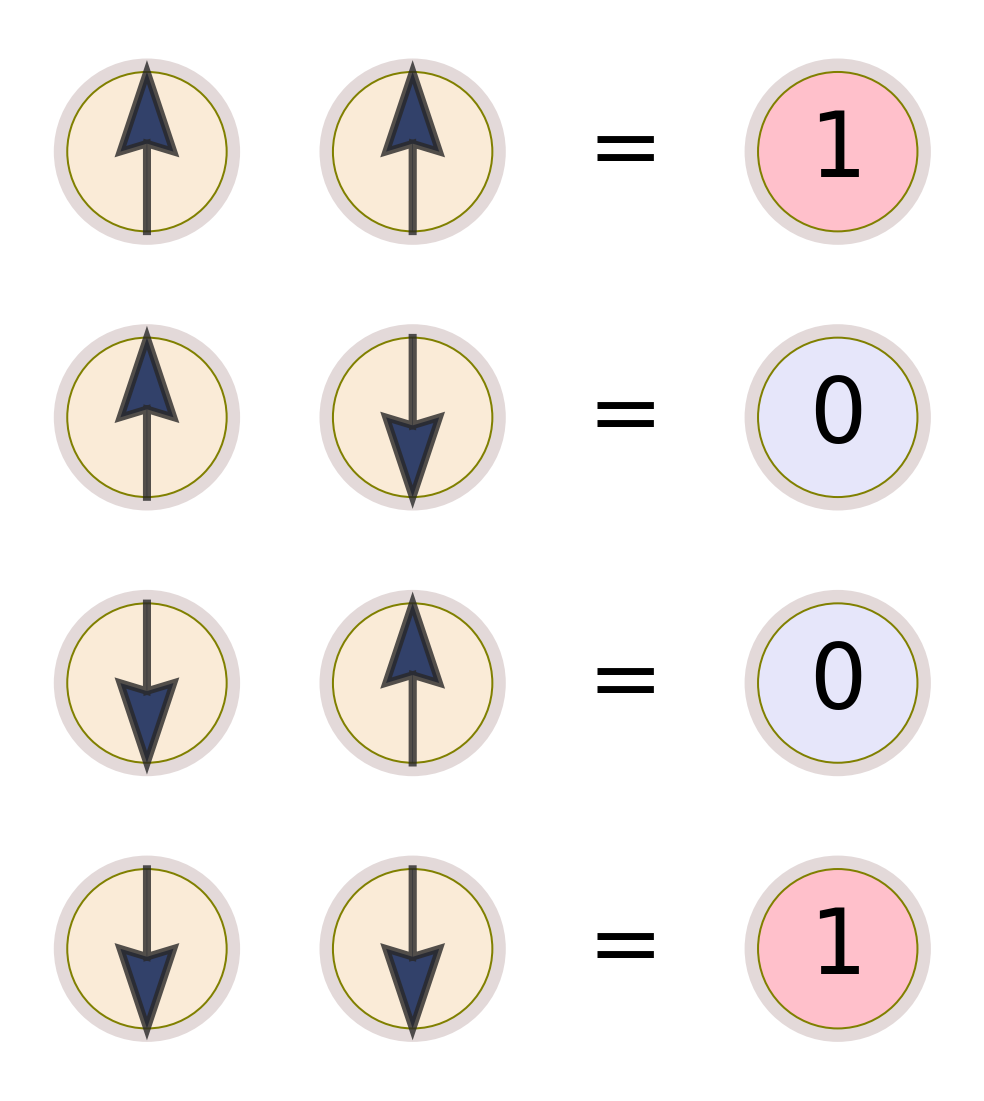

In [17]:
figsize = (20, 20)
edges = Edges([])
circles = Circles([])
n = 6
circles_ = [
     (False, (0, 0)),
     (False, (0, 1)),
     (True, (0, 2)),
     (True, (0, 3)),
     (False, (1, 0)),
     (True, (1, 1)),
     (False, (1, 2)),
     (True, (1, 3))
]

for (up, (i, j)) in (circles_):
    if i == 1:
        i -= .5
    j /=2
    circles.add_circle(Circle(coord=(i, j), up=up, down=not up, color="antiquewhite", size=0.1, fontsize=50))

circles_ = [(i, j) for i in range(2,3) for j in range(0, 4)]
for idx, (i, j) in enumerate(circles_):
    j/=2
    i-=.2
    circles.add_circle(Circle(coord=(i-.5, j), name=idx,  color="lavender", size=0.1, fontsize=50))

_, ax = plt.subplots(figsize=figsize)
ax.set_aspect('equal', 'box')
ax.axis('off')
ax.scatter(*circles.xy, color="black", s=0, alpha=1)
    
for circle in circles:
    if circle.name in [0, 3]:
        circle.name = '1'
        circle.color='#FFC0CB'
    if circle.name in [1, 2]:
        circle.name = '0'
    circle.size=0.15
    circle.linewidth = 2
    circle.edgecolor = "olive"

    circle = circle  
    patch = plt.Circle(
        circle.coord,
        radius=circle.size*1.2,
        alpha=1,
        fill=True,
        fc='#e3d9d9',
        lw=5,
        ec='white',
        zorder=circle.zorder
    )
    ax.add_patch(patch)
       
    ax.add_patch(circle.patch)
    if circle.name is not None:
        label = ax.annotate(
            r"{}".format("="),
            xy= (circle.coord[0] - .8 / 2 , circle.coord[1]),
            ha="center",
            va="center",
            fontsize=circle.fontsize*1.8,
            zorder=10,
            color='black'
            
        )        
        label = ax.annotate(
            r"{}".format(circle.name),
            xy= (circle.coord[0], circle.coord[1]),
            ha="center",
            va="center",
            fontsize=circle.fontsize*1.8,
            zorder=10,
            color='black',
        )
    if circle.up:
        ax.arrow(circle.coord[0] , circle.coord[1] - circle.size, 0, circle.size, alpha=0.8,overhang=.1,
             linewidth=circle.size * 50,head_width=circle.size/1.5, head_length=circle.size,
             fc='#00164F', ec='#282727', zorder=6)

    if circle.down:
        ax.arrow(circle.coord[0] , circle.coord[1] + circle.size, 0, - circle.size, alpha=0.8,overhang=.1,
             linewidth=circle.size * 50,head_width=circle.size/1.5, head_length=circle.size,
             fc='#00164F', ec='#282727', zorder=6)
ax.figure.savefig(paths.plots / f"ThesisFigures/parity.pdf")

plt.savefig(paths.plots / "Figures/parity.pdf")
plt.savefig(paths.plots / "Figures/pngs/parity.png")


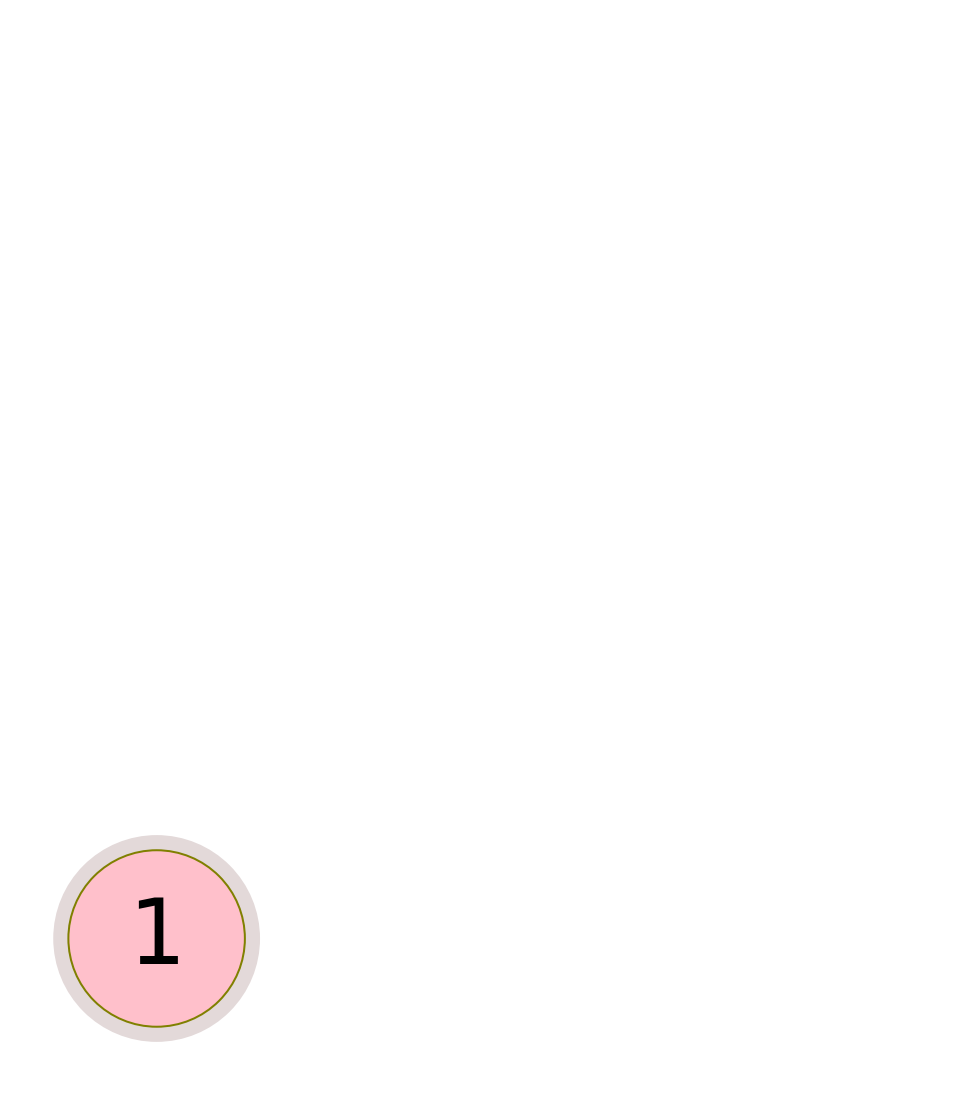

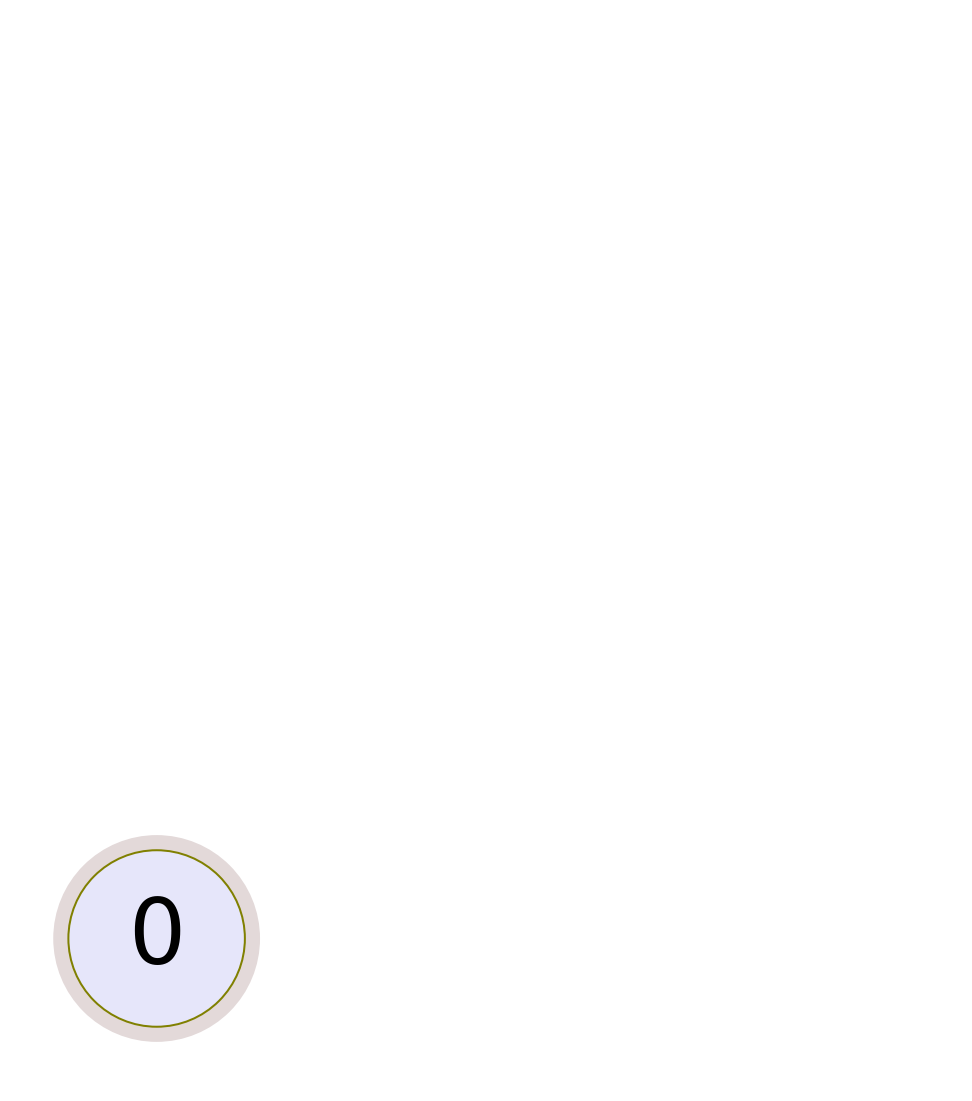

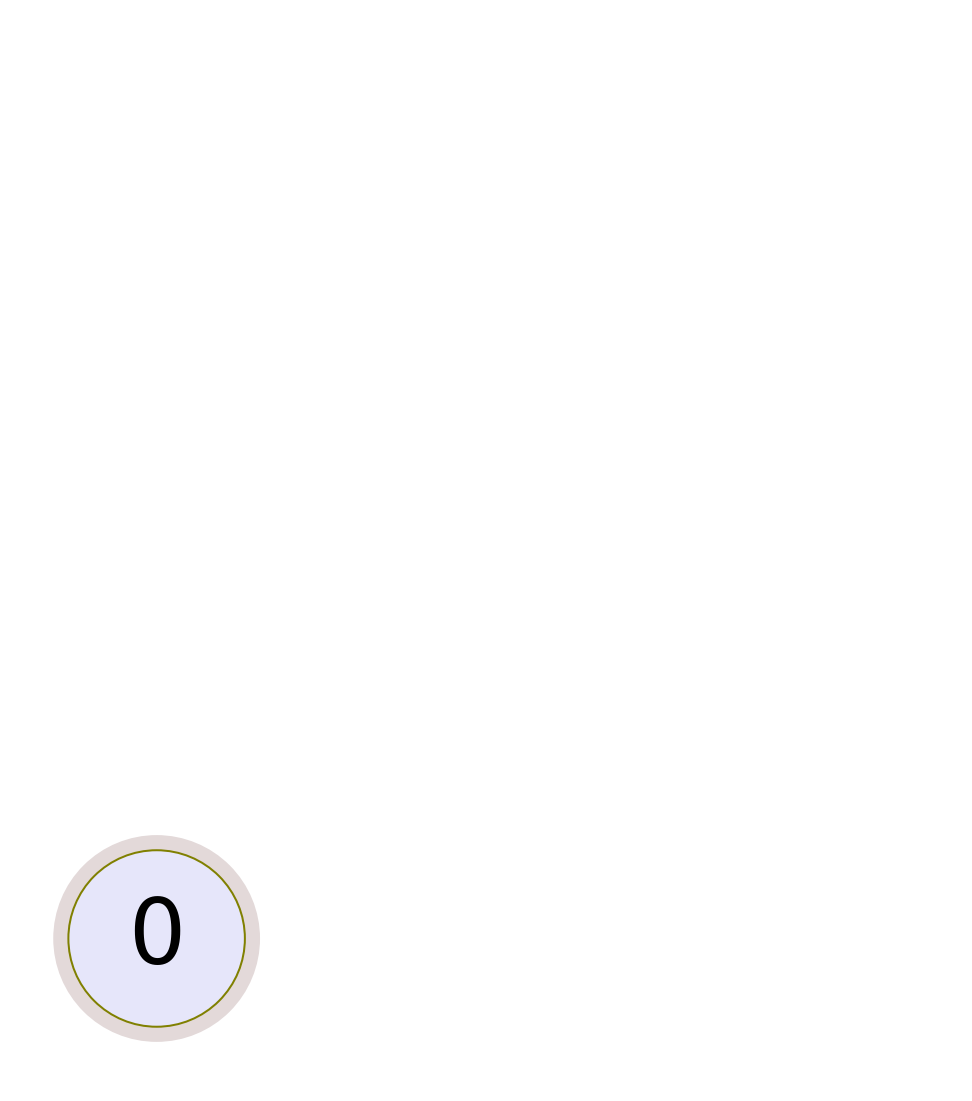

In [18]:
figsize = (20, 20)
edges = Edges([])
circles = Circles([])
n = 4
circles_ = [
]

for (up, (i, j)) in (circles_):
    if i == 1:
        i -= .5
    j /=2
    circles.add_circle(Circle(coord=(i, j), up=up, down=not up, color="antiquewhite", size=0.1, fontsize=50))

circles_ = [(i, j) for i in range(2,3) for j in range(0, 4)]
for idx, (i, j) in enumerate(circles_):
    j/=2
    i-=.2
    circles.add_circle(Circle(coord=(i-.5, j), name=idx,  color="lavender", size=0.1, fontsize=50))


for idx, circle in enumerate(circles):
    _, ax = plt.subplots(figsize=figsize)
    ax.set_aspect('equal', 'box')
    ax.axis('off')
    ax.scatter(*circles.xy, color="black", s=0, alpha=1)
    
    circle.coord = (0, 0)
    if circle.name in [0, 3]:
        circle.name = '1'
        circle.color='#FFC0CB'
    if circle.name in [1, 2]:
        circle.name = '0'
    circle.size=0.15
    circle.linewidth = 2
    circle.edgecolor = "olive"

    circle = circle  
    patch = plt.Circle(
        circle.coord,
        radius=circle.size*1.2,
        alpha=1,
        fill=True,
        fc='#e3d9d9',
        lw=5,
        ec='white',
        zorder=circle.zorder
    )
    ax.add_patch(patch)
       
    ax.add_patch(circle.patch)
    if circle.name is not None:
        label = ax.annotate(
            r"{}".format("="),
            xy= (circle.coord[0] - .8 / 2 , circle.coord[1]),
            ha="center",
            va="center",
            fontsize=circle.fontsize*1.8,
            zorder=10,
            color='black'
            
        )        
        label = ax.annotate(
            r"{}".format(circle.name),
            xy= (circle.coord[0], circle.coord[1]),
            ha="center",
            va="center",
            fontsize=circle.fontsize*1.8,
            zorder=10,
            color='black',
        )
    if idx > 1:
        break
    idx = (idx +1)%2
    plt.savefig(paths.plots / f"Figures/parity_{idx}.pdf")
    plt.savefig(paths.plots / f"Figures/pngs/parity_{idx}.png")

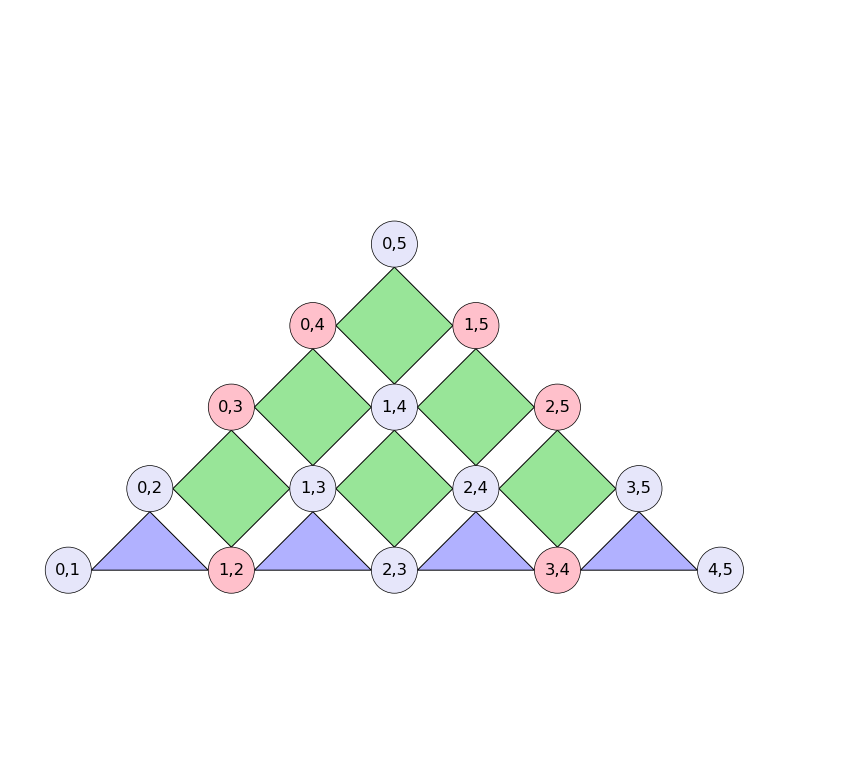

In [19]:
circles = Circles([])
for idx, (i, j) in enumerate(Circles.get_circles_of_n_eck(6)):
    up = (idx**2+idx*i)%2==0
    circles.add_circle(Circle(coord=(i, j), color="antiquewhite", name=idx, up=up, down=not up, size=0.1, fontsize=50))
name_to_coord_dict = {circle.name:circle for circle in circles}

N = 6
rotate = True
graph = Graph.complete(N)
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
circles.name_to_coord_dict
polygons = [[(1, 3), (1, 4), (2, 4), ( 2, 3)]]

ax = draw_LHZ_from_spin_glass(polygon_object, circles.name_to_coord_dict, polygons, ['white'])
            

ax.figure.savefig(paths.plots / 'Figures/lhz_N_6_without_loop.pdf')
ax.figure.savefig(paths.plots / 'Figures/pngs/lhz_N_6_without_loop.png')

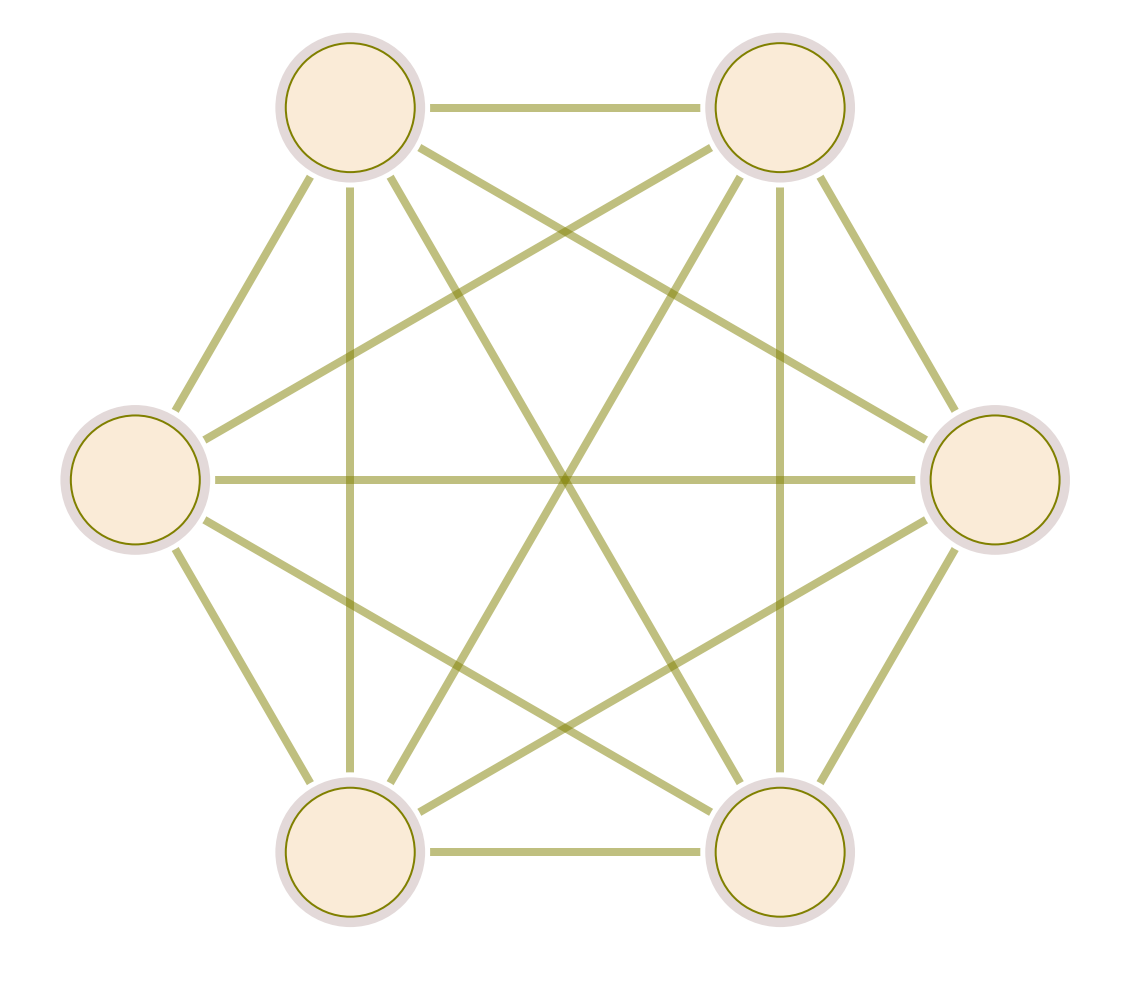

In [20]:
missing_link = []

figsize = (20, 20)
edges = Edges([])
circles = Circles([])
for idx, (i, j) in enumerate(Circles.get_circles_of_n_eck(6)):
    up = (idx**2+idx*i)%2==0
    circles.add_circle(
        Circle(
            coord=(i, j),
            color="antiquewhite",
            name=idx,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        )
    )
    
for edge in list(combinations(circles.coords, 2)):
    edges.add_edge(
        Edge(
            edge=edge,
            color='olive',
            lw=8,
            alpha=0.5,
            ew=0,
            zorder=0,
        )
    )

ancilla = [(circles.name_to_coord_dict[i].coord, circles.name_to_coord_dict[j].coord) 
             for (i, j) in missing_link]


_, ax = plt.subplots(figsize=figsize)
ax.set_aspect('equal', 'box')
ax.axis('off')
ax.scatter(*circles.xy, color="black", s=0, alpha=1)
ax.set_ylim(-1.2,1.1)

for edge in edges:
    if edge.edge in ancilla:
        edge.linewidth = 8
        edge.edgewidth= 10
        edge.alpha=1
        edge.color='#A52A2A'
        edge.zorder=4
        edge.edgecolor='salmon'

    outline=mpe.withStroke(linewidth=edge.edgewidth, foreground=edge.edgecolor)
    ax.plot(*edge.xy, color=edge.color, linewidth=edge.linewidth, alpha=edge.alpha, path_effects=[outline], zorder=edge.zorder)
    
    
for circle in circles:
    if circle.name is not None:
        label = ax.annotate(
            "",#r"{}".format(circle.name),
            xy= (circle.coord[0] -circle.size * 0.6 , circle.coord[1]-circle.size * 1.9),
            ha="center",
            va="center",
            fontsize=circle.fontsize,
            zorder=10,
            color='black'
            
        )
    patch = plt.Circle(
        circle.coord,
        radius=circle.size*1.2,
        alpha=1,
        fill=True,
        fc='#e3d9d9',
        lw=5,
        ec='white',
        zorder=circle.zorder
    )
    ax.add_patch(patch)
       
    ax.add_patch(circle.patch)

plt.savefig(paths.plots / "Figures/pngs/spin_glass_N_6_no_spins.png")

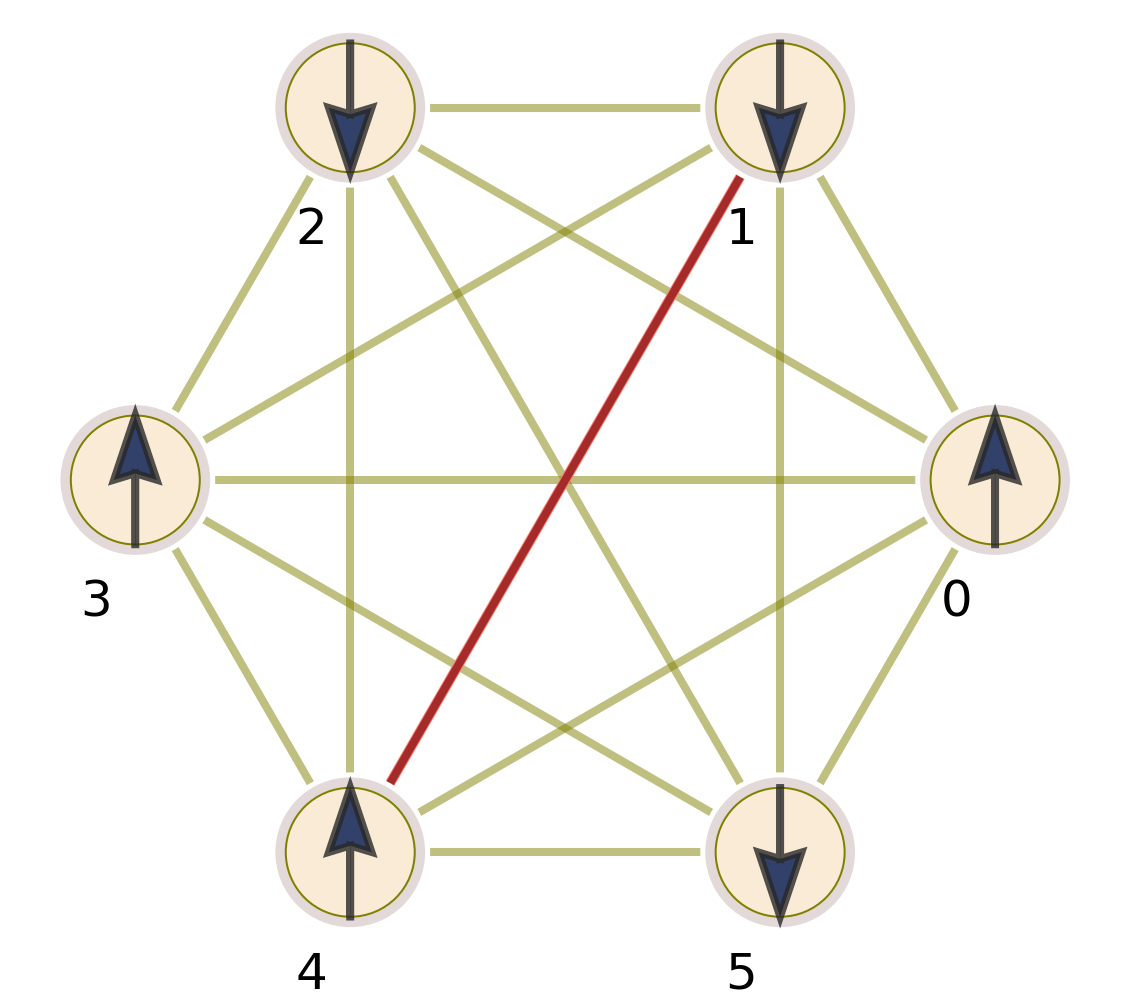

In [21]:
missing_link = [(1, 4)]

figsize = (20, 20)
edges = Edges([])
circles = Circles([])
for idx, (i, j) in enumerate(Circles.get_circles_of_n_eck(6)):
    up = (idx**2+idx*i)%2==0
    circles.add_circle(
        Circle(
            coord=(i, j),
            color="antiquewhite",
            name=idx,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        )
    )
    
for edge in list(combinations(circles.coords, 2)):
    edges.add_edge(
        Edge(
            edge=edge,
            color='olive',
            lw=8,
            alpha=0.5,
            ew=0,
            zorder=0,
        )
    )

ancilla = [(circles.name_to_coord_dict[i].coord, circles.name_to_coord_dict[j].coord) 
             for (i, j) in missing_link]


_, ax = plt.subplots(figsize=figsize)
ax.set_aspect('equal', 'box')
ax.axis('off')
ax.scatter(*circles.xy, color="black", s=0, alpha=1)
ax.set_ylim(-1.2,1.1)

for edge in edges:
    if edge.edge in ancilla:
        edge.linewidth = 8
        edge.edgewidth= 10
        edge.alpha=1
        edge.color='#A52A2A'
        edge.zorder=4
        edge.edgecolor='salmon'

    outline=mpe.withStroke(linewidth=edge.edgewidth, foreground=edge.edgecolor)
    ax.plot(*edge.xy, color=edge.color, linewidth=edge.linewidth, alpha=edge.alpha, path_effects=[outline], zorder=edge.zorder)
    
    
for circle in circles:
    if circle.name is not None:
        label = ax.annotate(
            r"{}".format(circle.name),
            xy= (circle.coord[0] -circle.size * 0.6 , circle.coord[1]-circle.size * 1.9),
            ha="center",
            va="center",
            fontsize=circle.fontsize,
            zorder=10,
            color='black'
            
        )
    patch = plt.Circle(
        circle.coord,
        radius=circle.size*1.2,
        alpha=1,
        fill=True,
        fc='#e3d9d9',
        lw=5,
        ec='white',
        zorder=circle.zorder
    )
    ax.add_patch(patch)
       
    ax.add_patch(circle.patch)

    if circle.up:
        ax.arrow(circle.coord[0] , circle.coord[1] - circle.size, 0, circle.size, alpha=0.8,overhang=.1,
                 linewidth=circle.size * 50,head_width=circle.size/1.5, head_length=circle.size,
                 fc='#00164F', ec='#282727', zorder=6)
    if circle.down:
        ax.arrow(circle.coord[0] , circle.coord[1] + circle.size, 0, - circle.size, alpha=0.8,overhang=.1,
                 linewidth=circle.size * 50,head_width=circle.size/1.5, head_length=circle.size,
                 fc='#00164F', ec='#282727', zorder=6)
plt.savefig(paths.plots / "Figures/spin_glass_graph_missing_link.pdf")
plt.savefig(paths.plots / "Figures/pngs/spin_glass_graph_missing_link.png")

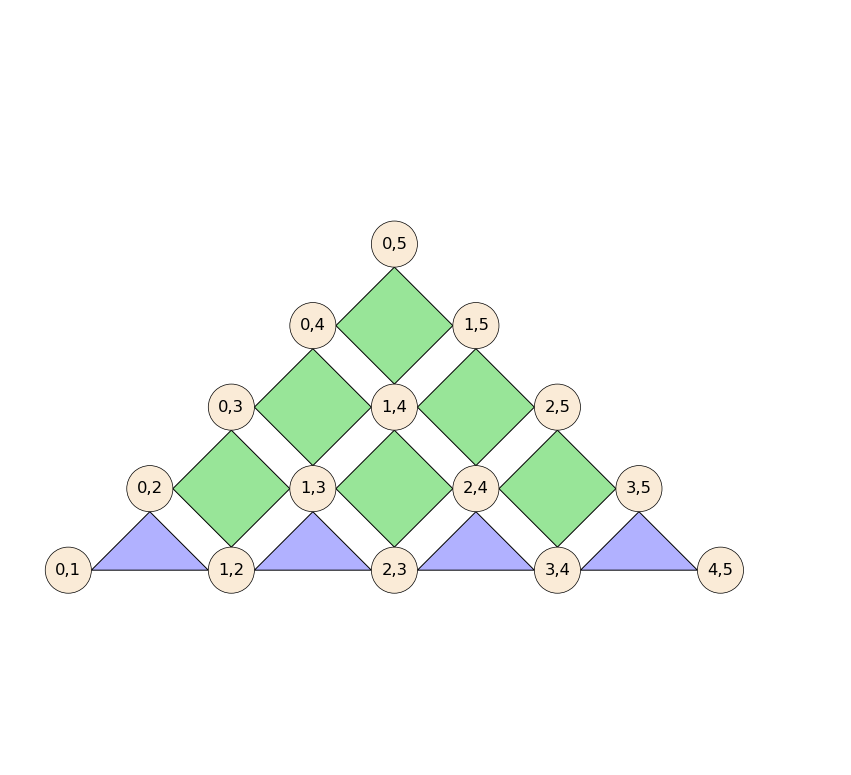

In [22]:

N = 6
rotate = True
graph = Graph.complete(N)
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)


ax = polygon_object.visualize(rotate=True)

ax.figure.savefig(paths.plots / 'Figures/lhz_N_6_without_ancilla.pdf')
ax.figure.savefig(paths.plots / 'Figures/pngs/lhz_N_6_without_ancilla.png')

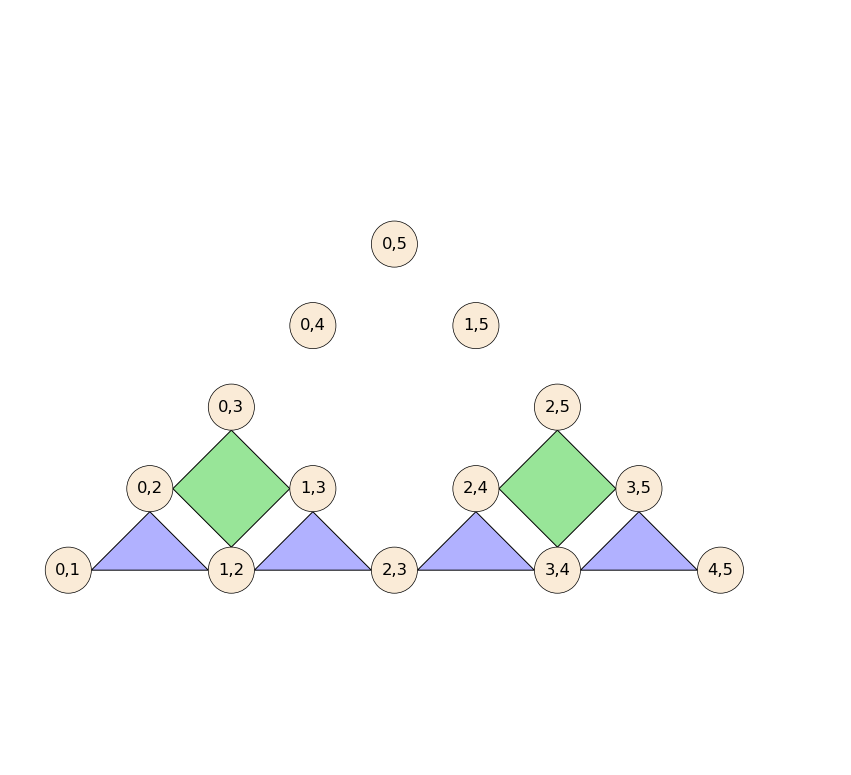

In [23]:
missing_link = [(1, 4)]

N = 6
rotate = True
graph = Graph.init_without_edges(N, missing_link)
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)

ax = polygon_object.visualize(rotate=True)

ax.figure.savefig(paths.plots / 'Figures/lhz_N_6_with_hole.pdf')
ax.figure.savefig(paths.plots / 'Figures/pngs/lhz_N_6_with_hole.png')

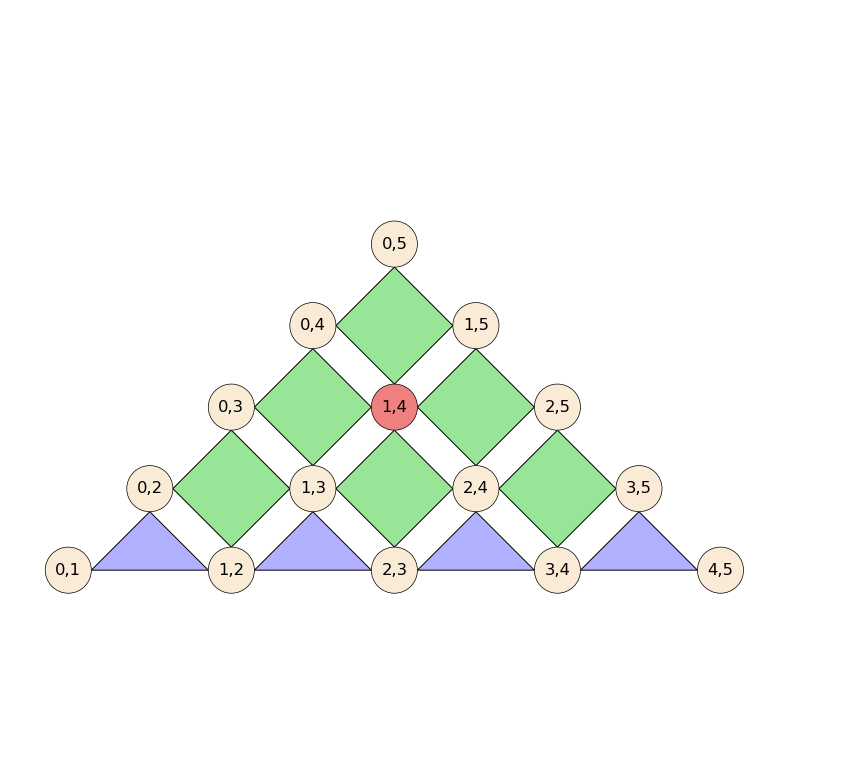

In [24]:
missing_link = [(1, 4)]

N = 6
rotate = True
graph = Graph.complete(N)
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)

qbits[missing_link[0]].ancilla = True
qbits[missing_link[0]].core = True 

ax = polygon_object.visualize(rotate=True)

ax.figure.savefig(paths.plots / 'Figures/lhz_N_6_with_ancilla.pdf')
ax.figure.savefig(paths.plots / 'Figures/pngs/lhz_N_6_with_ancilla.png')

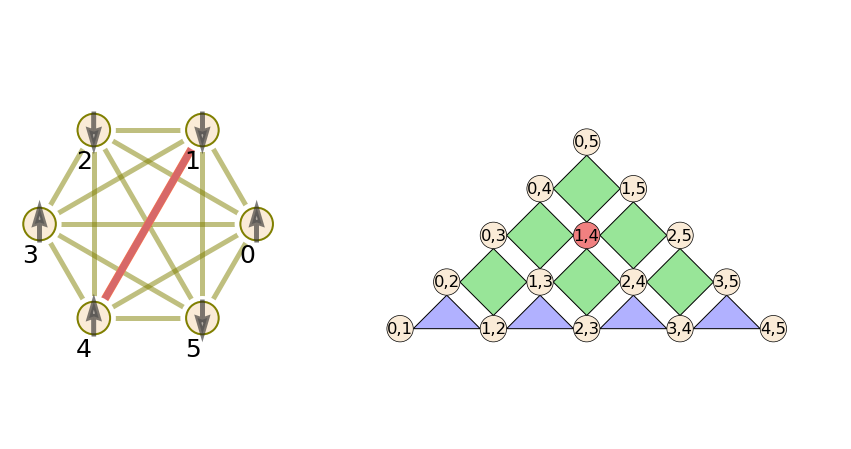

In [25]:
missing_link = [(1, 4)]

figsize = (20, 20)
edges = Edges([])
circles = Circles([])
for idx, (i, j) in enumerate(Circles.get_circles_of_n_eck(6)):
    up = (idx**2+idx*i)%2==0
    circles.add_circle(
        Circle(
            coord=(i, j),
            color="antiquewhite",
            name=idx,
            up=up,
            down=not up,
            size=0.15,
            fontsize=25,
            lw=2,
            edgecolor='olive',
        )
    )
    
for edge in list(combinations(circles.coords, 2)):
    edges.add_edge(
        Edge(
            edge=edge,
            color='olive',
            lw=5,
            alpha=0.5,
            ew=0,
            zorder=0,
        )
    )

ancilla = [(circles.name_to_coord_dict[i].coord, circles.name_to_coord_dict[j].coord) 
             for (i, j) in missing_link]


fig, axx = plt.subplots(1, 2, figsize=(15, 15), gridspec_kw={'width_ratios': [1, 1.7]})
ax = axx[0]
ax.set_aspect('equal', 'box')
ax.axis('off')
ax.scatter(*circles.xy, color="black", s=0, alpha=1)

for edge in edges:
    if edge.edge in ancilla:
        edge.linewidth = 7
        edge.edgewidth= 8
        edge.alpha=1
        edge.color='#d76868'
        edge.zorder=4
        edge.edgecolor='coral'

    outline=mpe.withStroke(linewidth=edge.edgewidth, foreground=edge.edgecolor)
    ax.plot(*edge.xy, color=edge.color, linewidth=edge.linewidth, alpha=edge.alpha, path_effects=[outline], zorder=edge.zorder)
    
    
for circle in circles:
    if circle.name is not None:
        label = ax.annotate(
            r"{}".format(circle.name),
            xy= (circle.coord[0] -circle.size * 0.6 , circle.coord[1]-circle.size * 1.9),
            ha="center",
            va="center",
            fontsize=circle.fontsize,
            zorder=10,
            color='black'
            
        )
    patch = plt.Circle(
        circle.coord,
        radius=circle.size*1.2,
        alpha=1,
        fill=True,
        fc='#e3d9d9',
        lw=5,
        ec='white',
        zorder=circle.zorder
    )
    ax.add_patch(patch)
       
    ax.add_patch(circle.patch)

    if circle.up:
        ax.arrow(circle.coord[0] , circle.coord[1] - circle.size, 0, circle.size, alpha=0.6,overhang=.1,
                 linewidth=circle.size * 30,head_width=circle.size/1.7, head_length=circle.size,
                 fc='gray', ec='#282727', zorder=6)
    if circle.down:
        ax.arrow(circle.coord[0] , circle.coord[1] + circle.size, 0, - circle.size, alpha=0.6,overhang=.1,
                 linewidth=circle.size * 30,head_width=circle.size/1.7, head_length=circle.size,
                 fc='gray', ec='#282727', zorder=6)

missing_link = [(1, 4)]

N = 6
rotate = True
graph = Graph.complete(N)
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)

qbits[missing_link[0]].ancilla = True
qbits[missing_link[0]].core = True 

ax = polygon_object.visualize(ax=axx[1], rotate=True)
plt.subplots_adjust(wspace=.2)

ax.figure.savefig(paths.plots / 'Figures/sping_glass_and_lhz_N_6_with_ancilla.pdf')
ax.figure.savefig(paths.plots / "Figures/pngs/sping_glass_and_lhz_N_6_with_ancilla.png")

In [26]:
colors = ["lightcoral", "plum", "olive", "goldenrod", "grey" , "limegreen", "cornflowerblue", ]

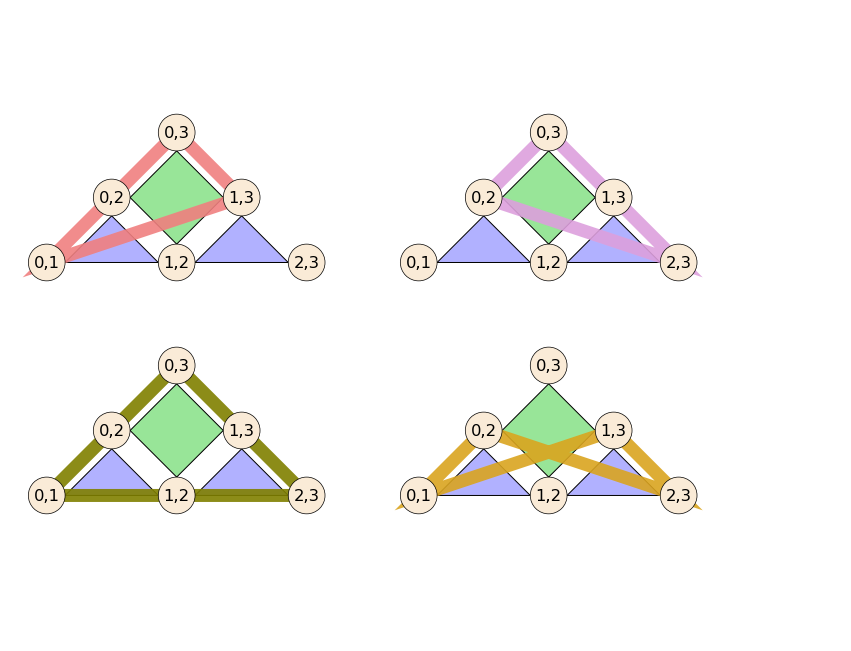

In [27]:
N = 4
rotate = True
graph = Graph.complete(N)
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
polygons = [p for p in polygon_object.polygons if sorted(p) not in qbits.found_plaqs()]
        
for idx,ij_polygon in enumerate(zip([(0, 0), (0, 1), (1, 0), (1, 1)]
, polygons)):
    (i, j), polygon = ij_polygon

    ax[(i, j)] = polygon_object.visualize(ax=ax[i, j], rotate=rotate)

    polygon = [Polygons.rotate_coords_by_45(coord, rotate) for coord in polygon]
    patch = plt.Polygon(
        polygon,
        zorder=0,
        lw=13,
        alpha=0.9,
        color=colors[idx],
        fill=False,
    )
    ax[i, j].add_patch(patch)
plt.subplots_adjust(wspace=-.2, hspace=-.6)

plt.savefig(paths.plots / 'Figures/illustration_of_polygons_in_LHZ_N_4.pdf')
plt.savefig(paths.plots / "Figures/pngs/illustration_of_polygons_in_LHZ_N_4.png")

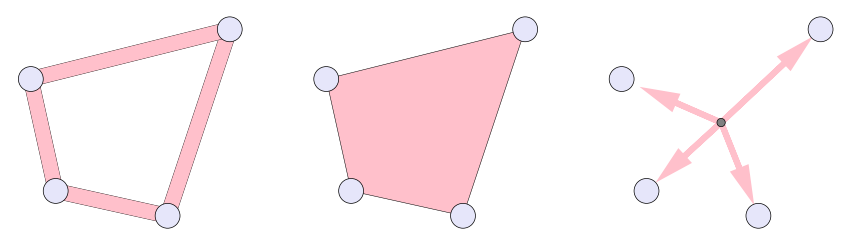

In [28]:
self = polygon_object
ax=None
zoom=1
figsize=(15, 15)
core_corner=None
check_ancilla_in_core: bool = True
envelop_rect=None
rotate: bool=True
radius=0.1

fig, ax = plt.subplots(1, 3, figsize=(15, 15))

axx = ax[0]
axx.set_aspect('equal', 'box')
axx.axis('off')

axx.scatter(0, 0, color="white", s=0.6, alpha=0)
coords = [(.1,.1), (1,-.1),(1.5, 1.4),(-.1, 1), ]
for coord in coords:
    circle = plt.Circle(
    coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="lavender", zorder=20
    )
    axx.add_patch(circle)
    
for edge in Polygons.create_polygon_from_cycle(coords):
    x, y = list(zip(*edge))
    outline=mpe.withStroke(linewidth=15.5, foreground='black')
    axx.plot(x, y, color='#FFC0CB', lw=15, path_effects=[outline])
    
    
axx = ax[1]

axx.set_aspect('equal', 'box')
axx.axis('off')

axx.scatter(0, 0, color="white", s=0.6, alpha=0)
coords = [(.1,.1), (1,-.1),(1.5, 1.4),(-.1, 1), ]
for coord in coords:
    circle = plt.Circle(
    coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="lavender", zorder=20
    )
    axx.add_patch(circle)
    
patch = plt.Polygon(
coords,
zorder=0,
lw=0.5,
facecolor="#FFC0CB",
fill=True,
edgecolor='black',
)
axx.add_patch(patch)


axx = ax[2]


axx.set_aspect('equal', 'box')
axx.axis('off')

axx.scatter(0, 0, color="white", s=0.6, alpha=0)
coords = [(.1,.1), (1,-.1),(1.5, 1.4),(-.1, 1), ]
center = Polygons.center_of_coords(coords)
circle = plt.Circle(
center, radius=radius/3, alpha=1.0, lw=0.7, ec="black", fc="grey", zorder=20
)
axx.add_patch(circle)
for coord in coords:
    circle = plt.Circle(
    coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="lavender", zorder=20
    )
    axx.add_patch(circle)

for coord in coords:
    vector = np.subtract(coord, center)
    length = np.linalg.norm(vector)
    if length > 1:
        vector /= 1.4 * length
    else:
        vector /= (2.4 * length)
    x, y = vector
#     axx.plot(x, y, color='#FFC0CB', lw=10)
    axx.arrow(center[0], center[1], x, y, linewidth=6,head_width=0.1, head_length=0.2, fc='#FFC0CB', ec='#FFC0CB', zorder=6)
    
fig.figure.savefig(paths.plots / f"ThesisFigures/scope_and_moi_in_polygon.pdf")

plt.savefig(paths.plots / 'ThesisFigures/scope_and_moi_in_polygon.pdf')
plt.savefig(paths.plots / "Figures/pngs/scope_and_moi_in_polygon.png")

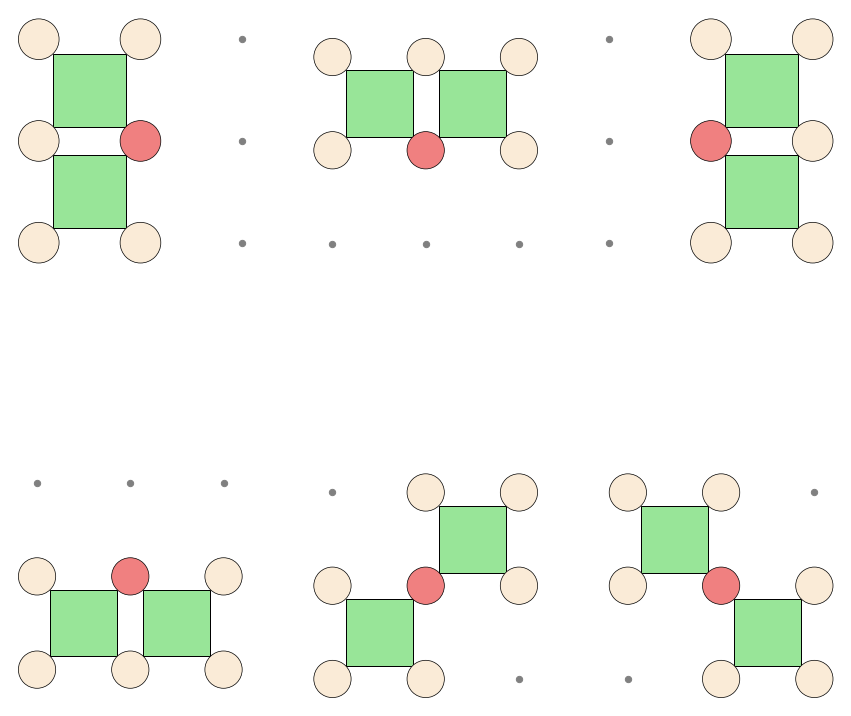

In [29]:
N = 6
rotate = True
graph = Graph.init_without_edges(N, [(0,1),(0,2),(1,2),(3,4),(3,5),(4,5)])
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
qbits[(1,4)].ancilla = True
qbits[(1,4)].core = True
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
fig, ax = plt.subplots(2, 3, figsize=(15, 15))

polygons = [
    [(0, 3), (1, 3), (1, 4), (0, 4)],
    [(0, 4), (1, 4), (1, 5), (0, 5)],
]
visualize_ancilla(polygon_object, ax[0,0], polygons, s=40)

polygons = [
    [(0, 4), (1, 4), (1, 5), (0, 5)],
    [(1, 4), (2, 4), (2, 5), (1, 5)]
]
visualize_ancilla(polygon_object, ax[0,1], polygons, s=40)

polygons = [
    [(1, 3), (2, 3), (2, 4), (1, 4)],
    [(1, 4), (2, 4), (2, 5), (1, 5)]
]
visualize_ancilla(polygon_object, ax[0,2], polygons, s=40)

polygons = [
    [(0, 3), (1, 3), (1, 4), (0, 4)],
    [(1, 3), (2, 3), (2, 4), (1, 4)],
]
visualize_ancilla(polygon_object, ax[1,0], polygons, s=40)

polygons = [
    [(0, 3), (1, 3), (1, 4), (0, 4)],
    [(1, 4), (2, 4), (2, 5), (1, 5)]
]
visualize_ancilla(polygon_object, ax[1,1], polygons, s=40)

polygons = [
    [(0, 4), (1, 4), (1, 5), (0, 5)],
    [(1, 3), (2, 3), (2, 4), (1, 4)],
]
visualize_ancilla(polygon_object, ax[1,2], polygons, s=40)

fig.figure.savefig(paths.plots / f"ThesisFigures/ancilla_proposals.pdf")

plt.savefig(paths.plots / 'Figures/ancilla_proposals.pdf')
plt.savefig(paths.plots / "Figures/pngs/ancilla_proposals.png")

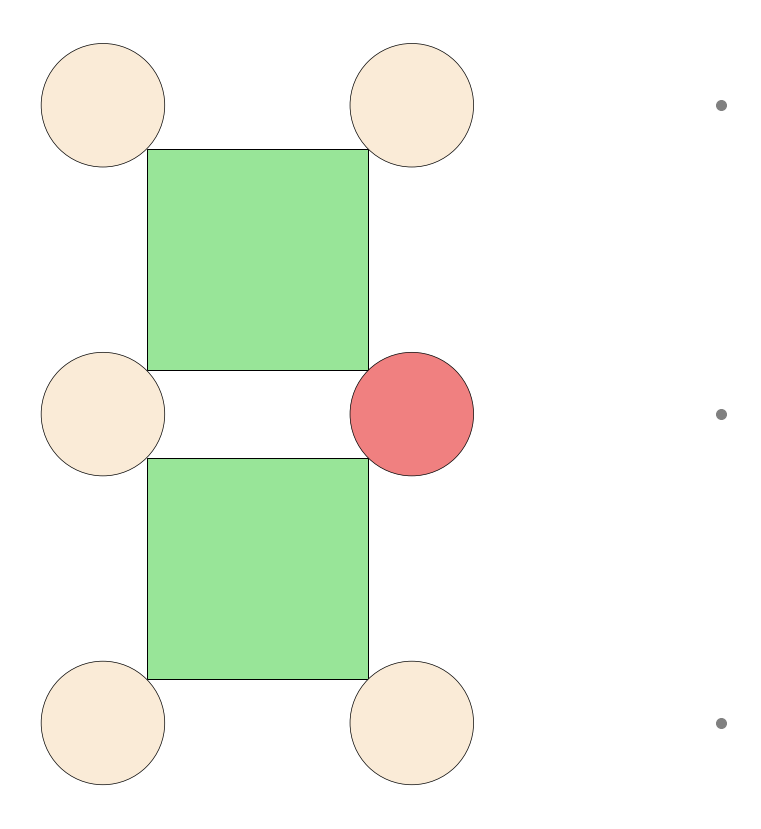

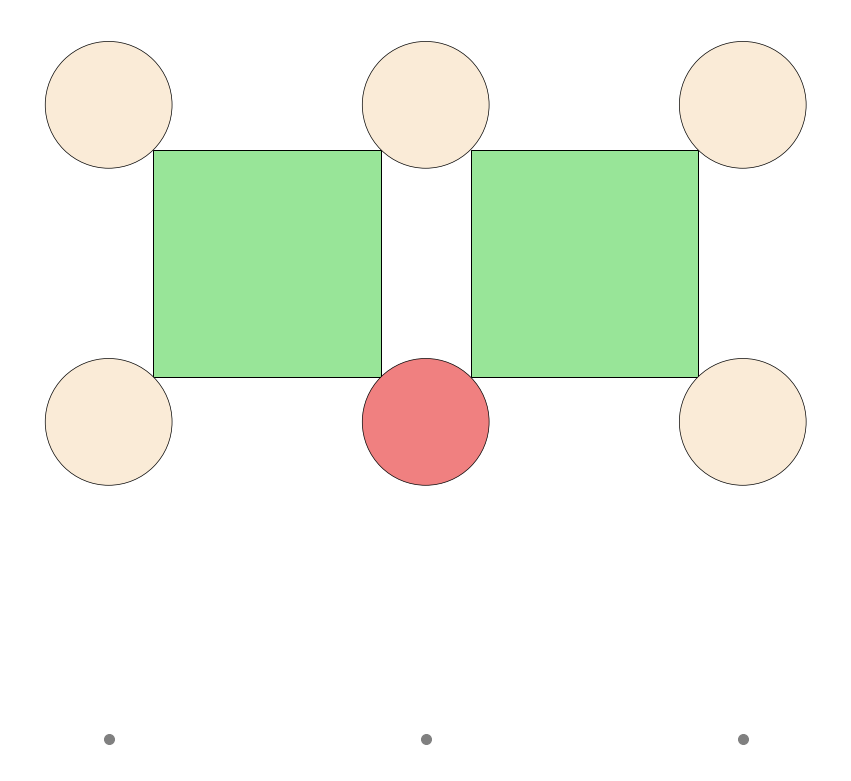

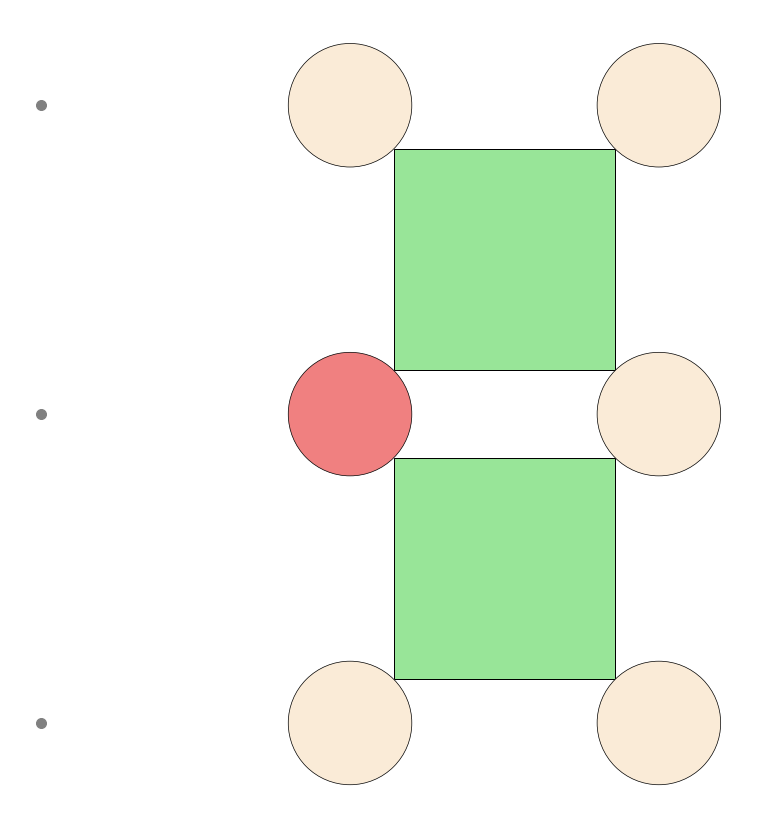

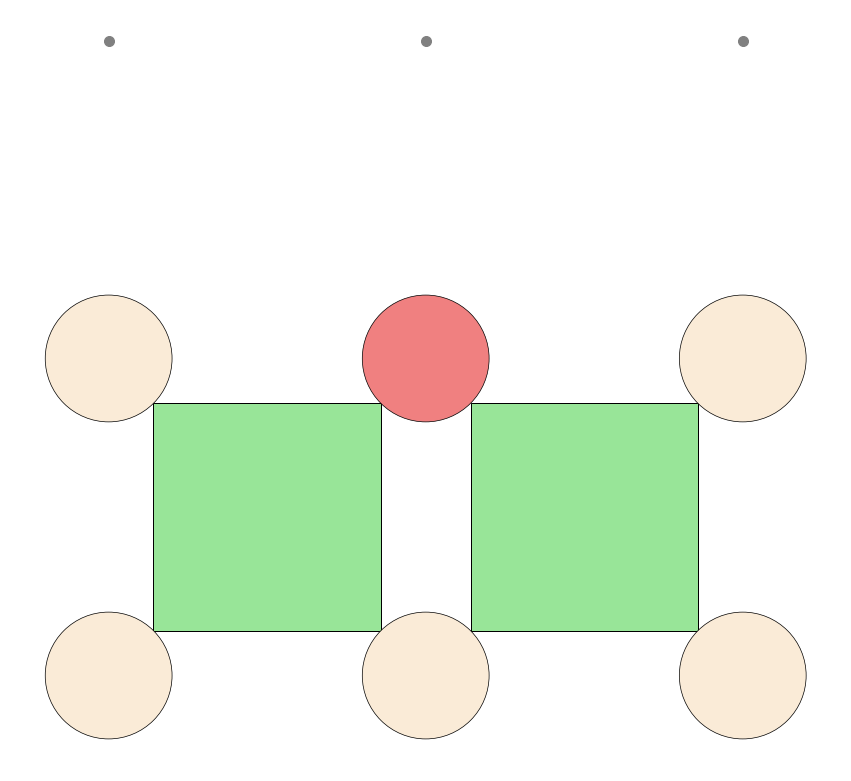

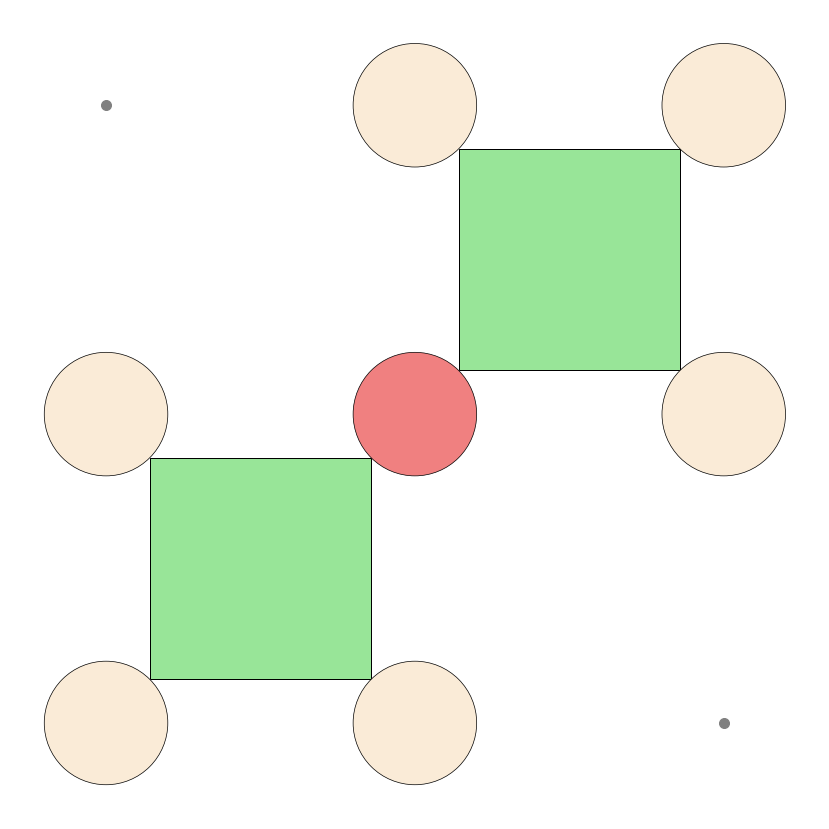

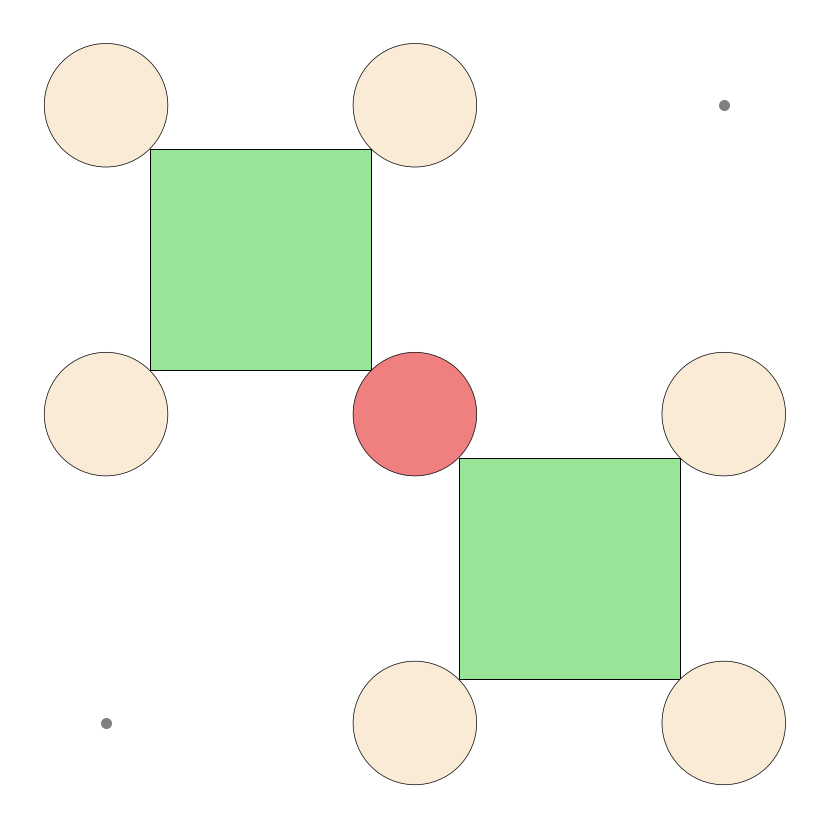

In [30]:
N = 6
rotate = True
graph = Graph.init_without_edges(N, [(0,1),(0,2),(1,2),(3,4),(3,5),(4,5)])
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
qbits[(1,4)].ancilla = True
qbits[(1,4)].core = True
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
_, ax = plt.subplots(figsize=figsize)
polygons = [[
    [(0, 3), (1, 3), (1, 4), (0, 4)],
    [(0, 4), (1, 4), (1, 5), (0, 5)],
],
[
    [(0, 4), (1, 4), (1, 5), (0, 5)],
    [(1, 4), (2, 4), (2, 5), (1, 5)]
],
[
    [(1, 3), (2, 3), (2, 4), (1, 4)],
    [(1, 4), (2, 4), (2, 5), (1, 5)]
],
[
    [(0, 3), (1, 3), (1, 4), (0, 4)],
    [(1, 3), (2, 3), (2, 4), (1, 4)],
],
[
    [(0, 3), (1, 3), (1, 4), (0, 4)],
    [(1, 4), (2, 4), (2, 5), (1, 5)]
],
[
    [(0, 4), (1, 4), (1, 5), (0, 5)],
    [(1, 3), (2, 3), (2, 4), (1, 4)],
]]
for idx, polygon in enumerate(polygons):
    ax = visualize_ancilla(polygon_object, ax, polygon, s=100)


    plt.savefig(paths.plots / f'Figures/ancilla_proposal_{idx}.pdf')
    plt.savefig(paths.plots / f"Figures/pngs/ancilla_proposal_{idx}.png")

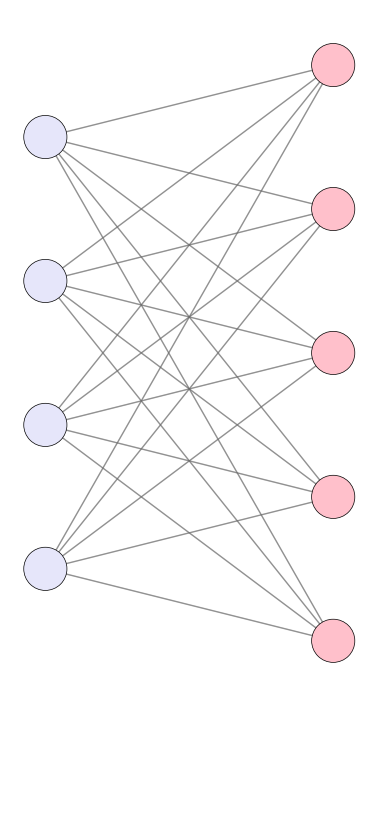

In [31]:
self = polygon_object
ax=None
zoom=1
figsize=(15, 15)
core_corner=None
check_ancilla_in_core: bool = True
envelop_rect=None
rotate: bool=True
radius=0.15

_, ax = plt.subplots(figsize=figsize)

ax.set_aspect('equal', 'box')
ax.axis('off')

ax.scatter(0, 0, color="white", s=0.6, alpha=0)
Acoords = [(0, 1), (0, 2), (0, 3), (0, 4)]
Acoords = [(x, y + .5) for (x, y) in Acoords]

Bcoords = [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5)]
Bcoords = [(x + 1, y) for (x, y) in Bcoords]

edges = [(a, b) for a in Acoords for b in Bcoords]

A, B  = [], []#[Acoords[0], Acoords[1]], [Bcoords[1], Bcoords[2]]


for coord in Acoords:
    fc="lavender"
    if coord in A:
        fc='cadetblue'
    circle = plt.Circle(
    coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc=fc, zorder=20
    )
    ax.add_patch(circle)
    
    

for coord in Bcoords:
    fc="#FFC0CB"
    if coord in B:
        fc='indianred'
    circle = plt.Circle(
    coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc=fc, zorder=20
    )
    ax.add_patch(circle)
    

for edge in edges:
    if edge[0] in A and edge[1] in B:
        x, y = list(zip(*edge))
        outline=mpe.withStroke(linewidth=3.5, foreground='#A52A2A')
        ax.plot(x, y, color='#A52A2A', lw=3, path_effects=[outline], zorder=5)
    
    else:  
        x, y = list(zip(*edge))
        outline=mpe.withStroke(linewidth=1.5, foreground='dimgray', alpha=0.5)
        ax.plot(x, y, color='dimgray', lw=1, path_effects=[outline], alpha=0.5)


plt.savefig(paths.plots / 'Figures/bipartite_graph_0.pdf')
plt.savefig(paths.plots / "Figures/pngs/bipartite_graph_0.png")

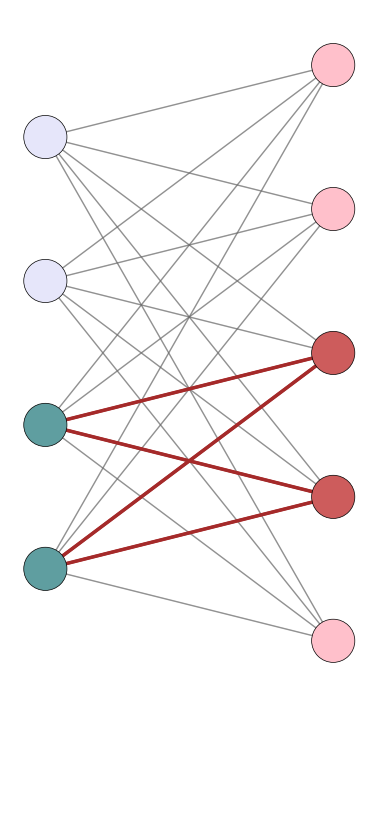

In [32]:
self = polygon_object
ax=None
zoom=1
figsize=(15, 15)
core_corner=None
check_ancilla_in_core: bool = True
envelop_rect=None
rotate: bool=True
radius=0.15

_, ax = plt.subplots(figsize=figsize)

ax.set_aspect('equal', 'box')
ax.axis('off')

ax.scatter(0, 0, color="white", s=0.6, alpha=0)
Acoords = [(0, 1), (0, 2), (0, 3), (0, 4)]
Acoords = [(x, y + .5) for (x, y) in Acoords]

Bcoords = [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5)]
Bcoords = [(x + 1, y) for (x, y) in Bcoords]

edges = [(a, b) for a in Acoords for b in Bcoords]

A, B  = [Acoords[0], Acoords[1]], [Bcoords[1], Bcoords[2]]


for coord in Acoords:
    fc="lavender"
    if coord in A:
        fc='cadetblue'
    circle = plt.Circle(
    coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc=fc, zorder=20
    )
    ax.add_patch(circle)
    
    

for coord in Bcoords:
    fc="#FFC0CB"
    if coord in B:
        fc='indianred'
    circle = plt.Circle(
    coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc=fc, zorder=20
    )
    ax.add_patch(circle)
    

for edge in edges:
    if edge[0] in A and edge[1] in B:
        x, y = list(zip(*edge))
        outline=mpe.withStroke(linewidth=3.5, foreground='#A52A2A')
        ax.plot(x, y, color='#A52A2A', lw=3, path_effects=[outline], zorder=5)
    
    else:  
        x, y = list(zip(*edge))
        outline=mpe.withStroke(linewidth=1.5, foreground='dimgray', alpha=0.5)
        ax.plot(x, y, color='dimgray', lw=1, path_effects=[outline], alpha=0.5)


plt.savefig(paths.plots / 'ThesisFigures/bipartite_graph.pdf')
plt.savefig(paths.plots / "Figures/pngs/bipartite_graph.png")

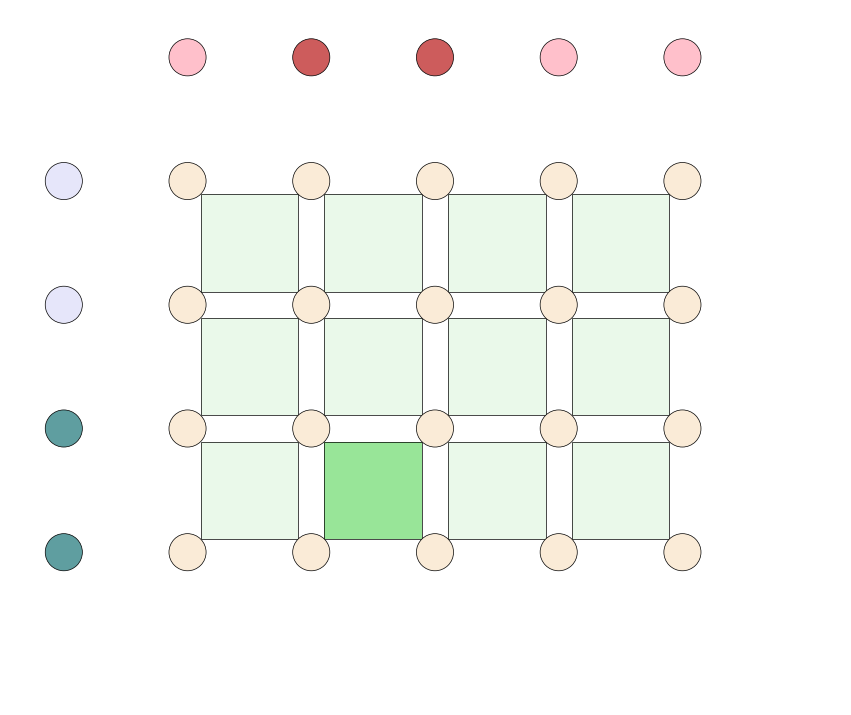

In [33]:
self = polygon_object
ax=None
zoom=1
figsize=(15, 15)
core_corner=None
check_ancilla_in_core: bool = True
envelop_rect=None
radius=0.15

_, ax = plt.subplots(figsize=figsize)

ax.set_aspect('equal', 'box')
ax.axis('off')

ax.scatter(0, 0, color="white", s=0.6, alpha=0)
Acoords = [(0, 1), (0, 2), (0, 3), (0, 4)]
Acoords = [(x, y) for (x, y) in Acoords]
Bcoords = [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5)]
Bcoords = [(y, x+4) for (x, y) in Bcoords]
A, B  = [Acoords[0], Acoords[1]], [Bcoords[1], Bcoords[2]]


for coord in Acoords:
    fc="lavender"
    if coord in A:
        fc='cadetblue'
    circle = plt.Circle(
    coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc=fc, zorder=20
    )
    ax.add_patch(circle)

for coord in Bcoords:
    fc="#FFC0CB"
    if coord in B:
        fc='indianred'
    circle = plt.Circle(
    coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc=fc, zorder=20
    )
    ax.add_patch(circle)
    
    
    
N = 9
g = Graph.complete(9)
edges_to_remove =  [qubit for qubit in g.qubits if qubit[1]  in [1, 2, 3, 4] or qubit[0]  in [5, 6, 7]]
graph = Graph.init_without_edges(N,edges_to_remove)

qcd = {
(0, 5): (1, 1),
(0, 6): (1, 2),
(0, 7): (1, 3),
(0, 8): (1, 4),
(1, 5): (2, 1),
(1, 6): (2, 2),
(1, 7): (2, 3),
(1, 8): (2, 4),
(2, 5): (3, 1),
(2, 6): (3, 2),
(2, 7): (3, 3),
(2, 8): (3, 4),
(3, 5): (4, 1),
(3, 6): (4, 2),
(3, 7): (4, 3),
(3, 8): (4, 4),
(4, 5): (5, 1),
(4, 6): (5, 2),
(4, 7): (5, 3),
(4, 8): (5, 4),
}
qbits = Qbits.init_qbits_from_dict(graph, qcd, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)


self = polygon_object


if envelop_rect is None: envelop_rect = self.nodes_object.qbits.envelop_rect()
ax.scatter(*list(zip(*envelop_rect)), color="white", s=0.6, alpha=0)

# color plaquettes
for polygon in self.polygons_coords(
    self.nodes_object.qbits.qubit_to_coord_dict, self.polygons
):
    fill, facecolor, lw, alpha, edge_alpha = False, None, 0, 0, 0
    measure = self.scope_of_polygon(polygon)
    if measure == self.unit_square:
        fill, facecolor, lw, alpha, edge_alpha = True, "limegreen", 1, 0.1, .7
        if len(set(polygon).intersection([(3, 2), (2, 1)])) == 2:
            #facecolor = "plum"
            alpha=0.5
        polygon = Polygons.scale(polygon, radius)

    patch = plt.Polygon(
        polygon,
        zorder=0,
        fill=fill,
        lw=0,
        facecolor=facecolor,
        alpha=alpha,
    )
    edge = plt.Polygon(
        polygon,
        zorder=0,
        fill=False,
        lw=lw,
        edgecolor="black",
        alpha=edge_alpha
    )
    ax.add_patch(patch)
    ax.add_patch(edge)
# color qbits
for qbit in self.nodes_object.qbits:
    

    label = ax.annotate(
        r"{}".format(''),#*qbit.coord),
        xy=qbit.coord,
        ha="center",
        va="center",
        fontsize=15,
        zorder=20,
    )
    if qbit.core == False:
        circle = plt.Circle(
            qbit.coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="antiquewhite", zorder=20
        )
    if qbit.ancilla == True:
        circle = plt.Circle(
            qbit.coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="lightcoral"
        )
    ax.add_patch(circle)

plt.savefig(paths.plots / 'ThesisFigures/bipartite_core.pdf')
plt.savefig(paths.plots / "Figures/pngs/bipartite_core.png")

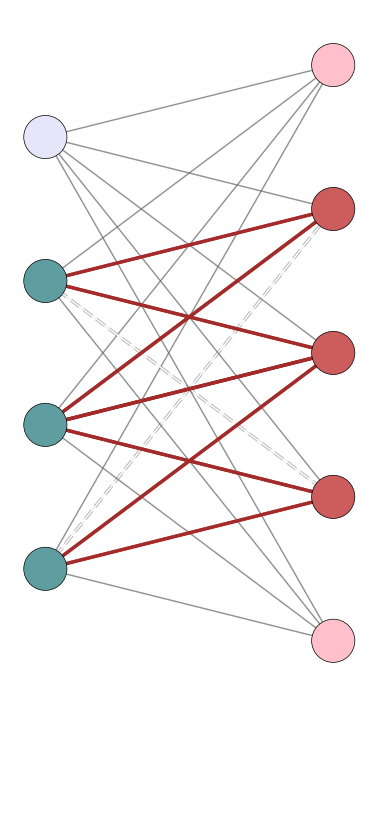

In [34]:
matplotlib.rcParams['hatch.linewidth'] = 2.5  # previous pdf hatch linewidth

self = polygon_object
ax=None
zoom=1
figsize=(15, 15)
core_corner=None
check_ancilla_in_core: bool = True
envelop_rect=None
rotate: bool=True
radius=0.15

_, ax = plt.subplots(figsize=figsize)

ax.set_aspect('equal', 'box')
ax.axis('off')

ax.scatter(0, 0, color="white", s=0.6, alpha=0)
Acoords = [(0, 1), (0, 2), (0, 3), (0, 4)]
Acoords = [(x, y + .5) for (x, y) in Acoords]

Bcoords = [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5)]
Bcoords = [(x + 1, y) for (x, y) in Bcoords]

edges = [(a, b) for a in Acoords for b in Bcoords]

A, B  = [Acoords[0], Acoords[1]], [Bcoords[1], Bcoords[2]]
A1, B1 = [Acoords[1], Acoords[2]], [Bcoords[2], Bcoords[3]]


for coord in Acoords:
    fc="lavender"
    hatch = None
    ec = 'black'
    if coord in A:
        fc='cadetblue'
    if coord in A1:
        fc='cadetblue'
    circle = plt.Circle(
    coord, radius=radius, alpha=1.0, lw=0.7, ec=ec, fc=fc, zorder=20, hatch=hatch
    )
    ax.add_patch(circle)
    
    

for coord in Bcoords:
    fc="#FFC0CB"
    if coord in B:
        fc='indianred'
    if coord in B1:
        fc='indianred'
    circle = plt.Circle(
    coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc=fc, zorder=20
    )
    ax.add_patch(circle)
    

for edge in edges:
    x, y = list(zip(*edge))
    outline=mpe.withStroke(linewidth=1.5, foreground='dimgray', alpha=0.5)
    ax.plot(x, y, color='dimgray', lw=1, path_effects=[outline], alpha=0.5)
    if edge[0] in A1 and edge[1] in B1:
        x, y = list(zip(*edge))
        outline=mpe.withStroke(linewidth=3.5, foreground='#A52A2A')
        ax.plot(x, y, color='#A52A2A', lw=3, path_effects=[outline], zorder=5)
    if edge[0] in A and edge[1] in B:
        x, y = list(zip(*edge))
        outline=mpe.withStroke(linewidth=3.5, foreground='#A52A2A')
        ax.plot(x, y, color='#A52A2A', lw=3, path_effects=[outline], zorder=5)    
    if edge[0] in A1 and edge[1] in (set(B) - set(B1)):
        x, y = list(zip(*edge))
        outline=mpe.withStroke(linewidth=1.5, foreground='white', alpha=1)
        ax.plot(x, y, color='white', lw=1, path_effects=[outline], alpha=1)
        outline=mpe.withStroke(linewidth=3.5, foreground='dimgray', alpha=0.3)
        ax.plot(x, y, color='dimgray', lw=3, path_effects=[outline], zorder=0, alpha=0.3, linestyle='--')  

    if edge[0] in A and edge[1] in (set(B1) - set(B)):
        x, y = list(zip(*edge))
        outline=mpe.withStroke(linewidth=1.5, foreground='white', alpha=1)
        ax.plot(x, y, color='white', lw=1, path_effects=[outline], alpha=1)
        outline=mpe.withStroke(linewidth=3.5, foreground='dimgray', alpha=0.3)
        ax.plot(x, y, color='dimgray', lw=3, path_effects=[outline], zorder=0, alpha=0.3, linestyle='--')     


plt.savefig(paths.plots / 'ThesisFigures/merged_bipartite_graph.pdf')
plt.savefig(paths.plots / "Figures/pngs/merged_bipartite_graph.png")

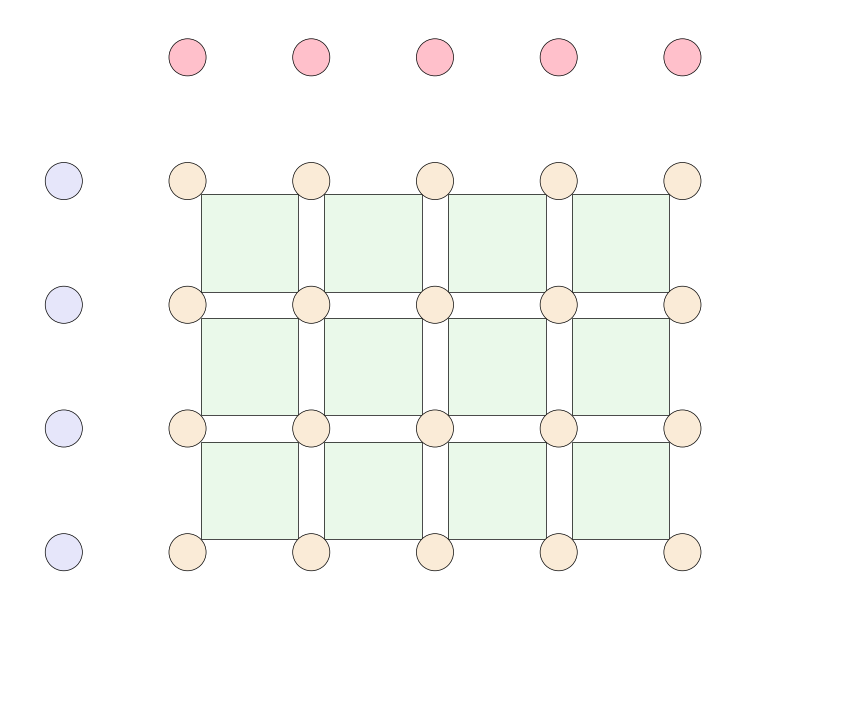

In [35]:
self = polygon_object
ax=None
zoom=1
figsize=(15, 15)
core_corner=None
check_ancilla_in_core: bool = True
envelop_rect=None
radius=0.15

_, ax = plt.subplots(figsize=figsize)

ax.set_aspect('equal', 'box')
ax.axis('off')

ax.scatter(0, 0, color="white", s=0.6, alpha=0)
Acoords = [(0, 1), (0, 2), (0, 3), (0, 4)]
Acoords = [(x, y) for (x, y) in Acoords]
Bcoords = [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5)]
Bcoords = [(y, x+4) for (x, y) in Bcoords]
A, B  = [], []#[Acoords[0], Acoords[1]], [Bcoords[1], Bcoords[2]]
A1, B1 = [], []#[Acoords[1], Acoords[2]], [Bcoords[2], Bcoords[3]]


for coord in Acoords:
    fc="lavender"
    if coord in A:
        fc='cadetblue'
    if coord in A1:
        fc='cadetblue'
    circle = plt.Circle(
    coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc=fc, zorder=20
    )
    ax.add_patch(circle)
    
    

for coord in Bcoords:
    fc="#FFC0CB"
    if coord in B:
        fc='indianred'
    if coord in B1:
        fc='indianred'
    circle = plt.Circle(
    coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc=fc, zorder=20
    )
    ax.add_patch(circle)
    
    
N = 9
g = Graph.complete(9)
edges_to_remove =  [qubit for qubit in g.qubits if qubit[1]  in [1, 2, 3, 4] or qubit[0]  in [5, 6, 7]]
graph = Graph.init_without_edges(N,edges_to_remove)

qcd = {
(0, 5): (1, 1),
(0, 6): (1, 2),
(0, 7): (1, 3),
(0, 8): (1, 4),
(1, 5): (2, 1),
(1, 6): (2, 2),
(1, 7): (2, 3),
(1, 8): (2, 4),
(2, 5): (3, 1),
(2, 6): (3, 2),
(2, 7): (3, 3),
(2, 8): (3, 4),
(3, 5): (4, 1),
(3, 6): (4, 2),
(3, 7): (4, 3),
(3, 8): (4, 4),
(4, 5): (5, 1),
(4, 6): (5, 2),
(4, 7): (5, 3),
(4, 8): (5, 4),
}
qbits = Qbits.init_qbits_from_dict(graph, qcd, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)


self = polygon_object


if envelop_rect is None: envelop_rect = self.nodes_object.qbits.envelop_rect()
ax.scatter(*list(zip(*envelop_rect)), color="white", s=0.6, alpha=0)

# color plaquettes
for polygon in self.polygons_coords(
    self.nodes_object.qbits.qubit_to_coord_dict, self.polygons
):
    fill, facecolor, lw, alpha, edge_alpha = False, None, 0, 0, 0
    measure = self.scope_of_polygon(polygon)

    if measure == self.unit_square:
        fill, facecolor, lw, alpha, edge_alpha = True, "limegreen", 1, 0.1, .7
        polygon = Polygons.scale(polygon, radius)

    patch = plt.Polygon(
        polygon,
        zorder=0,
        fill=fill,
        lw=0,
        facecolor=facecolor,
        alpha=alpha,
    )
    edge = plt.Polygon(
        polygon,
        zorder=0,
        fill=False,
        lw=lw,
        edgecolor="black",
        alpha=edge_alpha
    )
    ax.add_patch(patch)
    ax.add_patch(edge)
# color qbits
for qbit in self.nodes_object.qbits:
    
    if qbit.coord in [(2, 3), (4, 1)]:
        qbit.ancilla = True
    label = ax.annotate(
        "",#r"{}, {}".format(*qbit.coord),
        xy=qbit.coord,
        ha="center",
        va="center",
        fontsize=15,
        zorder=20,
    )
    if qbit.core == False:
        circle = plt.Circle(
            qbit.coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="antiquewhite", zorder=20
        )
    ax.add_patch(circle)

plt.savefig(paths.plots / 'Figures/bipartite_core_0.pdf')
plt.savefig(paths.plots / "Figures/pngs/bipartite_core_0.png")

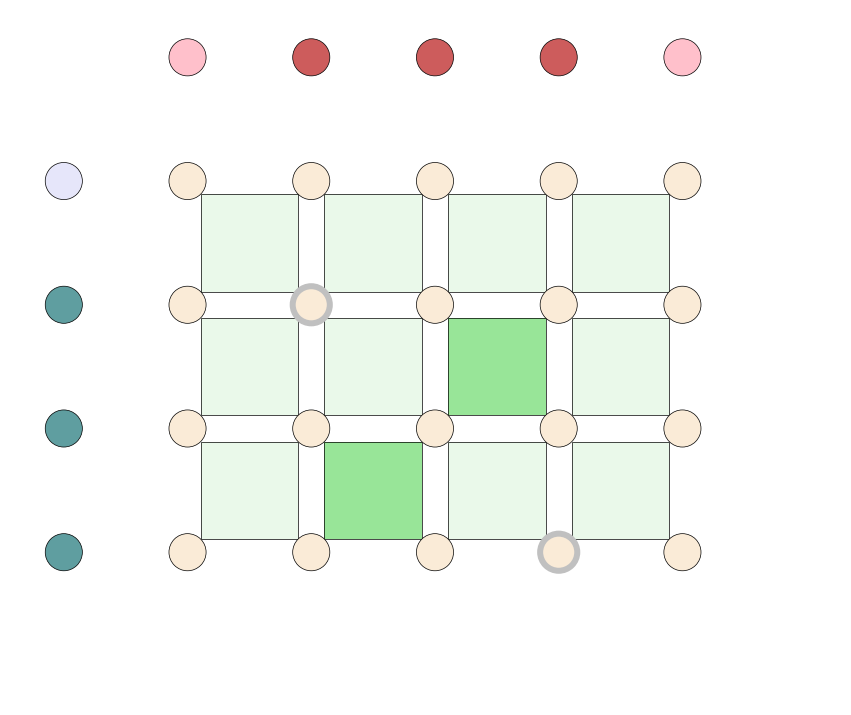

In [36]:
self = polygon_object
ax=None
zoom=1
figsize=(15, 15)
core_corner=None
check_ancilla_in_core: bool = True
envelop_rect=None
radius=0.15

_, ax = plt.subplots(figsize=figsize)

ax.set_aspect('equal', 'box')
ax.axis('off')

ax.scatter(0, 0, color="white", s=0.6, alpha=0)
Acoords = [(0, 1), (0, 2), (0, 3), (0, 4)]
Acoords = [(x, y) for (x, y) in Acoords]
Bcoords = [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5)]
Bcoords = [(y, x+4) for (x, y) in Bcoords]
A, B  = [Acoords[0], Acoords[1]], [Bcoords[1], Bcoords[2]]
A1, B1 = [Acoords[1], Acoords[2]], [Bcoords[2], Bcoords[3]]


for coord in Acoords:
    fc="lavender"
    if coord in A:
        fc='cadetblue'
    if coord in A1:
        fc='cadetblue'
    circle = plt.Circle(
    coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc=fc, zorder=20
    )
    ax.add_patch(circle)
    
    

for coord in Bcoords:
    fc="#FFC0CB"
    if coord in B:
        fc='indianred'
    if coord in B1:
        fc='indianred'
    circle = plt.Circle(
    coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc=fc, zorder=20
    )
    ax.add_patch(circle)
    
    
N = 9
g = Graph.complete(9)
edges_to_remove =  [qubit for qubit in g.qubits if qubit[1]  in [1, 2, 3, 4] or qubit[0]  in [5, 6, 7]]
graph = Graph.init_without_edges(N,edges_to_remove)

qcd = {
(0, 5): (1, 1),
(0, 6): (1, 2),
(0, 7): (1, 3),
(0, 8): (1, 4),
(1, 5): (2, 1),
(1, 6): (2, 2),
(1, 7): (2, 3),
(1, 8): (2, 4),
(2, 5): (3, 1),
(2, 6): (3, 2),
(2, 7): (3, 3),
(2, 8): (3, 4),
(3, 5): (4, 1),
(3, 6): (4, 2),
(3, 7): (4, 3),
(3, 8): (4, 4),
(4, 5): (5, 1),
(4, 6): (5, 2),
(4, 7): (5, 3),
(4, 8): (5, 4),
}
qbits = Qbits.init_qbits_from_dict(graph, qcd, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)


self = polygon_object


if envelop_rect is None: envelop_rect = self.nodes_object.qbits.envelop_rect()
ax.scatter(*list(zip(*envelop_rect)), color="white", s=0.6, alpha=0)

# color plaquettes
for polygon in self.polygons_coords(
    self.nodes_object.qbits.qubit_to_coord_dict, self.polygons
):
    fill, facecolor, lw, alpha, edge_alpha = False, None, 0, 0, 0
    measure = self.scope_of_polygon(polygon)

    if measure == self.unit_square:
        fill, facecolor, lw, alpha, edge_alpha = True, "limegreen", 1, 0.1, .7
        if len(set(polygon).intersection([(3, 2), (2, 1)])) == 2:
            alpha = .5
        if len(set(polygon).intersection([(3, 2), (4, 3)])) == 2:
            alpha = .5
        polygon = Polygons.scale(polygon, radius)

    patch = plt.Polygon(
        polygon,
        zorder=0,
        fill=fill,
        lw=0,
        facecolor=facecolor,
        alpha=alpha,
    )
    edge = plt.Polygon(
        polygon,
        zorder=0,
        fill=False,
        lw=lw,
        edgecolor="black",
        alpha=edge_alpha
    )
    ax.add_patch(patch)
    ax.add_patch(edge)
# color qbits
for qbit in self.nodes_object.qbits:
    
    if qbit.coord in [(2, 3), (4, 1)]:
        qbit.ancilla = True
    label = ax.annotate(
        "",#r"{}, {}".format(*qbit.coord),
        xy=qbit.coord,
        ha="center",
        va="center",
        fontsize=15,
        zorder=20,
    )
    if qbit.core == False:
        circle = plt.Circle(
            qbit.coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="antiquewhite", zorder=20
        )
    if qbit.ancilla == True:
        circle = plt.Circle(
            qbit.coord, radius=radius, alpha=1.0, lw=6, ec="silver", fc="antiquewhite",
        )
    ax.add_patch(circle)

plt.savefig(paths.plots / 'ThesisFigures/merged_bipartite_core.pdf')
plt.savefig(paths.plots / "Figures/pngs/merged_bipartite_core.png")

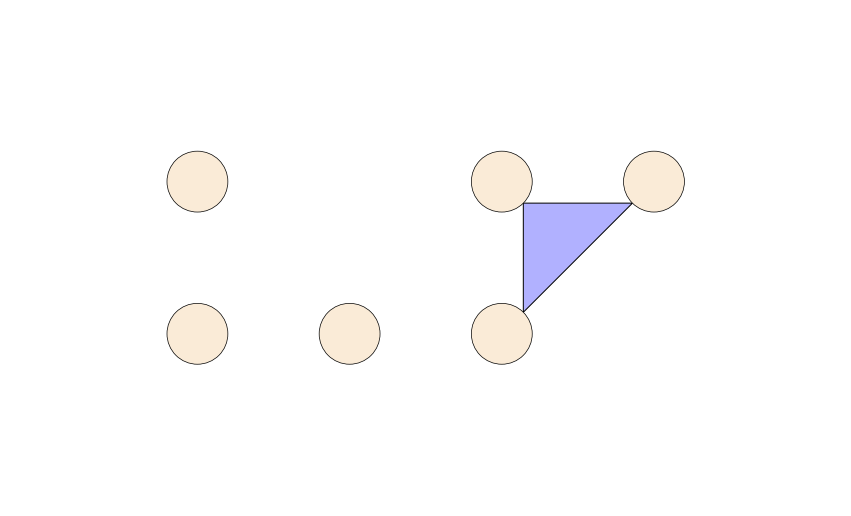

In [37]:



missing_link = [(1, 4)]
N = 5
rotate = False
graph = Graph.init_without_edges(N, missing_link+[(0, 1), (0, 2), (1, 2)])
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
polygons = [[(0, 4), (0, 3), (2.95, 4)]]

ax = visualize_without_labels(polygon_object)   
ax.figure.savefig(paths.plots / 'Figures/implicit_implicit_constraint_1.pdf')
ax.figure.savefig(paths.plots / 'Figures/pngs/implicit_implicit_constraint_1.png')

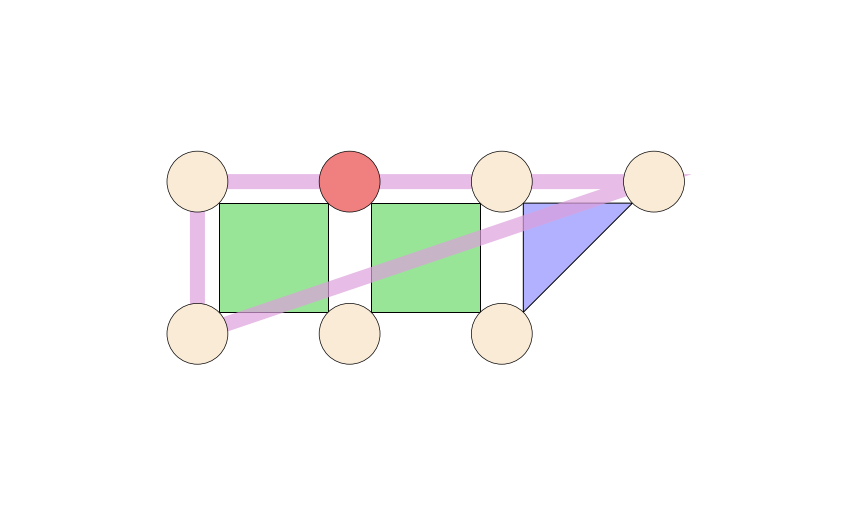

In [38]:

missing_link = [(1, 4)]
N = 5
rotate = False
graph = Graph.init_without_edges(N, [(0, 1), (0, 2), (1, 2)])
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
qbits[missing_link[0]].ancilla = True
qbits[missing_link[0]].core = True 
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
polygons = [[(0, 4), (0, 3), (2.95, 4)]]

ax = visualize_without_labels(polygon_object)   
ax.figure.savefig(paths.plots / 'Figures/implicit_implicit_constraint_2.pdf')
ax.figure.savefig(paths.plots / 'Figures/pngs/implicit_implicit_constraint_2.png')
for idx, polygon in enumerate(polygons):
    polygon = [Polygons.rotate_coords_by_45(coord, rotate) for coord in polygon]
    patch = plt.Polygon(
        polygon,
        zorder=19,
        lw=15,
        alpha=0.7,
        color='plum',
        fill=False
    )
    ax.add_patch(patch)
ax.figure.savefig(paths.plots / f"ThesisFigures/implicit_implicit_constraint_3.pdf")

ax.figure.savefig(paths.plots / 'Figures/implicit_implicit_constraint_3.pdf')
ax.figure.savefig(paths.plots / 'Figures/pngs/implicit_implicit_constraint_3.png')

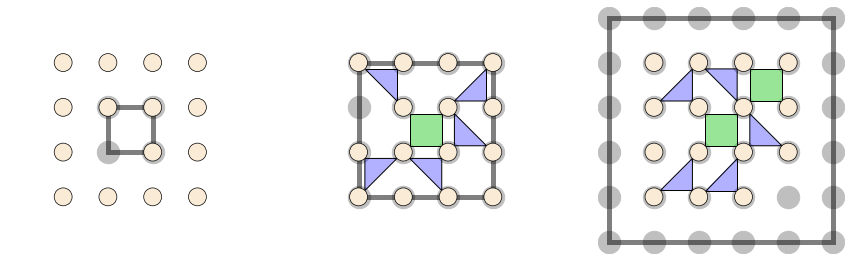

In [39]:
d_0 = {(0, 1): (0, 2), (0, 2): (3, 2), (0, 3): (2, 1), (0, 4): (3, 0), (0, 5): (0, 1), (1, 2): (3, 1), (1, 3): (3, 3), (1, 4): (2, 3), (1, 5): (0, 3), (2, 3): (1, 2), (2, 4): (0, 0), (2, 5): (2, 0), (3, 4): (1, 0), (3, 5): (2, 2), (4, 5): (1, 3)}
d_1 = {(0, 1): (0, 1), (0, 2): (1, 1), (0, 3): (2, 1), (0, 4): (3, 0), (0, 5): (3, 1), (1, 2): (0, 0), (1, 3): (3, 3), (1, 4): (2, 3), (1, 5): (3, 2), (2, 3): (2, 0), (2, 4): (0, 3), (2, 5): (1, 2), (3, 4): (1, 0), (3, 5): (2, 2), (4, 5): (1, 3)}
d_2 = {(0, 1): (1, 0), (0, 2): (1, 1), (0, 3): (2, 1), (0, 4): (0, 3), (0, 5): (3, 1), (1, 2): (0, 0), (1, 3): (2, 0), (1, 4): (3, 3), (1, 5): (3, 2), (2, 3): (0, 1), (2, 4): (0, 2), (2, 5): (1, 2), (3, 4): (2, 3), (3, 5): (2, 2), (4, 5): (1, 3)}
d_3 = {(0, 1): (2, 0), (0, 2): (1, 1), (0, 3): (2, 1), (0, 4): (0, 3), (0, 5): (3, 1), (1, 2): (0, 0), (1, 3): (1, 0), (1, 4): (3, 3), (1, 5): (3, 2), (2, 3): (0, 1), (2, 4): (0, 2), (2, 5): (1, 2), (3, 4): (2, 3), (3, 5): (2, 2), (4, 5): (1, 3)}

fig, axx = plt.subplots(1, 3, figsize=(15, 15))

graph = Graph.complete(6)
energy_object = functions_for_benchmarking.init_energy(graph)
mc = MC(energy_object)

radius = 500
color = 0.75
mc.corner = ((1, 2), (1, 2))
mc.possible_coords = coords_from_corner(mc.corner)

mc.energy.polygon_object.nodes_object.qbits.update_qbits_from_dict(d_0, assign_to_core=False)
ax = visualize_without_labels(mc.energy.polygon_object, ax = axx[0], core_corner=mc.corner, corner_lw=5)
mc.energy.polygon_object.color_coords(ax, [(coord, color) for coord in mc.possible_coords], radius=radius)

(min_x, max_x), (min_y, max_y) = mc.corner
mc.corner = (min_x - 1, max_x + 1), (min_y - 1, max_y + 1)
mc.energy.polygon_object.nodes_object.qbits.update_qbits_from_dict(d_1, assign_to_core=False)
ax = visualize_without_labels(mc.energy.polygon_object, ax = axx[1], core_corner=mc.corner, corner_lw=5)
mc.possible_coords = coords_from_corner(mc.corner)
mc.energy.polygon_object.color_coords(ax, [(coord, color) for coord in mc.possible_coords], radius=radius)

(min_x, max_x), (min_y, max_y) = mc.corner
mc.corner = (min_x - 1, max_x + 1), (min_y - 1, max_y + 1)
mc.energy.polygon_object.nodes_object.qbits.update_qbits_from_dict(d_2, assign_to_core=False)
ax = visualize_without_labels(mc.energy.polygon_object, ax = axx[2], core_corner=mc.corner, corner_lw=5)
mc.possible_coords = coords_from_corner(mc.corner)
mc.energy.polygon_object.color_coords(ax, [(coord, color) for coord in mc.possible_coords], radius=radius)
fig.figure.savefig(paths.plots / f"ThesisFigures/envelop_shell_search.pdf")

plt.savefig(paths.plots / 'Figures/envelop_shell_search.pdf')
plt.savefig(paths.plots / 'Figures/pngs/envelop_shell_search.png')

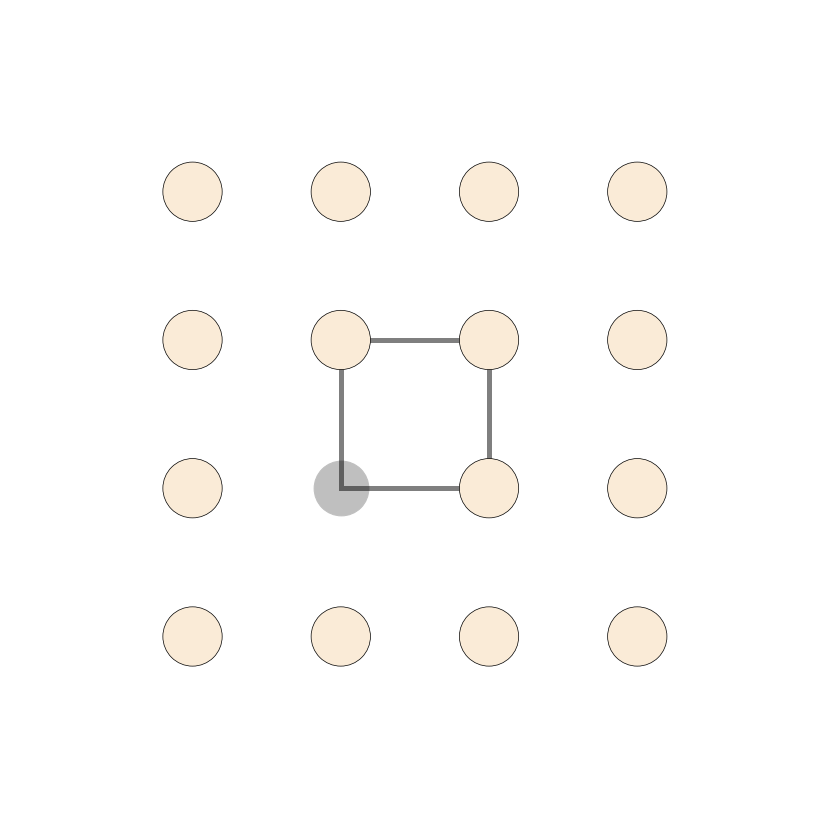

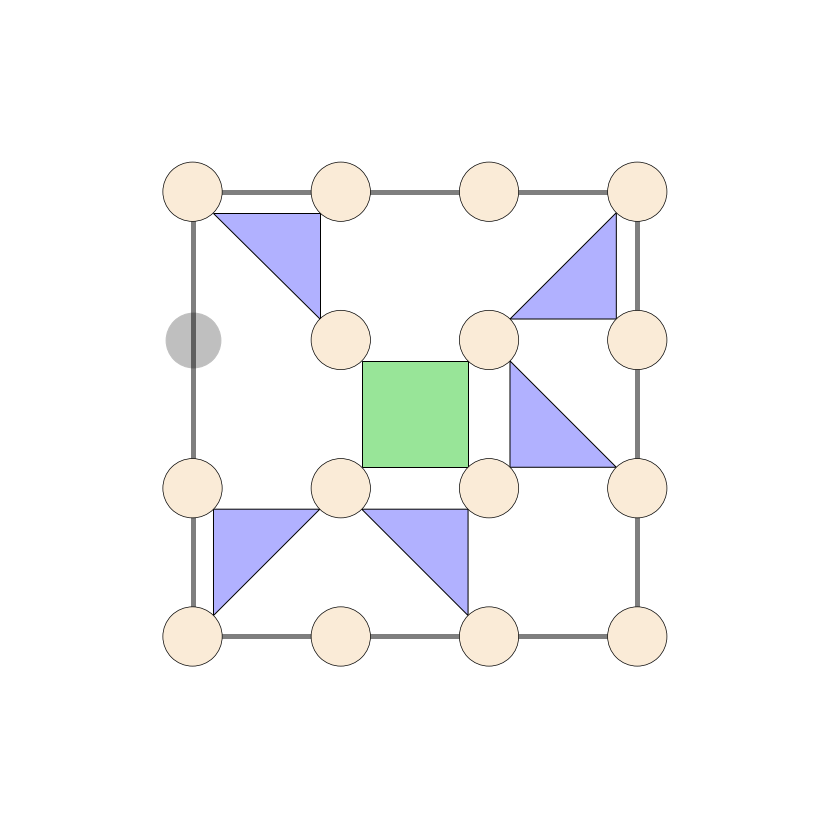

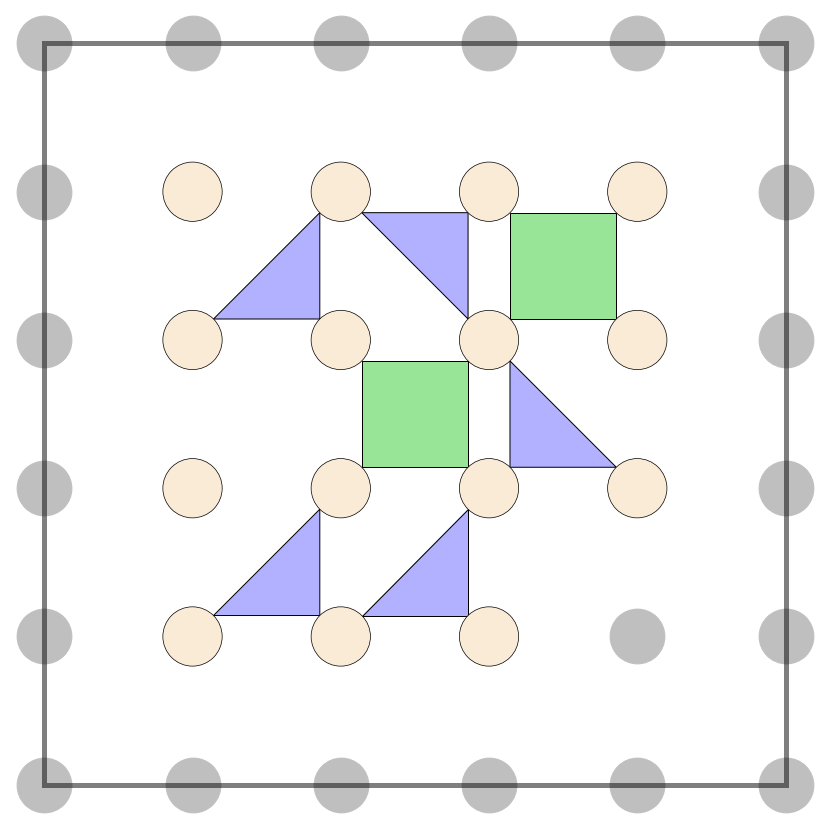

In [40]:


d_0 = {(0, 1): (0, 2), (0, 2): (3, 2), (0, 3): (2, 1), (0, 4): (3, 0), (0, 5): (0, 1), (1, 2): (3, 1), (1, 3): (3, 3), (1, 4): (2, 3), (1, 5): (0, 3), (2, 3): (1, 2), (2, 4): (0, 0), (2, 5): (2, 0), (3, 4): (1, 0), (3, 5): (2, 2), (4, 5): (1, 3)}
d_1 = {(0, 1): (0, 1), (0, 2): (1, 1), (0, 3): (2, 1), (0, 4): (3, 0), (0, 5): (3, 1), (1, 2): (0, 0), (1, 3): (3, 3), (1, 4): (2, 3), (1, 5): (3, 2), (2, 3): (2, 0), (2, 4): (0, 3), (2, 5): (1, 2), (3, 4): (1, 0), (3, 5): (2, 2), (4, 5): (1, 3)}
d_2 = {(0, 1): (1, 0), (0, 2): (1, 1), (0, 3): (2, 1), (0, 4): (0, 3), (0, 5): (3, 1), (1, 2): (0, 0), (1, 3): (2, 0), (1, 4): (3, 3), (1, 5): (3, 2), (2, 3): (0, 1), (2, 4): (0, 2), (2, 5): (1, 2), (3, 4): (2, 3), (3, 5): (2, 2), (4, 5): (1, 3)}
d_3 = {(0, 1): (2, 0), (0, 2): (1, 1), (0, 3): (2, 1), (0, 4): (0, 3), (0, 5): (3, 1), (1, 2): (0, 0), (1, 3): (1, 0), (1, 4): (3, 3), (1, 5): (3, 2), (2, 3): (0, 1), (2, 4): (0, 2), (2, 5): (1, 2), (3, 4): (2, 3), (3, 5): (2, 2), (4, 5): (1, 3)}


graph = Graph.complete(6)
energy_object = functions_for_benchmarking.init_energy(graph)
mc = MC(energy_object)

radius = 3000
color = 0.75
mc.corner = ((1, 2), (1, 2))
mc.possible_coords = coords_from_corner(mc.corner)

fig, ax = plt.subplots(figsize=(15, 15))
mc.energy.polygon_object.nodes_object.qbits.update_qbits_from_dict(d_0, assign_to_core=False)
ax = visualize_without_labels(mc.energy.polygon_object, ax = ax, core_corner=mc.corner, corner_lw=5)
mc.energy.polygon_object.color_coords(ax, [(coord, color) for coord in mc.possible_coords], radius=radius)

ax.figure.savefig(paths.plots / f"ThesisFigures/envelop_shell_search_1.pdf")
plt.savefig(paths.plots / 'Figures/envelop_shell_search_1.pdf')
plt.savefig(paths.plots / 'Figures/pngs/envelop_shell_search_1.png')

fig, ax = plt.subplots(figsize=(15, 15))
(min_x, max_x), (min_y, max_y) = mc.corner
mc.corner = (min_x - 1, max_x + 1), (min_y - 1, max_y + 1)
mc.energy.polygon_object.nodes_object.qbits.update_qbits_from_dict(d_1, assign_to_core=False)
ax = visualize_without_labels(mc.energy.polygon_object, ax = ax, core_corner=mc.corner, corner_lw=5)
mc.possible_coords = coords_from_corner(mc.corner)
mc.energy.polygon_object.color_coords(ax, [(coord, color) for coord in mc.possible_coords], radius=radius)
ax.figure.savefig(paths.plots / f"ThesisFigures/envelop_shell_search_2.pdf")

plt.savefig(paths.plots / 'Figures/envelop_shell_search_2.pdf')
plt.savefig(paths.plots / 'Figures/pngs/envelop_shell_search_2.png')

fig, ax = plt.subplots(figsize=(15, 15))
(min_x, max_x), (min_y, max_y) = mc.corner
mc.corner = (min_x - 1, max_x + 1), (min_y - 1, max_y + 1)
mc.energy.polygon_object.nodes_object.qbits.update_qbits_from_dict(d_2, assign_to_core=False)
ax = visualize_without_labels(mc.energy.polygon_object, ax = ax, core_corner=mc.corner, corner_lw=5)
mc.possible_coords = coords_from_corner(mc.corner)
mc.energy.polygon_object.color_coords(ax, [(coord, color) for coord in mc.possible_coords], radius=radius)
ax.figure.savefig(paths.plots / f"ThesisFigures/envelop_shell_search_3.pdf")

plt.savefig(paths.plots / 'Figures/envelop_shell_search_3.pdf')
plt.savefig(paths.plots / 'Figures/pngs/envelop_shell_search_3.png')


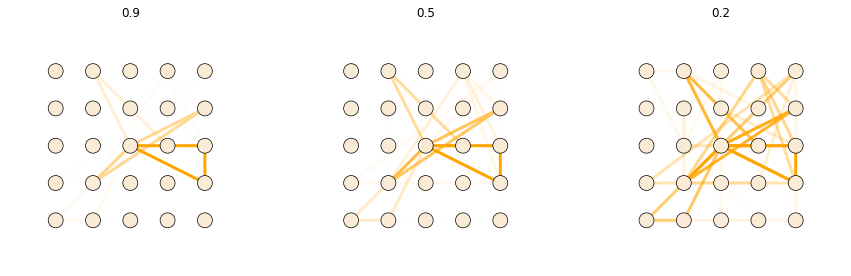

In [41]:


edges_to_remove = [(0, 4),
 (0, 6),
 (0, 7),
 (0, 9),
 (1, 4),
 (1, 5),
 (1, 7),
 (1, 9),
 (2, 3),
 (2, 6),
 (2, 7),
 (3, 4),
 (3, 6),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (5, 7),
 (5, 9),
 (7, 8)]
qubit_to_coord_dict = {
 (0, 1): (5, 6),
 (0, 2): (2, 3),
 (0, 3): (6, 3),
 (0, 5): (4, 5),
 (0, 8): (6, 4),
 (1, 2): (5, 3),
 (1, 3): (3, 3),
 (1, 6): (3, 5),
 (1, 8): (6, 5),
 (2, 4): (4, 3),
 (2, 5): (5, 5),
 (2, 8): (6, 6),
 (2, 9): (6, 2),
 (3, 5): (3, 6),
 (3, 7): (4, 2),
 (3, 8): (4, 4),
 (3, 9): (3, 2),
 (4, 9): (2, 5),
 (5, 6): (2, 6),
 (5, 8): (5, 4),
 (6, 7): (4, 6),
 (6, 8): (3, 4),
 (6, 9): (5, 2),
 (7, 9): (2, 4),
 (8, 9): (2, 2)}

graph = Graph.init_without_edges(10, edges_to_remove=edges_to_remove)
energy_object = functions_for_benchmarking.init_energy(graph)
mc = MC(energy_object)
mc.energy.polygon_object.nodes_object.qbits.update_qbits_from_dict(qubit_to_coord_dict, assign_to_core=False)



self = mc.energy.polygon_object
ax=None
zoom=1
figsize=(15, 15)
core_corner=None
check_ancilla_in_core: bool = True
envelop_rect=None
rotate: bool=False
radius=0.2
corner_lw=10
fig, axx = plt.subplots(1, 3, figsize=(15, 15))
for decay_rate, ax in zip([0.9, .5, 0.2], [axx[0], axx[1], axx[2]]):
    mc.energy.decay_rate = decay_rate

    ax.set_aspect('equal', 'box')
    ax.axis('off')

    if envelop_rect is None: envelop_rect = self.nodes_object.qbits.envelop_rect()
    ax.scatter(*list(zip(*envelop_rect)), color="white", s=0.6, alpha=0)

    if core_corner is not None:
        (min_x, max_x), (min_y, max_y) = core_corner
        envelop = [Polygons.rotate_coords_by_45(p, rotate) 
                   for p in [(min_x, min_y), (min_x, max_y), (max_x, max_y), (max_x, min_y)]]
        patch = plt.Polygon(
            envelop, zorder=10, fill=False, lw=corner_lw, edgecolor="black", alpha=0.5
        )
        ax.add_patch(patch)

    # color qbits
    for qbit in self.nodes_object.qbits:
        coord = Polygons.rotate_coords_by_45(qbit.coord, rotate)
        if len(str(qbit.qubit)) - 4 == 2:
            fontsize = 82 * radius
        if len(str(qbit.qubit)) - 4 == 3:
            fontsize = 70 * radius
        if len(str(qbit.qubit)) - 4 == 4:
            fontsize = 60 * radius

        label = ax.annotate(
            "",
            xy=coord,
            ha="center",
            va="center",
            fontsize=fontsize,
            zorder=20,
        )
        if qbit.core == False:
            circle = plt.Circle(
                coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="antiquewhite", zorder=20
            )
        if qbit.core == True:
            circle = plt.Circle(
                coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="tan"
            )
        if qbit.ancilla == True:
            circle = plt.Circle(
                coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="lightcoral"
            )
            if check_ancilla_in_core:
                assert (
                    qbit.ancilla == True and qbit.core == True
                ), "ancilla is not part of the core ?!"
        ax.add_patch(circle)


    # color plaquettes
    decays, polygons_coords = decay_measure_per_qbit(mc.energy, [mc.energy.polygon_object.nodes_object.qbits[(3, 8)]])
    for decay, polygon in list(zip(decays[0], polygons_coords)):
        # if center is part of polygon, error will be thrown
        if Polygons.center_of_coords(polygon) in polygon:
            continue
        fill, facecolor, lw, alpha, edge_alpha = False, None, 0, 0, 0
        if mc.energy.polygon_object.nodes_object.qbits[(3, 8)].coord in polygon:
            if Polygon(polygon).area > 0:
                lw, edge_alpha = 3, decay
        if self.scope_measure:
            measure = self.scope_of_polygon(polygon)
        if not self.scope_measure:
            measure = self.moment_of_inertia(polygon)
        if measure == self.unit_square:
            fill, facecolor, lw, alpha, edge_alpha = True, "limegreen", 1, 0.5, 1
            polygon = Polygons.scale(polygon, radius)
        if measure == self.unit_triangle:
            fill, facecolor, lw, alpha, edge_alpha = True, "blue", 1, 0.3, 1
            polygon = Polygons.scale(polygon, radius)
        # if points are on a line, it is not a polygon anymore but a LineString object
        try: polygon = list(zip(*MultiPoint(polygon).convex_hull.exterior.xy))
        except: pass
        polygon = [Polygons.rotate_coords_by_45(p, rotate)
                   for p in polygon]
        patch = plt.Polygon(
            polygon,
            zorder=0,
            fill=fill,
            lw=0,
            facecolor=facecolor,
            alpha=alpha,
        )
        edge = plt.Polygon(
            polygon,
            zorder=0,
            fill=False,
            lw=lw,
            edgecolor="orange",
            alpha=edge_alpha
        )

        ax.add_patch(patch)
        ax.add_patch(edge)
        ax.set_title(decay_rate)
fig.figure.savefig(paths.plots / f"ThesisFigures/decay_rate_visualization.pdf")

plt.savefig(paths.plots / 'Figures/decay_rate_visualization.pdf')
plt.savefig(paths.plots / 'Figures/pngs/decay_rate_visualization.png')

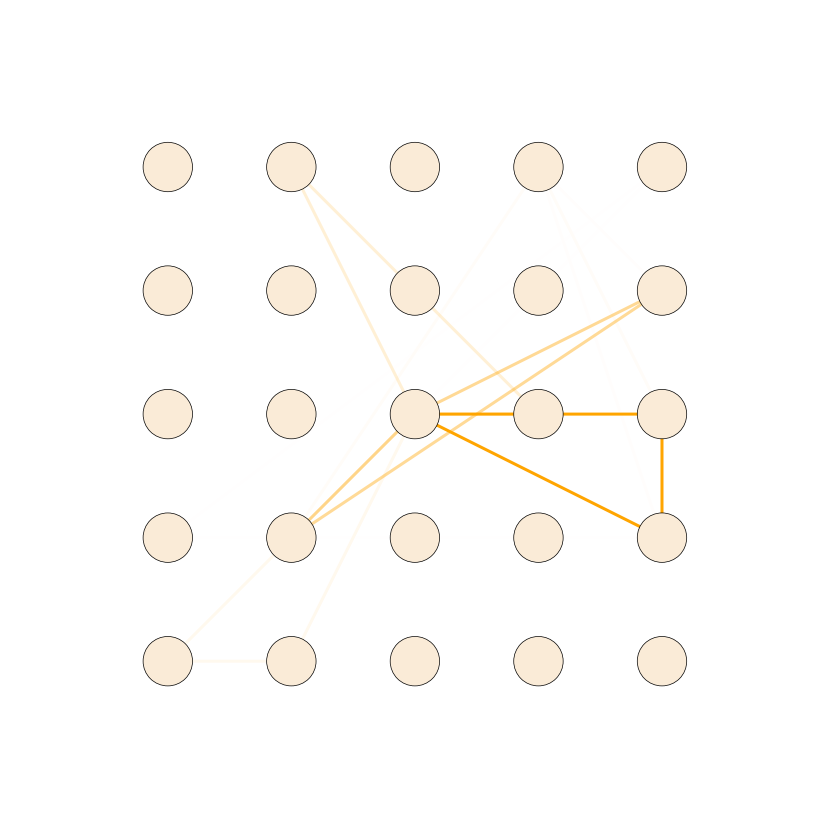

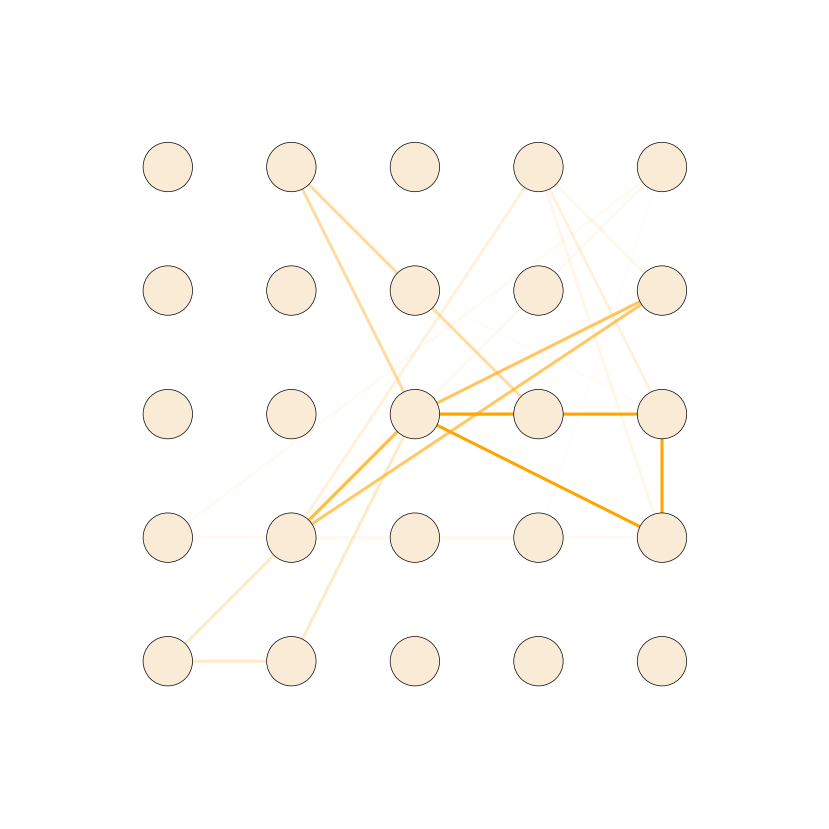

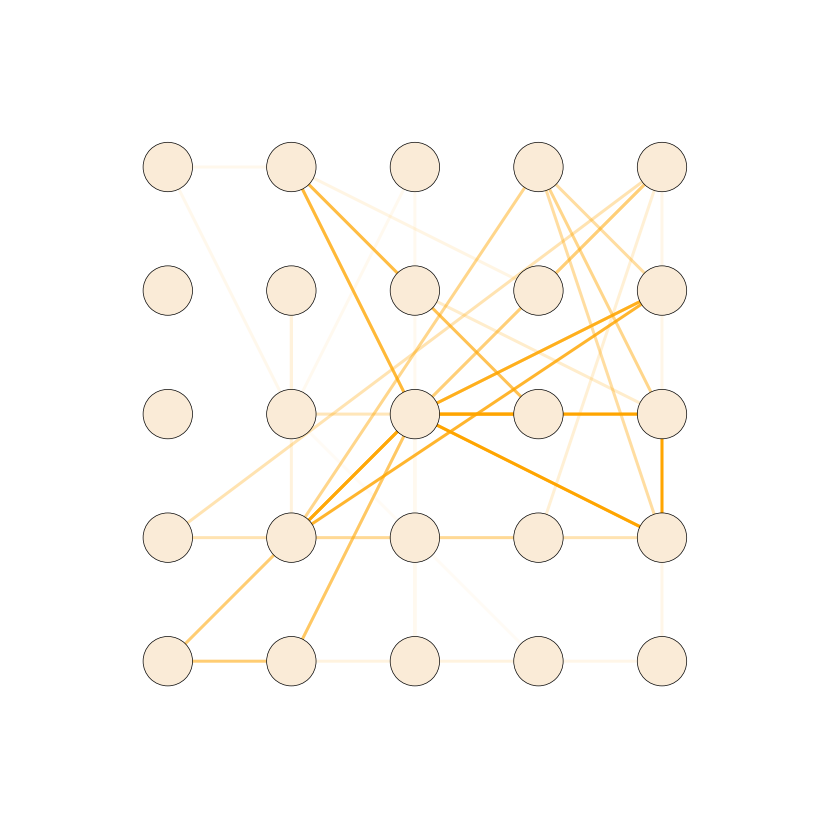

In [42]:


edges_to_remove = [(0, 4),
 (0, 6),
 (0, 7),
 (0, 9),
 (1, 4),
 (1, 5),
 (1, 7),
 (1, 9),
 (2, 3),
 (2, 6),
 (2, 7),
 (3, 4),
 (3, 6),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (5, 7),
 (5, 9),
 (7, 8)]
qubit_to_coord_dict = {
 (0, 1): (5, 6),
 (0, 2): (2, 3),
 (0, 3): (6, 3),
 (0, 5): (4, 5),
 (0, 8): (6, 4),
 (1, 2): (5, 3),
 (1, 3): (3, 3),
 (1, 6): (3, 5),
 (1, 8): (6, 5),
 (2, 4): (4, 3),
 (2, 5): (5, 5),
 (2, 8): (6, 6),
 (2, 9): (6, 2),
 (3, 5): (3, 6),
 (3, 7): (4, 2),
 (3, 8): (4, 4),
 (3, 9): (3, 2),
 (4, 9): (2, 5),
 (5, 6): (2, 6),
 (5, 8): (5, 4),
 (6, 7): (4, 6),
 (6, 8): (3, 4),
 (6, 9): (5, 2),
 (7, 9): (2, 4),
 (8, 9): (2, 2)}

graph = Graph.init_without_edges(10, edges_to_remove=edges_to_remove)
energy_object = functions_for_benchmarking.init_energy(graph)
mc = MC(energy_object)
mc.energy.polygon_object.nodes_object.qbits.update_qbits_from_dict(qubit_to_coord_dict, assign_to_core=False)



self = mc.energy.polygon_object
ax=None
zoom=1
figsize=(15, 15)
core_corner=None
check_ancilla_in_core: bool = True
envelop_rect=None
rotate: bool=False
radius=0.2
corner_lw=10
for decay_rate in [0.9, .5, 0.2]:
    mc.energy.decay_rate = decay_rate
    fig, ax = plt.subplots(figsize=(15, 15))

    ax.set_aspect('equal', 'box')
    ax.axis('off')

    if envelop_rect is None: envelop_rect = self.nodes_object.qbits.envelop_rect()
    ax.scatter(*list(zip(*envelop_rect)), color="white", s=0.6, alpha=0)

    if core_corner is not None:
        (min_x, max_x), (min_y, max_y) = core_corner
        envelop = [Polygons.rotate_coords_by_45(p, rotate) 
                   for p in [(min_x, min_y), (min_x, max_y), (max_x, max_y), (max_x, min_y)]]
        patch = plt.Polygon(
            envelop, zorder=10, fill=False, lw=corner_lw, edgecolor="black", alpha=0.5
        )
        ax.add_patch(patch)

    # color qbits
    for qbit in self.nodes_object.qbits:
        coord = Polygons.rotate_coords_by_45(qbit.coord, rotate)
        if len(str(qbit.qubit)) - 4 == 2:
            fontsize = 82 * radius
        if len(str(qbit.qubit)) - 4 == 3:
            fontsize = 70 * radius
        if len(str(qbit.qubit)) - 4 == 4:
            fontsize = 60 * radius

        label = ax.annotate(
            "",
            xy=coord,
            ha="center",
            va="center",
            fontsize=fontsize,
            zorder=20,
        )
        if qbit.core == False:
            circle = plt.Circle(
                coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="antiquewhite", zorder=20
            )
        if qbit.core == True:
            circle = plt.Circle(
                coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="tan"
            )
        if qbit.ancilla == True:
            circle = plt.Circle(
                coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="lightcoral"
            )
            if check_ancilla_in_core:
                assert (
                    qbit.ancilla == True and qbit.core == True
                ), "ancilla is not part of the core ?!"
        ax.add_patch(circle)
    # color plaquettes
    decays, polygons_coords = decay_measure_per_qbit(mc.energy, [mc.energy.polygon_object.nodes_object.qbits[(3, 8)]])
    for decay, polygon in list(zip(decays[0], polygons_coords)):
        # if center is part of polygon, error will be thrown
        if Polygons.center_of_coords(polygon) in polygon:
            continue
        fill, facecolor, lw, alpha, edge_alpha = False, None, 0, 0, 0
        if mc.energy.polygon_object.nodes_object.qbits[(3, 8)].coord in polygon:
            if Polygon(polygon).area > 0:
                lw, edge_alpha = 3, decay
        if self.scope_measure:
            measure = self.scope_of_polygon(polygon)
        if not self.scope_measure:
            measure = self.moment_of_inertia(polygon)
        if measure == self.unit_square:
            fill, facecolor, lw, alpha, edge_alpha = True, "limegreen", 1, 0.5, 1
            polygon = Polygons.scale(polygon, radius)
        if measure == self.unit_triangle:
            fill, facecolor, lw, alpha, edge_alpha = True, "blue", 1, 0.3, 1
            polygon = Polygons.scale(polygon, radius)
        # if points are on a line, it is not a polygon anymore but a LineString object
        try: polygon = list(zip(*MultiPoint(polygon).convex_hull.exterior.xy))
        except: pass
        polygon = [Polygons.rotate_coords_by_45(p, rotate)
                   for p in polygon]
        patch = plt.Polygon(
            polygon,
            zorder=0,
            fill=fill,
            lw=0,
            facecolor=facecolor,
            alpha=alpha,
        )
        edge = plt.Polygon(
            polygon,
            zorder=0,
            fill=False,
            lw=lw,
            edgecolor="orange",
            alpha=edge_alpha
        )

        ax.add_patch(patch)
        ax.add_patch(edge)
        #ax.set_title(decay_rate)
    ax.figure.savefig(paths.plots / f"ThesisFigures/decay_rate_of_{decay_rate}_visualizatio.pdf")

    plt.savefig(paths.plots / f'Figures/decay_rate_of_{decay_rate}_visualization.pdf')
    plt.savefig(paths.plots / f'Figures/pngs/decay_rate_of_{decay_rate}_visualization.png')


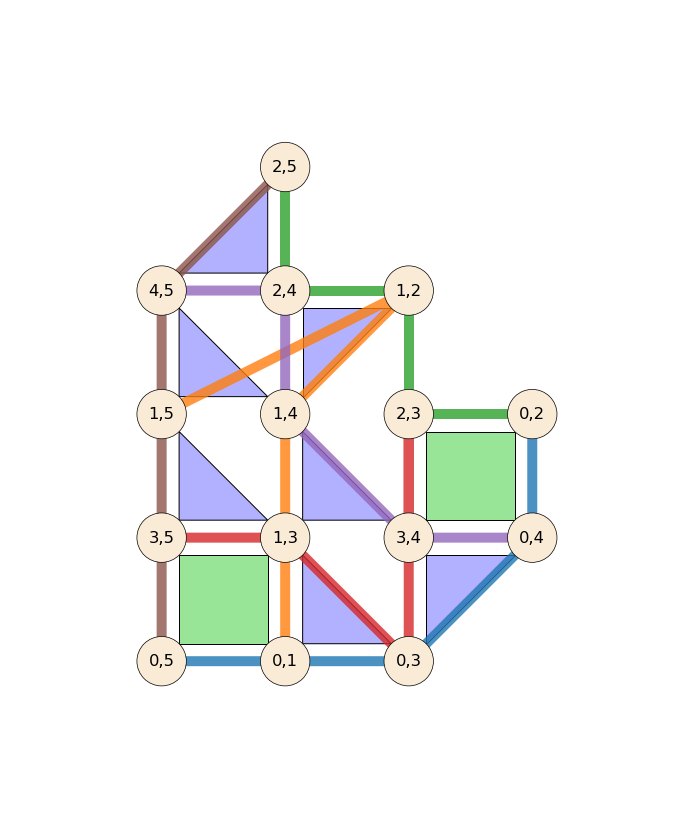

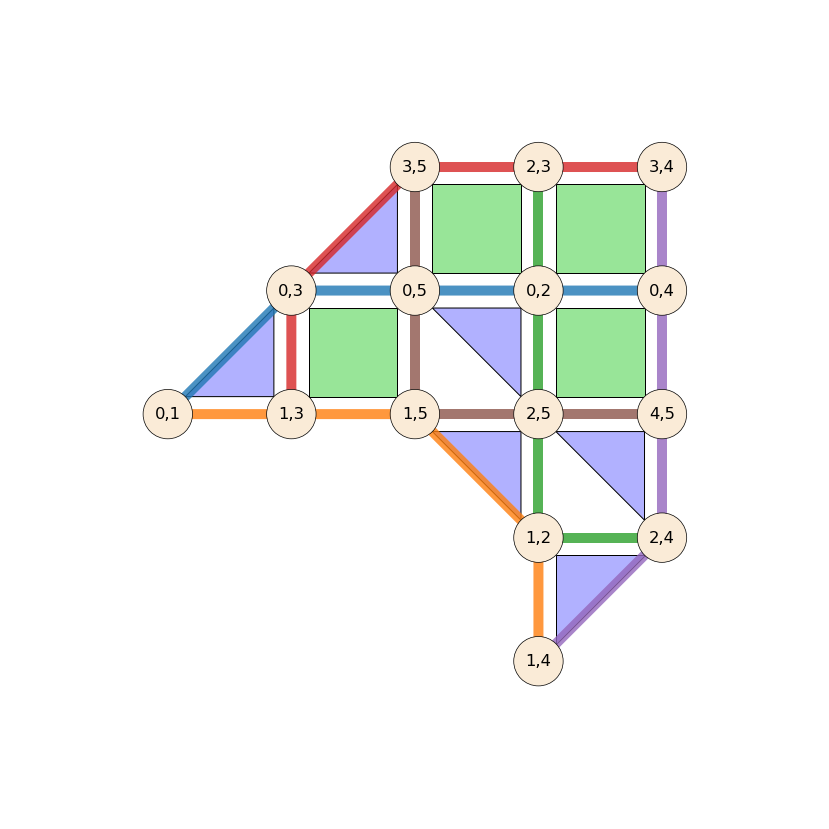

In [43]:
qubit_to_coord_dict_non_complete = {
 (0, 1): (1, 0),
 (0, 2): (3, 2),
 (0, 3): (2, 0),
 (0, 4): (3, 1),
 (0, 5): (0, 0),
 (1, 2): (2, 3),
 (1, 3): (1, 1),
 (1, 4): (1, 2),
 (1, 5): (0, 2),
 (2, 3): (2, 2),
 (2, 4): (1, 3),
 (2, 5): (1, 4),
 (3, 4): (2, 1),
 (3, 5): (0, 1),
 (4, 5): (0, 3)}

qubit_to_coord_dict_complete = {(0, 1): (-1, 1),
 (0, 2): (2, 2),
 (0, 3): (0, 2),
 (0, 4): (3, 2),
 (0, 5): (1, 2),
 (1, 2): (2, 0),
 (1, 3): (0, 1),
 (1, 4): (2, -1),
 (1, 5): (1, 1),
 (2, 3): (2, 3),
 (2, 4): (3, 0),
 (2, 5): (2, 1),
 (3, 4): (3, 3),
 (3, 5): (1, 3),
 (4, 5): (3, 1)}

graph = Graph.complete(6)
energy_object = functions_for_benchmarking.init_energy(graph)
mc = MC(energy_object)

mc.energy.polygon_object.nodes_object.qbits.update_qbits_from_dict(qubit_to_coord_dict_non_complete, assign_to_core=False)
mc.energy.line_energy(mc.energy.polygon_object.nodes_object.qbits)
ax = mc.energy.polygon_object.visualize()
mc.energy.polygon_object.draw_lines(ax)
plt.savefig(paths.plots / 'Figures/counter_example_of_lines.pdf')
plt.savefig(paths.plots / 'Figures/pngs/counter_example_of_lines.png')

mc.energy.polygon_object.nodes_object.qbits.update_qbits_from_dict(qubit_to_coord_dict_complete, assign_to_core=False)
mc.energy.line_energy(mc.energy.polygon_object.nodes_object.qbits)
ax = mc.energy.polygon_object.visualize()
mc.energy.polygon_object.draw_lines(ax)

plt.savefig(paths.plots / 'Figures/example_of_lines.pdf')
plt.savefig(paths.plots / 'Figures/pngs/example_of_lines.png')

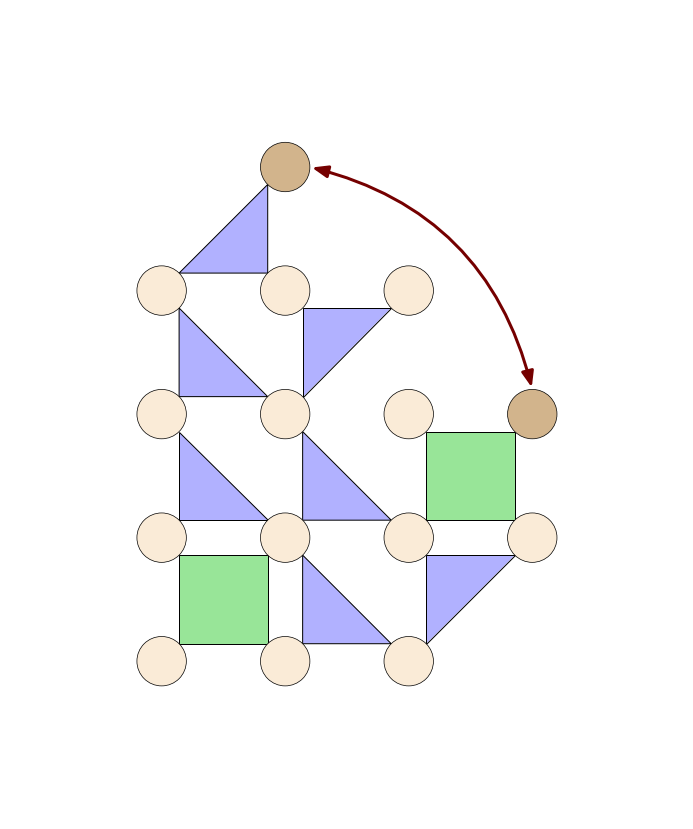

In [44]:
qubit_to_coord_dict_non_complete = {
 (0, 1): (1, 0),
 (0, 2): (3, 2),
 (0, 3): (2, 0),
 (0, 4): (3, 1),
 (0, 5): (0, 0),
 (1, 2): (2, 3),
 (1, 3): (1, 1),
 (1, 4): (1, 2),
 (1, 5): (0, 2),
 (2, 3): (2, 2),
 (2, 4): (1, 3),
 (2, 5): (1, 4),
 (3, 4): (2, 1),
 (3, 5): (0, 1),
 (4, 5): (0, 3)}



graph = Graph.complete(6)
energy_object = functions_for_benchmarking.init_energy(graph)
mc = MC(energy_object)


mc.energy.polygon_object.nodes_object.qbits.update_qbits_from_dict(qubit_to_coord_dict_non_complete, assign_to_core=False)
mc.energy.line_energy(mc.energy.polygon_object.nodes_object.qbits)


fig, ax = plt.subplots(figsize=(15, 15))

style="<|-|>,head_width=5,head_length=13"
kw = dict(arrowstyle=style)
a3 = patches.FancyArrowPatch((3, 2.2), (1.2, 4),lw=3,connectionstyle="arc3,rad=0.3", **kw, zorder=39, color='#750000')

for a in [a3]:
    plt.gca().add_patch(a)
mc.energy.polygon_object.nodes_object.qbits[(2, 5)].core = True
mc.energy.polygon_object.nodes_object.qbits[(0, 2)].core = True

#mc.energy.polygon_object.visualize(ax=ax)
visualize_without_labels(mc.energy.polygon_object, ax=ax)
fig.figure.savefig(paths.plots / f"ThesisFigures/swap_move.pdf")

plt.savefig(paths.plots / 'Figures/swap_move.pdf')
plt.savefig(paths.plots / 'Figures/pngs/swap_move.png')

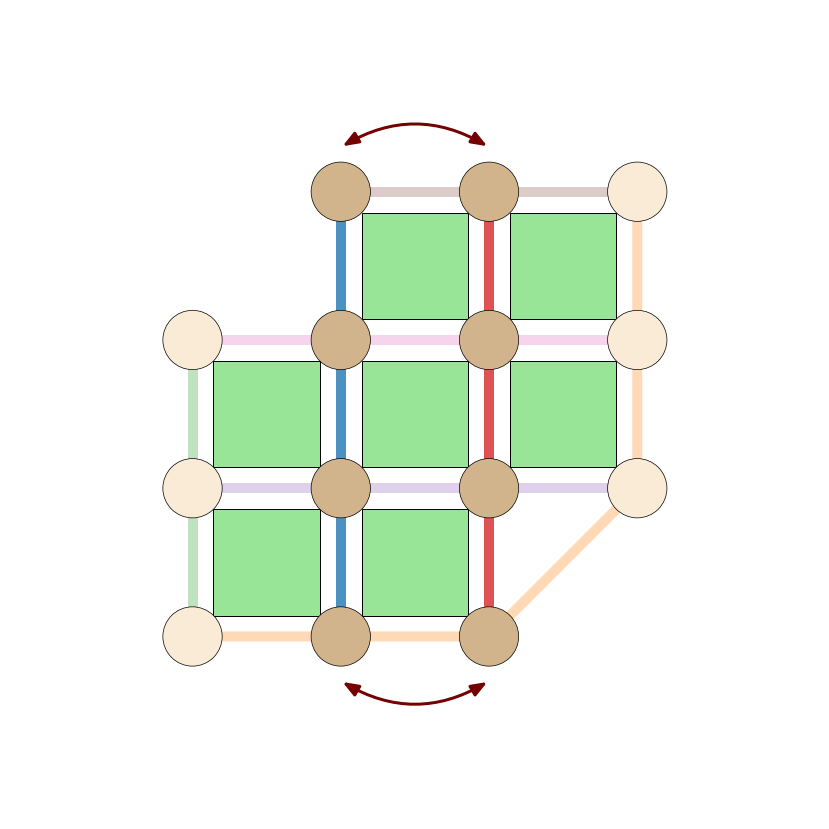

In [45]:
core_qubit_to_coord_dict = {(0, 1): (1, 3), (0, 4): (1, 4), (0, 5): (1, 6), (0, 6): (1, 5), (1, 2): (0, 3), (1, 3): (2, 3), (1, 4): (3, 4), (1, 5): (3, 6), (1, 6): (3, 5), (2, 4): (0, 4), (2, 6): (0, 5), (3, 4): (2, 4), (3, 5): (2, 6), (3, 6): (2, 5)}
graph_for_core = Graph.init_without_edges(7, [qubit for qubit in Graph.complete(7).qubits if qubit not in list(core_qubit_to_coord_dict)])
qbits_for_core = Qbits.init_qbits_from_dict(graph_for_core, dict())
nodes_object_for_core = Nodes(qbits_for_core)
polygon_object_for_core = Polygons(
    nodes_object_for_core,
    polygons=Polygons.create_polygons(graph_for_core.get_cycles(4)),
)
energy_for_core = Energy_core(polygon_object_for_core)
energy_for_core.polygon_object.nodes_object.qbits.update_qbits_from_dict(core_qubit_to_coord_dict)
energy_for_core.line_exponent = 1

energy_for_core.bad_line_penalty = 1
energy_for_core.line_energy(energy_for_core.polygon_object.nodes_object.qbits)

energy_for_core.polygon_object.nodes_object.qbits[(1, 5)].core = False
energy_for_core.polygon_object.nodes_object.qbits[(1, 2)].core = False
energy_for_core.polygon_object.nodes_object.qbits[(1, 4)].core = False

energy_for_core.polygon_object.nodes_object.qbits[(1, 6)].core = False
energy_for_core.polygon_object.nodes_object.qbits[(2, 6)].core = False
energy_for_core.polygon_object.nodes_object.qbits[(2, 4)].core = False

ax = visualize_without_labels(energy_for_core.polygon_object)#
#ax = energy_for_core.polygon_object.visualize()


for node in energy_for_core.polygon_object.nodes_object.qbits.graph.nodes:
    alpha = 0.3
    if node in [0, 3]:
        alpha = 0.8
    qbits_path, _ = energy_for_core.polygon_object.line_to_node(node)
    a = ax.plot(
        [Polygons.rotate_coords_by_45(qbit.coord, rotate)[0] for qbit in qbits_path],
        [Polygons.rotate_coords_by_45(qbit.coord, rotate)[1] for qbit in qbits_path],
        linewidth = 10,
        alpha=alpha,
    )
    a[0].set_solid_capstyle('round')

style="<|-|>,head_width=5,head_length=13"
kw = dict(arrowstyle=style)
a3 = patches.FancyArrowPatch((2, 6.3), (1, 6.3),lw=3,connectionstyle="arc3,rad=0.3", **kw, zorder=39, color='#750000')
for a in [a3]:
    plt.gca().add_patch(a)
a3 = patches.FancyArrowPatch((2, 2.7), (1, 2.7),lw=3,connectionstyle="arc3,rad=-0.3", **kw, zorder=39, color='#750000')
for a in [a3]:
    plt.gca().add_patch(a)
plt.savefig(paths.plots / f"ThesisFigures/line_swap_move.pdf")

plt.savefig(paths.plots / 'Figures/line_swap_move.pdf')
plt.savefig(paths.plots / 'Figures/pngs/line_swap_move.png')

/net/fermion/csba1344/CompilerQC/graph.py:184: UserWarning: adjacency matrix contains null columns
  warnings.warn("adjacency matrix contains null columns")


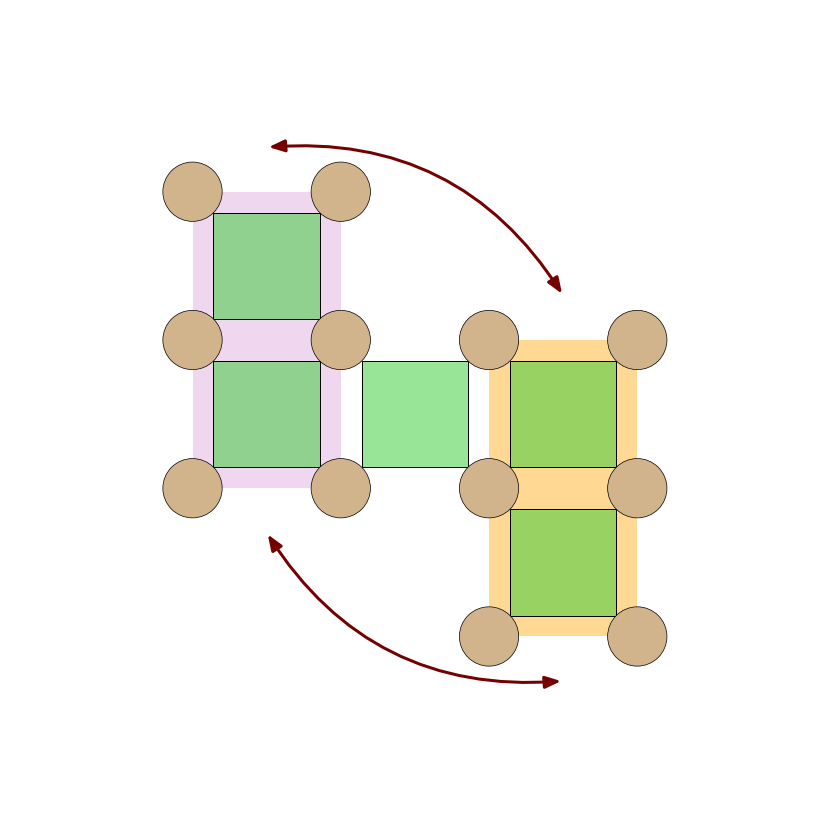

In [46]:
qubit_coord_dict = {
(1, 5): (0, 1),
(1, 4): (0, 2),
(1, 3): (0, 3),
# (1, 2): (0, 4),
(5, 6): (1, 1),
(4, 6): (1, 2),
(3, 6): (1, 3),
# (2, 6): (1, 4),
(0, 8): (2, 0),
(0, 5): (2, 1),
(0, 4): (2, 2),
(7, 8): (3, 0),
(5, 7): (3, 1),
(4, 7): (3, 2),
}

cluster1 = [(1, 3), (3, 6), (5, 6), (1, 5)]
cluster2 = [(0, 4), (4, 7), (7, 8), (0, 8)]

graph = Graph.init_without_edges(9, edges_to_remove=[qubit for qubit in Graph.complete(9).qubits if qubit not in qubit_coord_dict.keys()])
energy = functions_for_benchmarking.init_energy(graph)
mc = MC(energy)
mc.update_qbits_from_dict(qubit_coord_dict, assign_to_core=True)
rotate = False
ax = visualize_without_labels(mc.energy.polygon_object)#.visualize()

for color, polygon in zip(['plum', 'orange'], [cluster1, cluster2]):



    polygon = [qubit_coord_dict[qubit] for qubit in polygon]
    patch = plt.Polygon(
        polygon,
        fill=True,
        zorder=0,
        lw=0,
        alpha=0.42,
        color=color,
    )
    ax.add_patch(patch)
style="<|-|>,head_width=5,head_length=13"
kw = dict(arrowstyle=style)
a3 = patches.FancyArrowPatch((.5, 3.3), (2.5, 2.3),lw=3,connectionstyle="arc3,rad=-0.3", **kw, zorder=39, color='#750000')
for a in [a3]:
    plt.gca().add_patch(a)
    
a3 = patches.FancyArrowPatch((.5, .7), (2.5, -.3),lw=3,connectionstyle="arc3,rad=0.3", **kw, zorder=39, color='#750000')
for a in [a3]:
    plt.gca().add_patch(a)
    
plt.savefig(paths.plots / f"ThesisFigures/cluster_swap_move.pdf")

plt.savefig(paths.plots / 'Figures/cluster_swap_move.pdf')
plt.savefig(paths.plots / 'Figures/pngs/cluster_swap_move.png')

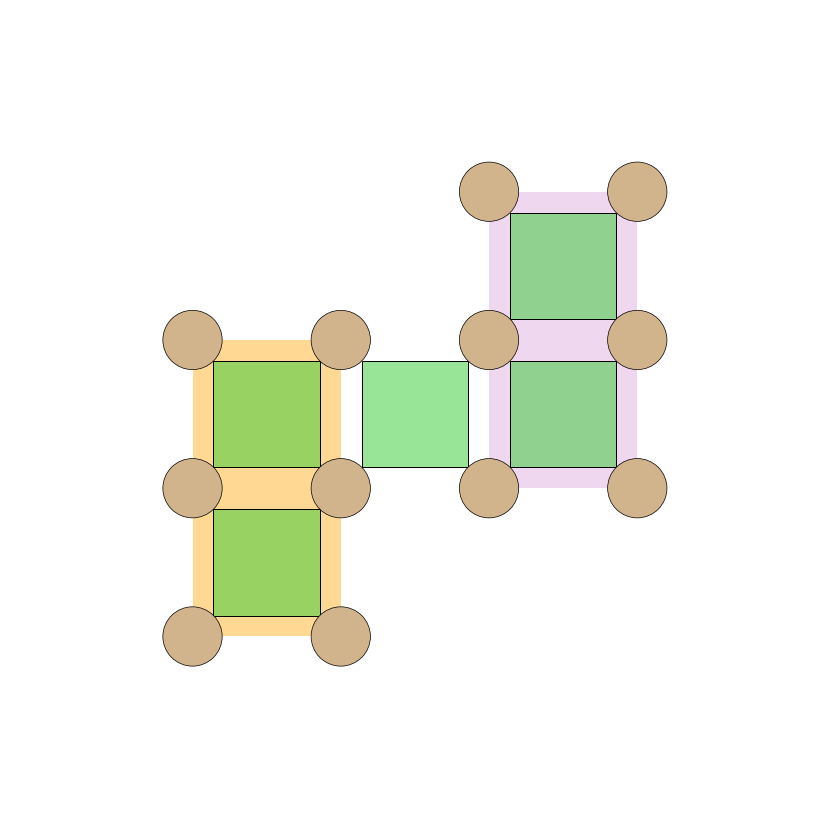

In [47]:
qubit_coord_dict = {
(1, 5): (2, 1),
(1, 4): (2, 2),
(1, 3): (2, 3),
# (1, 2): (0, 4),
(5, 6): (3, 1),
(4, 6): (3, 2),
(3, 6): (3, 3),
# (2, 6): (1, 4),
(0, 8): (0, 0),
(0, 5): (0, 1),
(0, 4): (0, 2),
(7, 8): (1, 0),
(5, 7): (1, 1),
(4, 7): (1, 2),
}

cluster1 = [(1, 3), (3, 6), (5, 6), (1, 5)]
cluster2 = [(0, 4), (4, 7), (7, 8), (0, 8)]

graph = Graph.init_without_edges(9, edges_to_remove=[qubit for qubit in Graph.complete(9).qubits if qubit not in qubit_coord_dict.keys()])
energy = functions_for_benchmarking.init_energy(graph)
mc = MC(energy)
mc.update_qbits_from_dict(qubit_coord_dict, assign_to_core=True)
rotate = False
ax = visualize_without_labels(mc.energy.polygon_object)#.visualize()

for color, polygon in zip(['plum', 'orange'], [cluster1, cluster2]):



    polygon = [qubit_coord_dict[qubit] for qubit in polygon]
    patch = plt.Polygon(
        polygon,
        fill=True,
        zorder=0,
        lw=0,
        alpha=0.42,
        color=color,
    )
    ax.add_patch(patch)

plt.savefig(paths.plots / 'Figures/after_cluster_swap_move.pdf')
plt.savefig(paths.plots / 'Figures/pngs/after_cluster_swap_move.png')

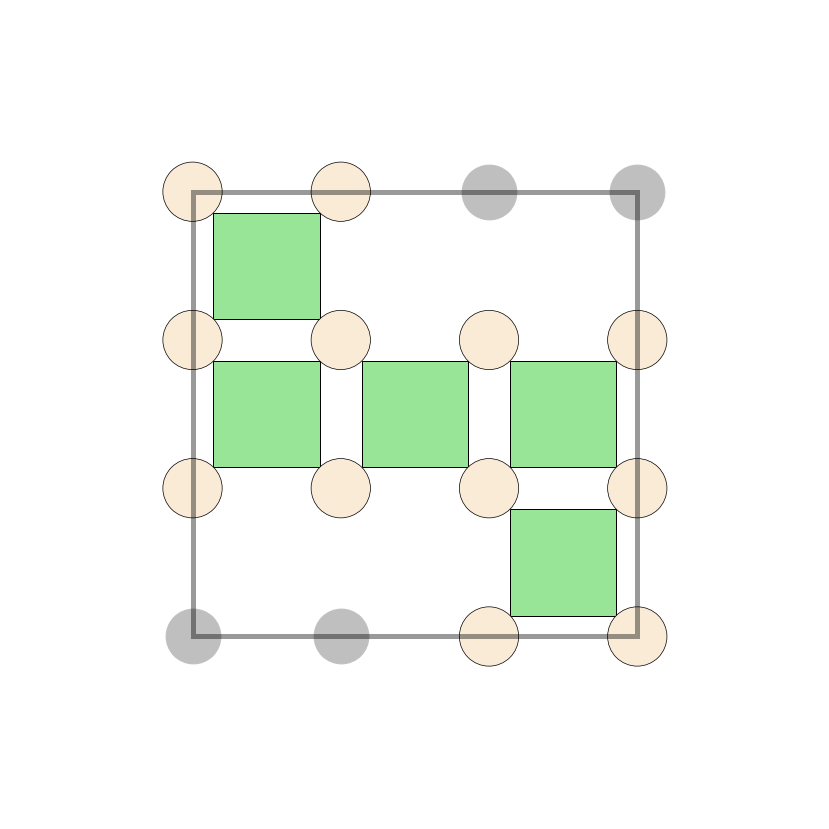

In [48]:

qubit_coord_dict = {
(1, 5): (0, 1),
(1, 4): (0, 2),
(1, 3): (0, 3),
# (1, 2): (0, 4),
(5, 6): (1, 1),
(4, 6): (1, 2),
(3, 6): (1, 3),
# (2, 6): (1, 4),
(0, 8): (2, 0),
(0, 5): (2, 1),
(0, 4): (2, 2),
(7, 8): (3, 0),
(5, 7): (3, 1),
(4, 7): (3, 2),
}

graph = Graph.init_without_edges(9, edges_to_remove=[qubit for qubit in Graph.complete(9).qubits if qubit not in qubit_coord_dict.keys()])
energy = functions_for_benchmarking.init_energy(graph)
mc = MC(energy)
mc.update_qbits_from_dict(qubit_coord_dict, assign_to_core=False)
core_corner = ((0, 3), (0, 3))
ax = visualize_without_labels(mc.energy.polygon_object)#.visualize()
#ax = mc.energy.polygon_object.visualize()
possible_coords = coords_from_corner(core_corner)
mc.energy.polygon_object.color_coords(ax, [(coord, 0.75) for coord in possible_coords], radius=3000)
polygon = [(0, 0), (3, 0), (3, 3), (0, 3)]
patch = plt.Polygon(
    polygon,
    fill=False,
    zorder=111,
    lw=5,
    alpha=0.4,
    color='black',
)
ax.add_patch(patch)

# core_corner = ((-1, 4), (-1, 4))
# ax = mc.energy.polygon_object.visualize(core_corner=core_corner)
# possible_coords = coords_from_corner(core_corner)
# mc.energy.polygon_object.color_coords(ax, [(coord, 0.5) for coord in possible_coords], radius=4500)

plt.savefig(paths.plots / 'Figures/envelop_search_with_core.pdf')
plt.savefig(paths.plots / 'Figures/pngs/envelop_search_with_core.png')

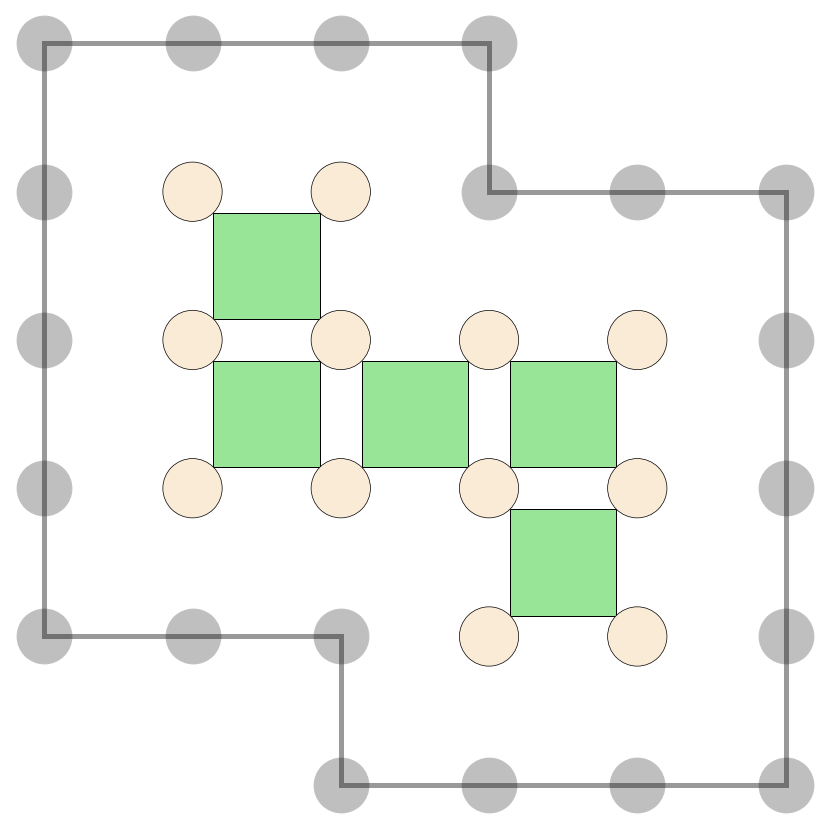

In [49]:

qubit_coord_dict = {
(1, 5): (0, 1),
(1, 4): (0, 2),
(1, 3): (0, 3),
# (1, 2): (0, 4),
(5, 6): (1, 1),
(4, 6): (1, 2),
(3, 6): (1, 3),
# (2, 6): (1, 4),
(0, 8): (2, 0),
(0, 5): (2, 1),
(0, 4): (2, 2),
(7, 8): (3, 0),
(5, 7): (3, 1),
(4, 7): (3, 2),
}

graph = Graph.init_without_edges(9, edges_to_remove=[qubit for qubit in Graph.complete(9).qubits if qubit not in qubit_coord_dict.keys()])
energy = functions_for_benchmarking.init_energy(graph)
mc = MC(energy)
mc.update_qbits_from_dict(qubit_coord_dict, assign_to_core=False)
core_corner = ((0, 3), (0, 3))
ax = visualize_without_labels(mc.energy.polygon_object)#.visualize()
#ax = mc.energy.polygon_object.visualize()
possible_coords = set(coords_from_corner(((-1, 4), (-1, 4)))) - set([(-1, -1), (0, -1), (3, 4), (4, 4)])

mc.energy.polygon_object.color_coords(ax, [(coord, 0.75) for coord in possible_coords], radius=3000)
polygon = [(-1, 0), (1, 0), (1, -1), (4, -1), (4, 3), (2, 3), (2, 4), (-1, 4)]
patch = plt.Polygon(
    polygon,
    fill=False,
    zorder=111,
    lw=5,
    alpha=0.4,
    color="black",
)
ax.add_patch(patch)


plt.savefig(paths.plots / 'Figures/shell_search_with_core.pdf')
plt.savefig(paths.plots / 'Figures/pngs/shell_search_with_core.png')

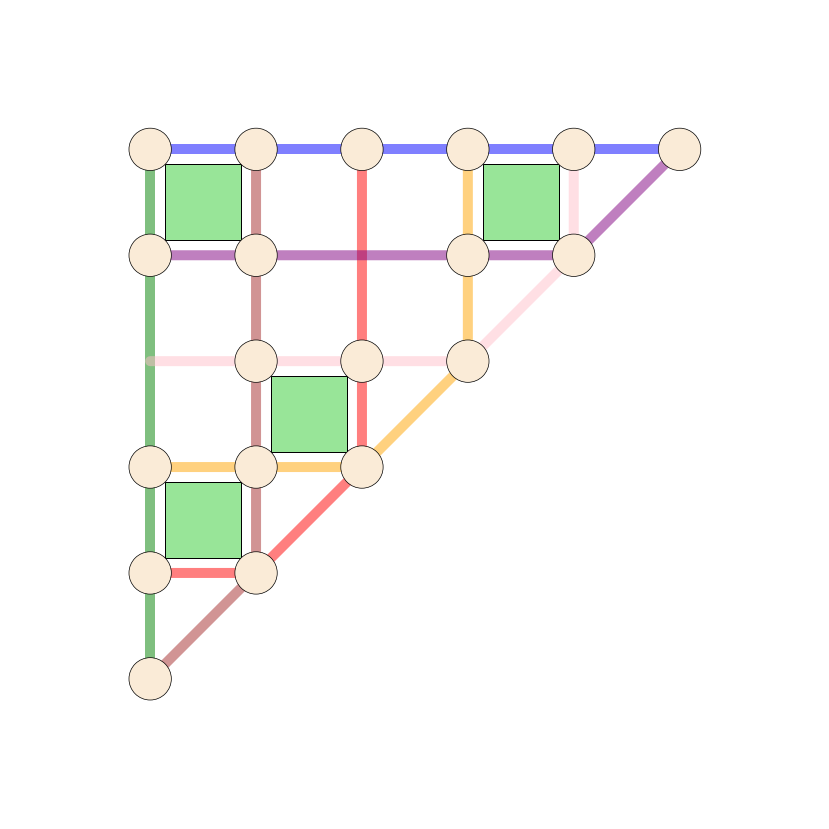

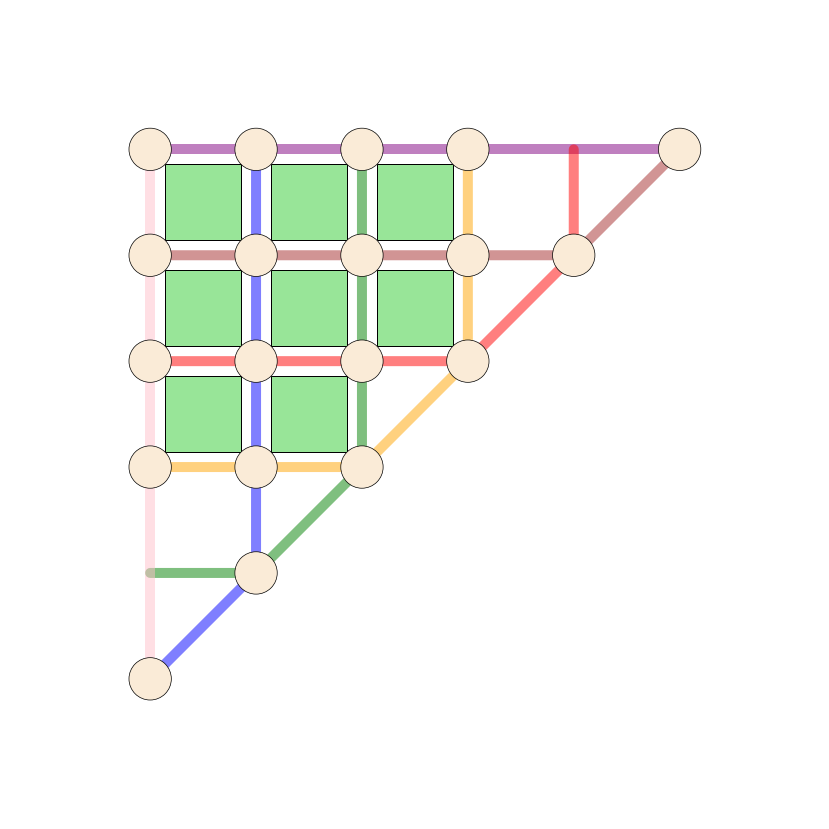

In [50]:
bad_core = {(0, 1): (3, 6), (0, 2): (0, 6), (0, 3): (2, 6), (0, 4): (5, 6), (0, 5): (4, 6), (0, 6): (1, 6), (1, 2): (0, 3), (1, 3): (2, 3), (1, 4): (3, 5), (1, 5): (3, 4), (1, 6): (1, 3), (2, 3): (0, 2), (2, 4): (0, 5), (2, 6): (0, 1), (3, 5): (2, 4), (3, 6): (1, 2), (4, 5): (4, 5), (4, 6): (1, 5), (5, 6): (1, 4)}
good_core = {(0, 1): (1, 3), (0, 2): (1, 2), (0, 3): (1, 4), (0, 4): (1, 6), (0, 5): (0, 1), (0, 6): (1, 5), (1, 2): (2, 3), (1, 3): (3, 4), (1, 4): (3, 6), (1, 5): (0, 3), (1, 6): (3, 5), (2, 3): (2, 4), (2, 4): (2, 6), (2, 6): (2, 5), (3, 5): (0, 4), (3, 6): (4, 5), (4, 5): (0, 6), (4, 6): (5, 6), (5, 6): (0, 5)}
colors = ["blue", "orange", "green", "red", "purple", "pink", "brown"] #olive
N = 7
graph_ = Graph.complete(N)
qbits_ = Qbits.init_qbits_from_dict(graph_, dict())
nodes_object_ = Nodes(qbits_, place_qbits_in_lines=True)
polygon_object_ = Polygons(nodes_object_)
energy_ = Energy(polygon_object_)
energy_.line_energy(energy_.polygon_object.nodes_object.qbits)
linewidth, alpha = 10, 0.5
for idx, node in enumerate(nodes_object_.nodes.values()):
    node.color = colors[idx]

    
graph = Graph.init_without_edges(N, edges_to_remove=[(2, 5), (3, 4)])#, (1, 6)])
qbits = Qbits.init_qbits_from_dict(graph, dict())
qbits.update_qbits_from_dict(bad_core, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, polygons=Polygons.create_polygons(graph.get_cycles(4)))
energy = Energy(polygon_object)
ax = visualize_without_labels(energy.polygon_object)#.visualize()
for node in energy.polygon_object.nodes_object.qbits.graph.nodes:
    qubits = [qbits.coord_to_qbit_dict.get(qbit.coord) for qbit in nodes_object_.qbits_of_nodes([node])]
    qubits = [x for x in qubits if x is not None]
    qubits = [qbit.qubit for qbit in qubits]
    x, y = qubits[:2]
    logical_node = list(set(x).intersection(y))[0]
    color=colors[logical_node]
    qbits_path, _ = energy_.polygon_object.line_to_node(node)
    a = ax.plot(
        [Polygons.rotate_coords_by_45(qbit.coord, rotate)[0] for qbit in qbits_path],
        [Polygons.rotate_coords_by_45(qbit.coord, rotate)[1] for qbit in qbits_path],
        linewidth = linewidth,
        alpha=alpha,
        color=color
    )
    a[0].set_solid_capstyle('round')

ax.figure.savefig(paths.plots / f"ThesisFigures/core_search_bad.pdf")

plt.savefig(paths.plots / 'Figures/core_search_bad.pdf')
plt.savefig(paths.plots / 'Figures/pngs/core_search_bad.png')

graph = Graph.init_without_edges(N, edges_to_remove=[(2, 5), (3, 4)])#, (1, 6)])
qbits = Qbits.init_qbits_from_dict(graph, dict())
qbits.update_qbits_from_dict(good_core, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, polygons=Polygons.create_polygons(graph.get_cycles(4)))
energy = Energy(polygon_object)
ax = visualize_without_labels(energy.polygon_object)#.visualize()
for node in energy.polygon_object.nodes_object.qbits.graph.nodes:
    qubits = [qbits.coord_to_qbit_dict.get(qbit.coord) for qbit in nodes_object_.qbits_of_nodes([node])]
    qubits = [x for x in qubits if x is not None]
    qubits = [qbit.qubit for qbit in qubits]
    x, y = qubits[:2]
    logical_node = list(set(x).intersection(y))[0]
    color=colors[logical_node]
    qbits_path, _ = energy_.polygon_object.line_to_node(node)
    a = ax.plot(
        [Polygons.rotate_coords_by_45(qbit.coord, rotate)[0] for qbit in qbits_path],
        [Polygons.rotate_coords_by_45(qbit.coord, rotate)[1] for qbit in qbits_path],
        linewidth = linewidth,
        alpha=alpha,
        color=color
    )
    a[0].set_solid_capstyle('round')
ax.figure.savefig(paths.plots / f"ThesisFigures/core_search_good.pdf")

plt.savefig(paths.plots / 'Figures/core_search_good.pdf')
plt.savefig(paths.plots / 'Figures/pngs/core_search_good.png')

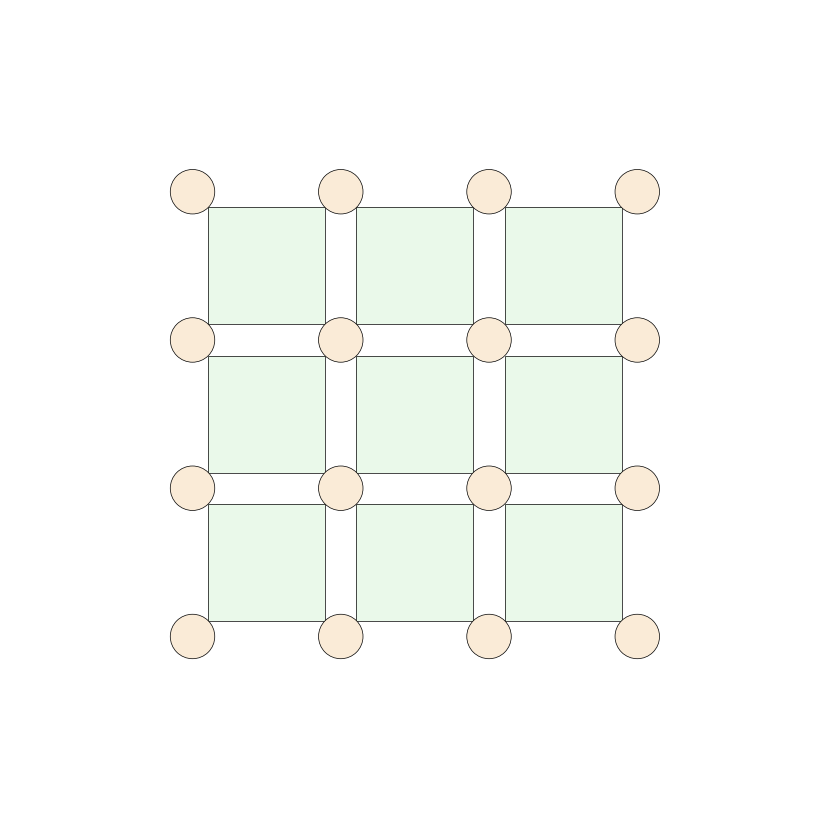

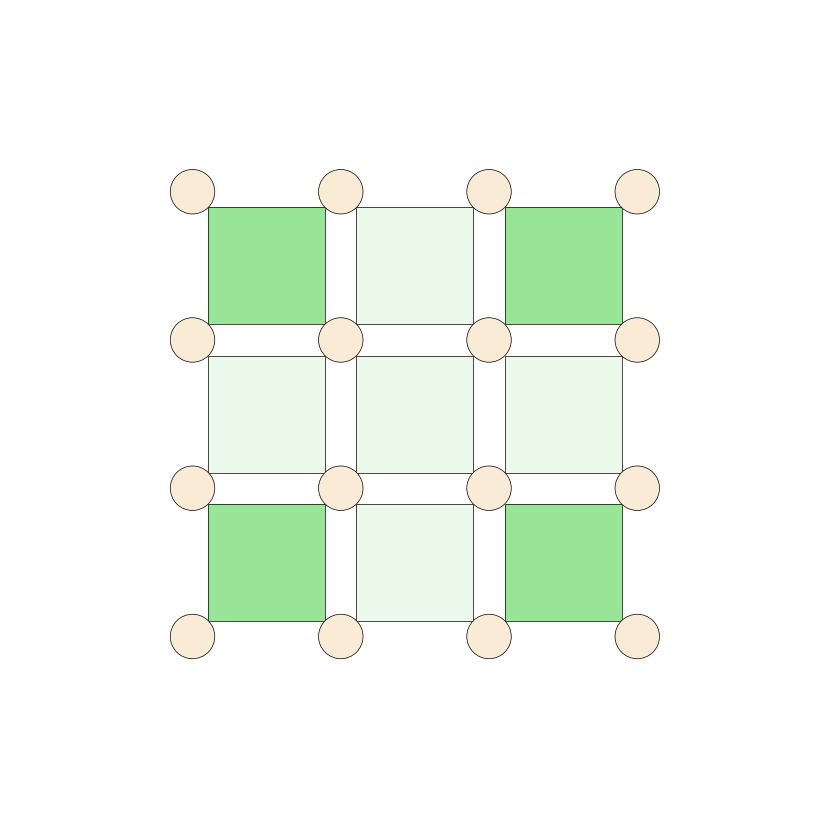

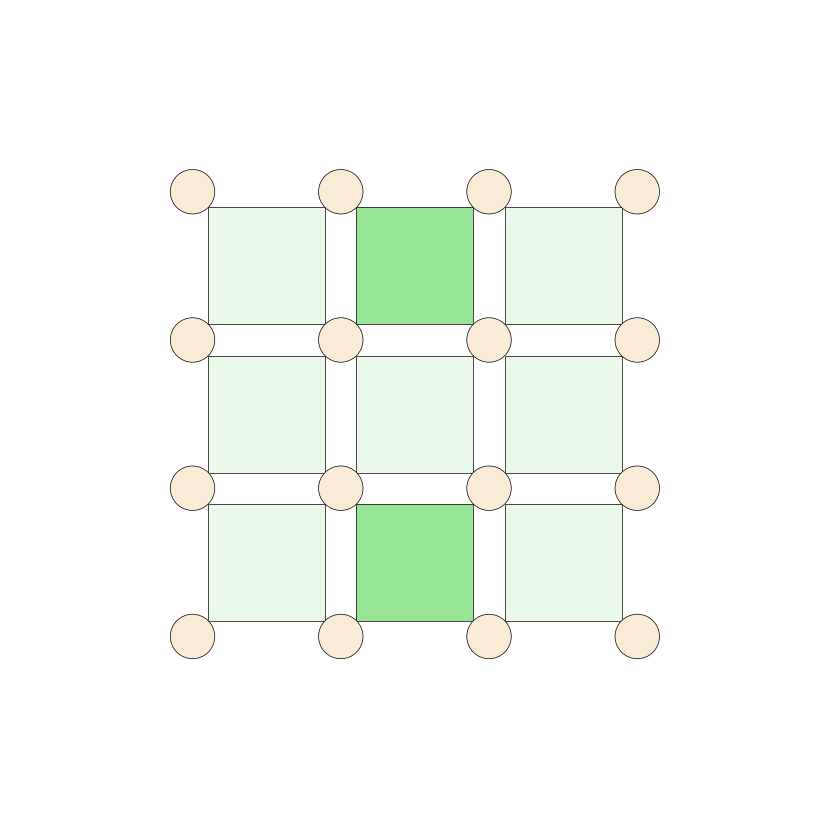

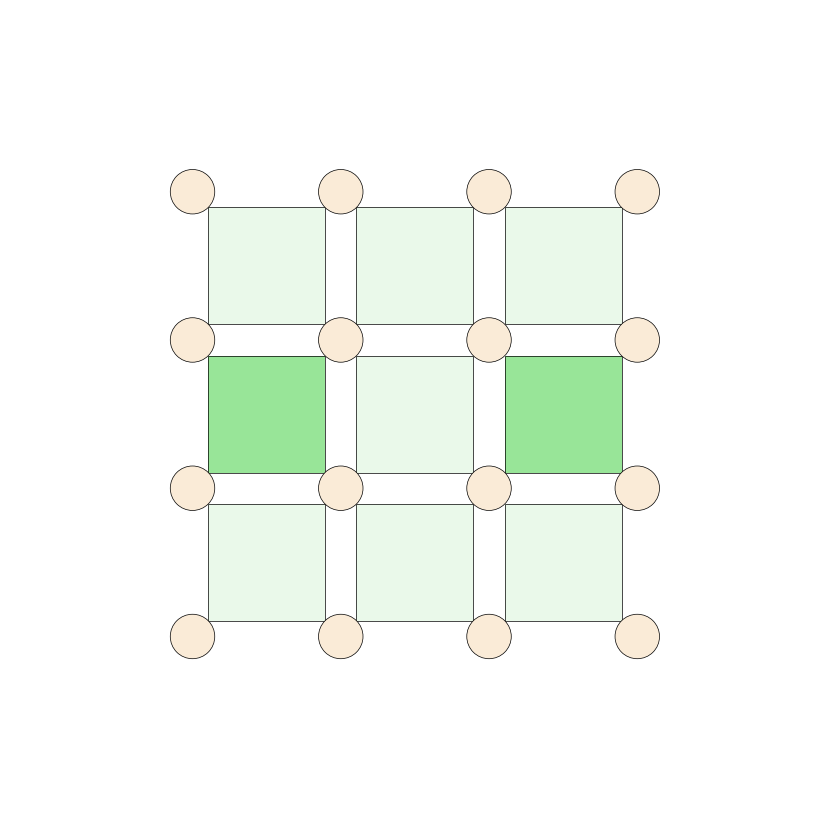

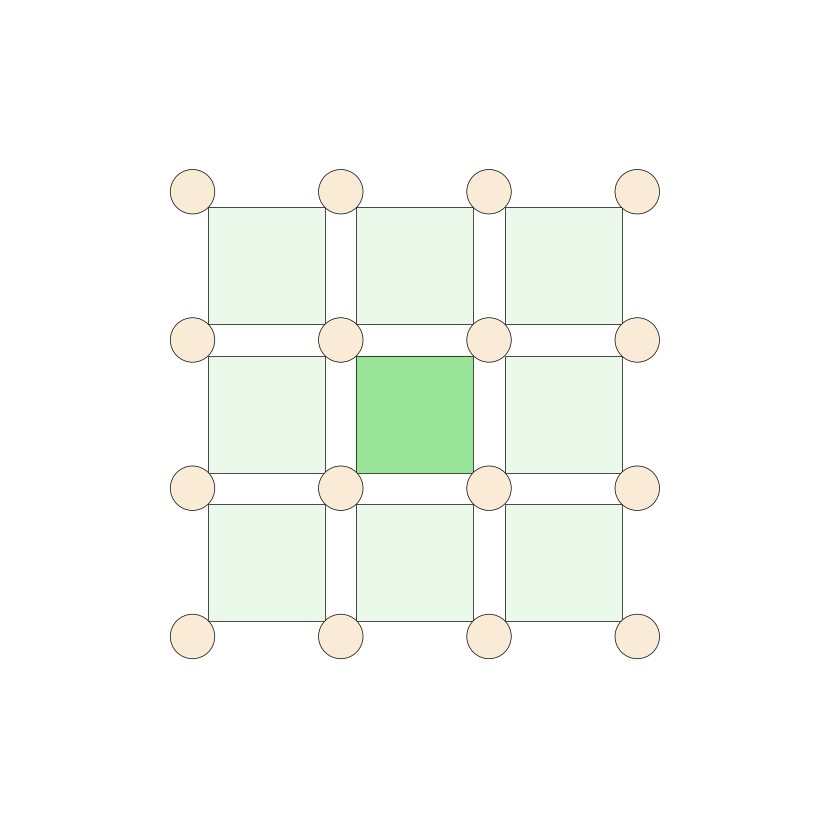

In [51]:
p1 = [[(0, 5), (0, 6), (1, 5), (1, 6)],
 [(2, 5), (2, 6), (3, 5), (3, 6)],
 [(0, 7), (0, 8), (1, 7), (1, 8)],
 [(2, 7), (2, 8), (3, 7), (3, 8)]]
p2 = [[(1, 5), (1, 6), (2, 5), (2, 6)],
 [(1, 7), (1, 8), (2, 7), (2, 8)],]
p3 = [[(0, 6), (0, 7), (1, 6), (1, 7)],
 [(2, 6), (2, 7), (3, 6), (3, 7)]]
p4 = [[(1, 6), (2, 6), (1, 7), (2, 7)]]
for idx, it in enumerate([[], p1, p2, p3, p4]):

    ax=None
    zoom=1
    figsize=(15, 15)
    core_corner=None
    check_ancilla_in_core: bool = True
    envelop_rect=None
    radius=0.15

    _, ax = plt.subplots(figsize=figsize)

    ax.set_aspect('equal', 'box')
    ax.axis('off')

    ax.scatter(0, 0, color="white", s=0.6, alpha=0)


    N = 9
    g = Graph.complete(9)
    edges_to_remove =  [qubit for qubit in g.qubits if qubit[1]  in [1, 2, 3, 4] or qubit[0]  in [4, 5, 6, 7]]
    graph = Graph.init_without_edges(N,edges_to_remove)

    qcd = {
    (0, 5): (1, 1),
    (0, 6): (1, 2),
    (0, 7): (1, 3),
    (0, 8): (1, 4),
    (1, 5): (2, 1),
    (1, 6): (2, 2),
    (1, 7): (2, 3),
    (1, 8): (2, 4),
    (2, 5): (3, 1),
    (2, 6): (3, 2),
    (2, 7): (3, 3),
    (2, 8): (3, 4),
    (3, 5): (4, 1),
    (3, 6): (4, 2),
    (3, 7): (4, 3),
    (3, 8): (4, 4),
    }
    qbits = Qbits.init_qbits_from_dict(graph, qcd, assign_to_core=False)
    nodes_object = Nodes(qbits, place_qbits_in_lines=False)
    polygon_object = Polygons(nodes_object, scope_measure=True)


    self = polygon_object


    if envelop_rect is None: envelop_rect = self.nodes_object.qbits.envelop_rect()
    ax.scatter(*list(zip(*envelop_rect)), color="white", s=0.6, alpha=0)

    # color plaquettes
    for polygon, p in zip(self.polygons_coords(
        self.nodes_object.qbits.qubit_to_coord_dict, self.polygons
    ), self.polygons):
        fill, facecolor, lw, alpha, edge_alpha = False, None, 0, 0, 0
        measure = self.scope_of_polygon(polygon)

        if measure == self.unit_square:
            fill, facecolor, lw, alpha, edge_alpha = True, "limegreen", 1, 0.1, .7
            polygon = Polygons.scale(polygon, radius)
            if sorted(p) in [sorted(x) for x in it]:
                alpha = .5

        patch = plt.Polygon(
            polygon,
            zorder=0,
            fill=fill,
            lw=0,
            facecolor=facecolor,
            alpha=alpha,
        )
        edge = plt.Polygon(
            polygon,
            zorder=0,
            fill=False,
            lw=lw,
            edgecolor="black",
            alpha=edge_alpha
        )
        ax.add_patch(patch)
        ax.add_patch(edge)
    # color qbits
    for qbit in self.nodes_object.qbits:

        if qbit.coord in [(2, 3), (4, 1)]:
            qbit.ancilla = True
        label = ax.annotate(
            "",#r"{}, {}".format(*qbit.qubit),
            xy=qbit.coord,
            ha="center",
            va="center",
            fontsize=15,
            zorder=20,
        )
        if qbit.core == False:
            circle = plt.Circle(
                qbit.coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="antiquewhite", zorder=20
            )
        ax.add_patch(circle)
    plt.savefig(paths.plots / f'Figures/QAOA_iteration_{idx}.pdf')
    plt.savefig(paths.plots / f'Figures/pngs/QAOA_iteration_{idx}.png')

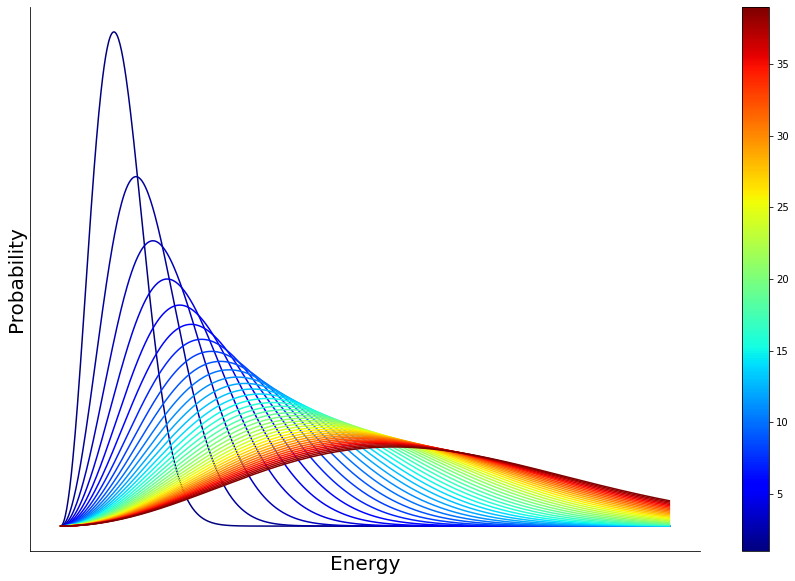

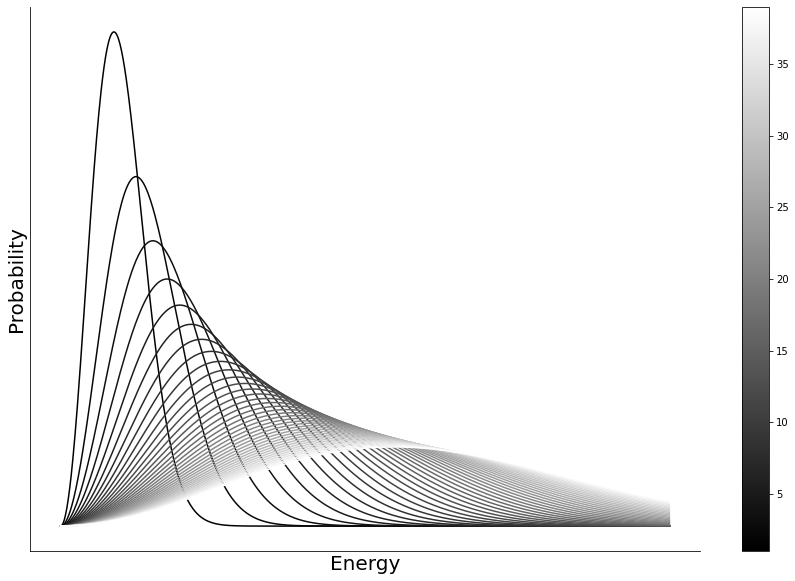

In [52]:

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)

# your dataset
v = np.arange(0,800,1)
amu = 1.66e-27
mass = 85*amu
nValues = np.arange(1,40)

# setup the normalization and the colormap
normalize = mcolors.Normalize(vmin=nValues.min(), vmax=nValues.max())
colormap = cm.jet#binary_r




temperatures = [25*i for i in nValues]
for n, T in zip(nValues, temperatures):
    fv = MB_speed(v,mass,T)
    #ax.plot(v,fv,label='T='+str(T)+' K',lw=2, c=str(T/max(temperatures)), alpha=1 - T/max(temperatures))
    ax.plot(v,fv, color=colormap(normalize(n)))

# setup the colorbar
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(nValues)
plt.colorbar(scalarmappaple)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlabel('Energy', fontsize=20)
ax.set_ylabel('Probability', fontsize=20)
ax.figure.savefig(paths.plots / f"ThesisFigures/boltzmann_temperature_dependence.pdf")

plt.savefig(paths.plots / 'Figures/boltzmann_temperature_dependence.pdf')
plt.savefig(paths.plots / 'Figures/pngs/boltzmann_temperature_dependence.png')




fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)

# your dataset
v = np.arange(0,800,1)
amu = 1.66e-27
mass = 85*amu
nValues = np.arange(1,40)

# setup the normalization and the colormap
normalize = mcolors.Normalize(vmin=nValues.min(), vmax=nValues.max())
colormap = cm.binary_r




temperatures = [25*i for i in nValues]
for n, T in zip(nValues, temperatures):
    fv = MB_speed(v,mass,T)
    #ax.plot(v,fv,label='T='+str(T)+' K',lw=2, c=str(T/max(temperatures)), alpha=1 - T/max(temperatures))
    ax.plot(v,fv, color=colormap(normalize(n)))

# setup the colorbar
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(nValues)
plt.colorbar(scalarmappaple)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlabel('Energy', fontsize=20)
ax.set_ylabel('Probability', fontsize=20)
plt.savefig(paths.plots / 'Figures/boltzmann_temperature_dependence_binary_cmap.pdf')
plt.savefig(paths.plots / 'Figures/pngs/boltzmann_temperature_dependence_binary_cmap.png')

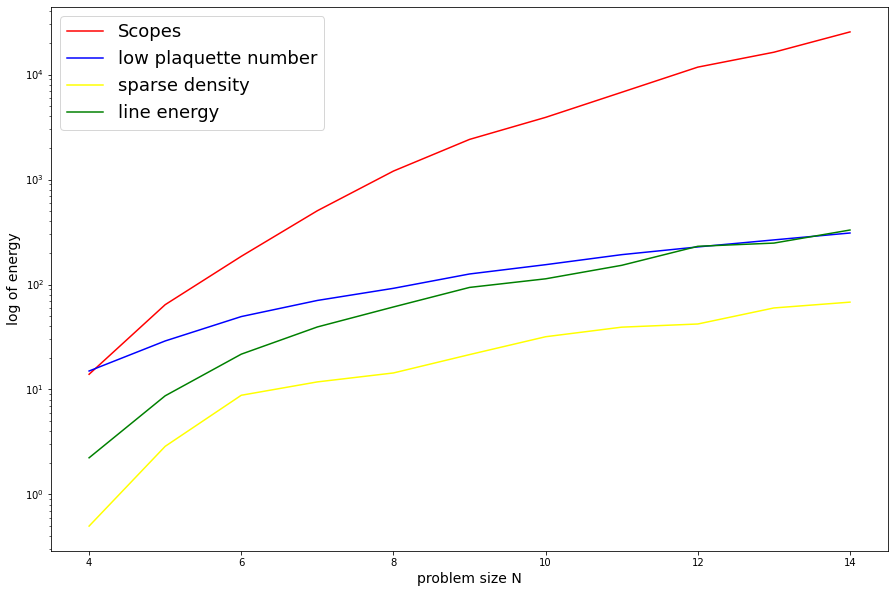

In [53]:


Distances = []
Low_number_of_plaquettes = []
Sparse_density = []
Line_energy_value = []
for _ in range(1):
    distances = []
    low_number_of_plaquettes = []
    sparse_density = []
    line_energy_value = []
    Ns = [i for i in range(4, 15)]
    for N in Ns:
        graph = Graph.complete(N)
        qbits = Qbits.init_qbits_from_dict(graph, dict())#zip(graph.qubits,graph.qubits)))
        nodes_object = Nodes(qbits, place_qbits_in_lines=False)
        polygon_object = Polygons(nodes_object)
        self = Energy(polygon_object)
        polygons_of_interest = self.changed_polygons(qbits)
        self.polygons_coords_of_interest = self.polygon_object.coords_of_polygons(
            polygons_of_interest
        )
        if self.polygon_object.scope_measure:
            measure = self.scopes_of_polygons() 
        if not self.polygon_object.scope_measure:
            measure = self.moments_of_inertia_of_polygons()


        distances_to_plaquette = self.scaled_measure(measure)
        line_energy_value.append(self.line_energy(qbits))
        sparse_density.append(sum(
            self.penalty_for_sparse_plaquette_density()
        ))
        low_number_of_plaquettes.append(sum(
            self.penalty_for_low_number_of_plaquettes()
        ))
        distances.append(distances_to_plaquette.sum())
    Distances.append(distances)
    Low_number_of_plaquettes.append(low_number_of_plaquettes)
    Sparse_density.append(sparse_density)
    Line_energy_value.append(line_energy_value)
    
    
plt.figure(figsize=(15,10))
for distances in Distances:
    plt.plot(Ns, distances, color="red")
for low_number_of_plaquettes in Low_number_of_plaquettes:
    plt.plot(Ns, low_number_of_plaquettes, color="blue")
for sparse_density in Sparse_density:
    plt.plot(Ns, sparse_density, color="yellow")
for line_energy_value in Line_energy_value:
    plt.plot(Ns, line_energy_value, color="green")
plt.yscale('log')
leg = plt.legend(['Scopes', 'low plaquette number', "sparse density", "line energy"], fontsize=18)
colors=['red', 'blue', 'yellow', 'green']

for i, j in enumerate(leg.legendHandles):
    j.set_color(colors[i])
    
plt.xlabel('problem size N', fontsize=14)
plt.ylabel('log of energy', fontsize=14)

plt.savefig(paths.plots / "Figures/energie_scalings_in_comparison.pdf")
plt.savefig(paths.plots / "Figures/pngs/energie_scalings_in_comparison.png")

In [54]:



# Scopes, MOIS = [], []
# N = 7
# exponents = np.linspace(0, 4, 20)
# for exponent in exponents:
#     graph = Graph.complete(N)
#     qbits = Qbits.init_qbits_from_dict(graph, dict())
#     nodes_object = Nodes(qbits)
#     polygon_object = Polygons(nodes_object, scope_measure=True, exponent=exponent)
#     energy = Energy(polygon_object)
#     Scopes.append(energy(qbits)[0])
#     energy.polygon_object.scope_measure = False
#     MOIS.append(energy(qbits)[0])
    
    
# plt.figure(figsize=(15,10))
# plt.plot(exponents, MOIS, color="red")
# plt.plot(exponents, Scopes, color="blue")
# leg = plt.legend([ 'MoIs', 'Scopes'], fontsize=18)
# colors=['red', 'blue']

# for i, j in enumerate(leg.legendHandles):
#     j.set_color(colors[i])
    
# #plt.yscale('log')
# plt.xlabel('exponent for N=7', fontsize=14)
# plt.ylabel('energy', fontsize=14)


# plt.savefig(paths.plots / "Figures/MoIvsScopes.pdf")
# plt.savefig(paths.plots / "Figures/pngs/MoIvsScopes.png")

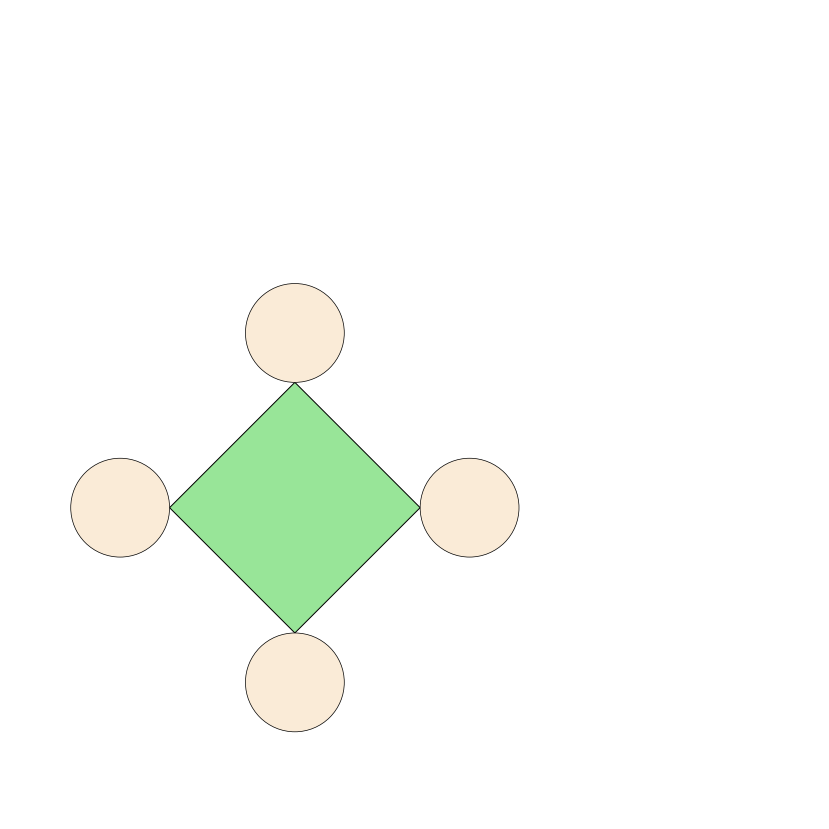

In [55]:
graph = Graph.init_without_edges(4, [(0, 2), (1, 3)])
qbits = Qbits.init_qbits_from_dict(graph, {(0, 1): (1, 2), (0, 3): (1, 3), (1, 2): (0, 2), (2, 3): (0, 3)}, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object)
visualize_without_labels(polygon_object, rotate=True)

plt.savefig(paths.plots / "Figures/single_rotated_square_plaquette.pdf")
plt.savefig(paths.plots / "Figures/pngs/single_rotated_square_plaquette.png")

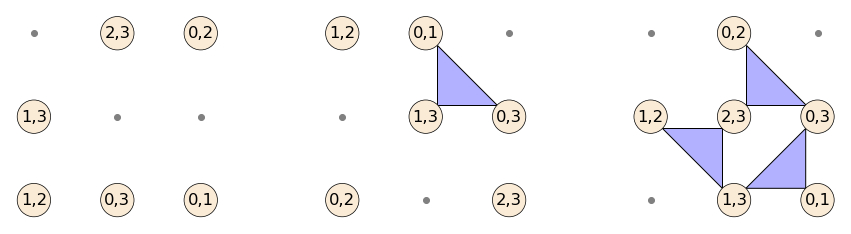

In [56]:
fig, axx = plt.subplots(1, 3, figsize=(15, 15))

bad_qubit_to_coord_dict = {
 (0, 1): (2, 0),
 (0, 2): (2, 2),
 (0, 3): (1, 0),
 (1, 2): (0, 0),
 (1, 3): (0, 1),
 (2, 3): (1, 2)
}

ok_qubit_to_coord_dict = {
 (0, 1): (1, 2),
 (0, 2): (0, 0),
 (0, 3): (2, 1),
 (1, 2): (0, 2),
 (1, 3): (1, 1),
 (2, 3): (2, 0)}
good_qubit_to_coord_dict = {
 (0, 1): (2, 0),
 (0, 2): (1, 2),
 (0, 3): (2, 1),
 (1, 2): (0, 1),
 (1, 3): (1, 0),
 (2, 3): (1, 1)}
graph = Graph.complete(4)
qbits = Qbits.init_qbits_from_dict(graph, bad_qubit_to_coord_dict, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object)
visualize_without_labels(polygon_object, color_of_grid_points='grey', alpha_of_grid_points=1, ax=axx[0],without_label=False, padding=0, s=36)
qbits = Qbits.init_qbits_from_dict(graph, ok_qubit_to_coord_dict, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object)
visualize_without_labels(polygon_object, color_of_grid_points='grey', alpha_of_grid_points=1, ax=axx[1],without_label=False, padding=0, s=36)
qbits = Qbits.init_qbits_from_dict(graph, good_qubit_to_coord_dict, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object)
visualize_without_labels(polygon_object, color_of_grid_points='grey', alpha_of_grid_points=1, ax=axx[2],without_label=False, padding=0, s=36)
plt.subplots_adjust(wspace=.4)

fig.savefig(paths.plots / f"ThesisFigures/configuration_space.pdf")

plt.savefig(paths.plots / "Figures/configuration_space.pdf")
plt.savefig(paths.plots / "Figures/pngs/configuration_space.png")

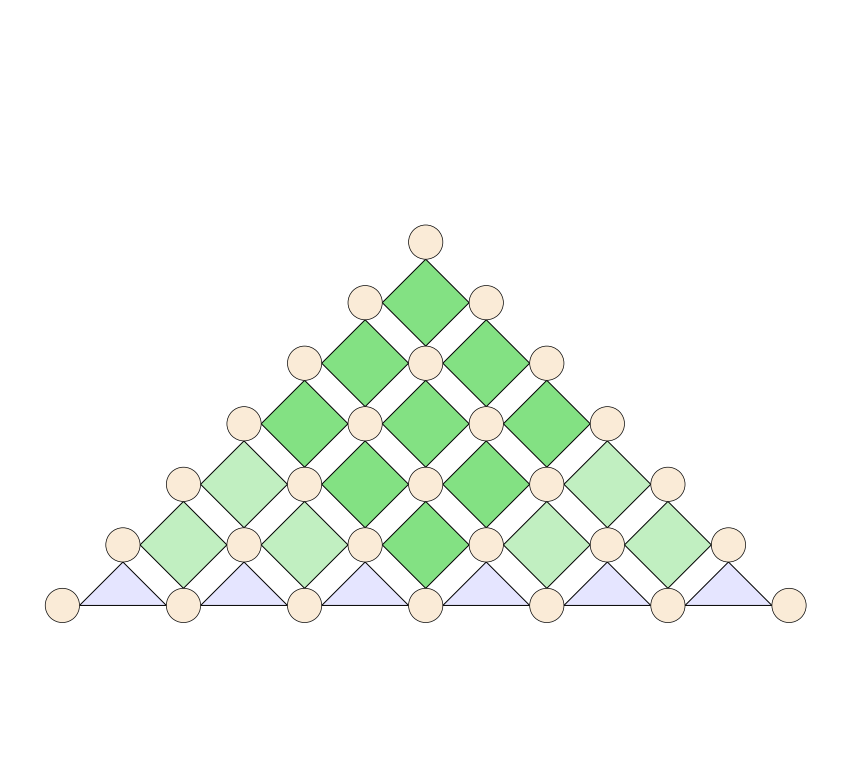

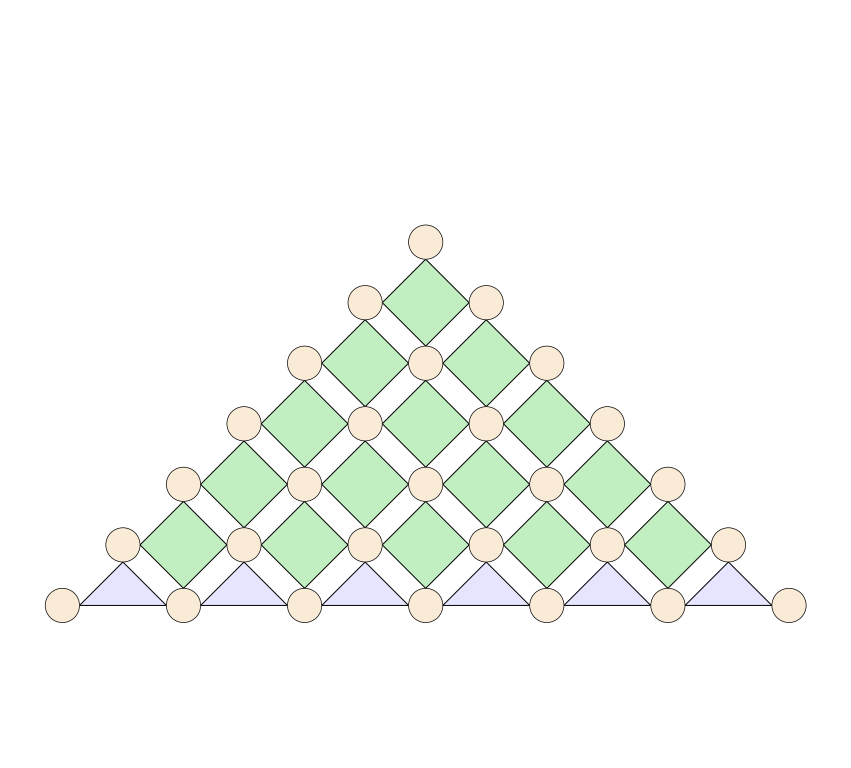

In [57]:
core_plaquettes = [
 [(0, 4), (4, 5), (0, 6), (5, 6)],
 [(0, 6), (5, 6), (0, 3), (3, 5)],
 [(0, 3), (3, 5), (0, 2), (2, 5)],
 [(4, 5), (1, 4), (5, 6), (1, 6)],
 [(5, 6), (1, 6), (3, 5), (1, 3)],
 [(3, 5), (1, 3), (2, 5), (1, 2)],
 [(1, 4), (4, 7), (1, 6), (6, 7)],
 [(1, 6), (6, 7), (1, 3), (3, 7)],
 [(1, 3), (3, 7), (1, 2), (2, 7)],
]

qubit_to_coord_dict = {(0, 1): (4, 6),
 (0, 2): (3, 4),
 (0, 3): (2, 4),
 (0, 4): (0, 4),
 (0, 5): (4, 5),
 (0, 6): (1, 4),
 (0, 7): (4, 7),
 (1, 2): (3, 6),
 (1, 3): (2, 6),
 (1, 4): (0, 6),
 (1, 5): (5, 6),
 (1, 6): (1, 6),
 (1, 7): (6, 7),
 (2, 3): (2, 3),
 (2, 4): (0, 3),
 (2, 5): (3, 5),
 (2, 6): (1, 3),
 (2, 7): (3, 7),
 (3, 4): (0, 2),
 (3, 5): (2, 5),
 (3, 6): (1, 2),
 (3, 7): (2, 7),
 (4, 5): (0, 5),
 (4, 6): (0, 1),
 (4, 7): (0, 7),
 (5, 6): (1, 5),
 (5, 7): (5, 7),
 (6, 7): (1, 7)}
graph = Graph.complete(8)
qbits = Qbits.init_qbits_from_dict(graph, qubit_to_coord_dict, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object)

visualize_(polygon_object,  polygons=core_plaquettes, rotate=True)


plt.savefig(paths.plots / "ThesisFigures/core_in_LHZ_graph.pdf")
plt.savefig(paths.plots / "Figures/pngs/core_in_LHZ_graph.png")



graph = Graph.complete(8)
qbits = Qbits.init_qbits_from_dict(graph, qubit_to_coord_dict, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object)

visualize_(polygon_object,  polygons=[], rotate=True)


plt.savefig(paths.plots / "Figures/pngs/low_alpha_LHZ_graph.png")

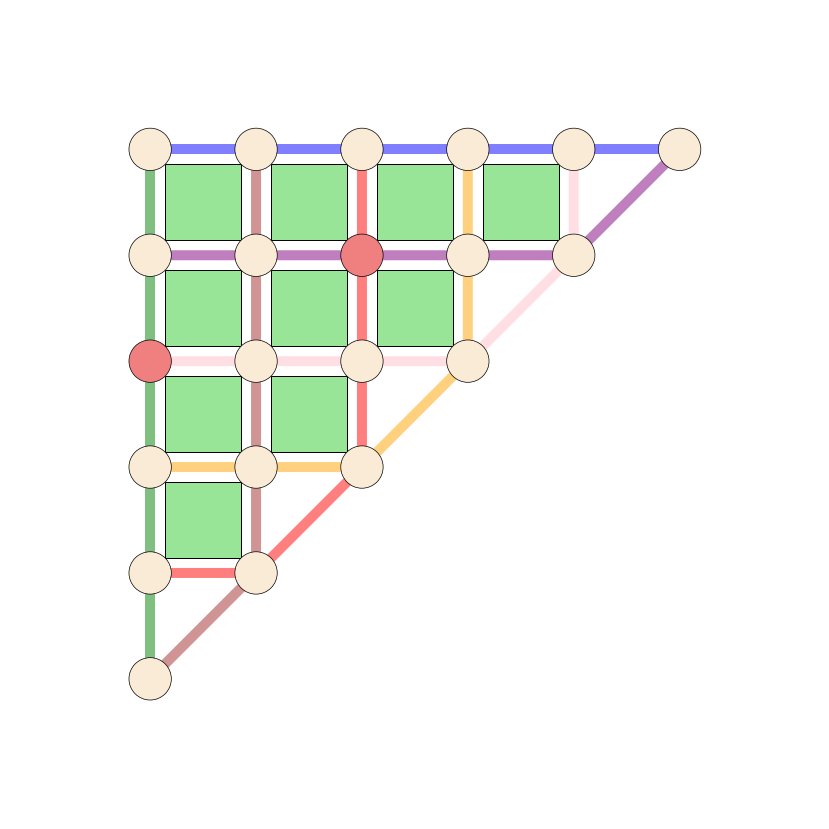

In [58]:
bad_core = {(2, 5): (0, 4), (3, 4): (2, 5), (0, 1): (3, 6), (0, 2): (0, 6), (0, 3): (2, 6), (0, 4): (5, 6), (0, 5): (4, 6), (0, 6): (1, 6), (1, 2): (0, 3), (1, 3): (2, 3), (1, 4): (3, 5), (1, 5): (3, 4), (1, 6): (1, 3), (2, 3): (0, 2), (2, 4): (0, 5), (2, 6): (0, 1), (3, 5): (2, 4), (3, 6): (1, 2), (4, 5): (4, 5), (4, 6): (1, 5), (5, 6): (1, 4)}
good_core = {(0, 1): (1, 3), (0, 2): (1, 2), (0, 3): (1, 4), (0, 4): (1, 6), (0, 5): (0, 1), (0, 6): (1, 5), (1, 2): (2, 3), (1, 3): (3, 4), (1, 4): (3, 6), (1, 5): (0, 3), (1, 6): (3, 5), (2, 3): (2, 4), (2, 4): (2, 6), (2, 6): (2, 5), (3, 5): (0, 4), (3, 6): (4, 5), (4, 5): (0, 6), (4, 6): (5, 6), (5, 6): (0, 5)}
colors = ["blue", "orange", "green", "red", "purple", "pink", "brown"] #olive
N = 7
graph_ = Graph.complete(N)
qbits_ = Qbits.init_qbits_from_dict(graph_, dict())
nodes_object_ = Nodes(qbits_, place_qbits_in_lines=True)
polygon_object_ = Polygons(nodes_object_)
energy_ = Energy(polygon_object_)
energy_.line_energy(energy_.polygon_object.nodes_object.qbits)
linewidth, alpha = 10, 0.5
for idx, node in enumerate(nodes_object_.nodes.values()):
    node.color = colors[idx]

    
graph = graph_#Graph.init_without_edges(N, edges_to_remove=[(2, 5), (3, 4)])#, (1, 6)])
qbits = Qbits.init_qbits_from_dict(graph, dict())

qbits.update_qbits_from_dict(bad_core, assign_to_core=False)
qbits[(2, 5)].ancilla=True
qbits[(2, 5)].core=True
qbits[(3, 4)].ancilla=True
qbits[(3, 4)].core=True
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, polygons=Polygons.create_polygons(graph.get_cycles(4)))
energy = Energy(polygon_object)
ax = visualize_without_labels(energy.polygon_object)
#energy.polygon_object.visualize()

for node in energy.polygon_object.nodes_object.qbits.graph.nodes:
    qubits = [qbits.coord_to_qbit_dict.get(qbit.coord) for qbit in nodes_object_.qbits_of_nodes([node])]
    qubits = [x for x in qubits if x is not None]
    qubits = [qbit.qubit for qbit in qubits]
    x, y = qubits[:2]
    logical_node = list(set(x).intersection(y))[0]
    color=colors[logical_node]
    qbits_path, _ = energy_.polygon_object.line_to_node(node)
    a = ax.plot(
        [Polygons.rotate_coords_by_45(qbit.coord, rotate)[0] for qbit in qbits_path],
        [Polygons.rotate_coords_by_45(qbit.coord, rotate)[1] for qbit in qbits_path],
        linewidth = linewidth,
        alpha=alpha,
        color=color
    )
    a[0].set_solid_capstyle('round')



ax.figure.savefig(paths.plots / f"ThesisFigures/example_of_two_ancillas_in_core_search.pdf")

plt.savefig(paths.plots / "Figures/example_of_two_ancillas_in_core_search.pdf")
plt.savefig(paths.plots / "Figures/pngs/example_of_two_ancillas_in_core_search.png")

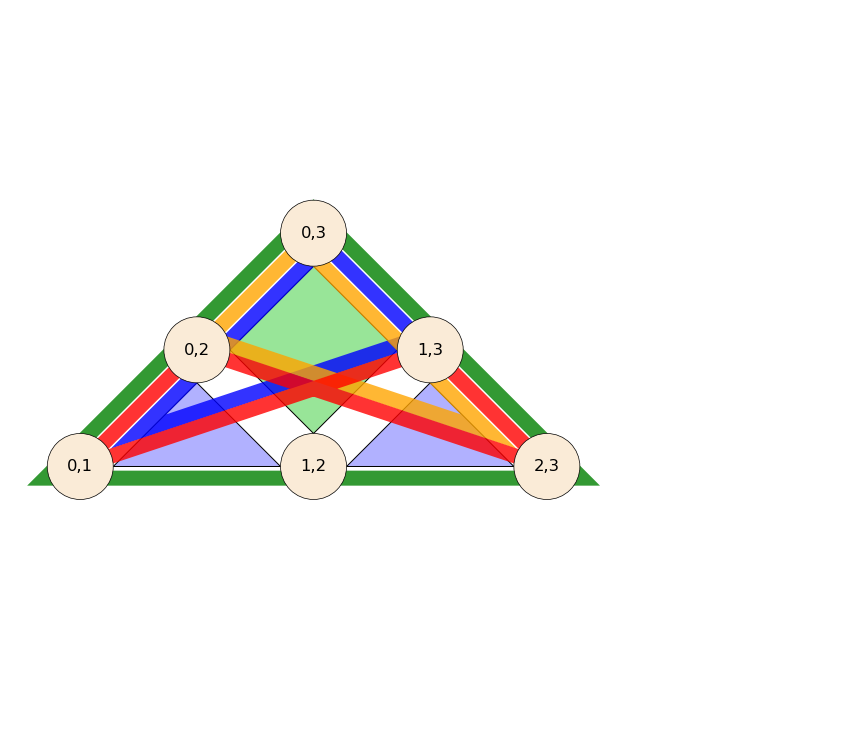

In [59]:
N = 4
rotate = True
graph = Graph.complete(N)
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
fig, ax = plt.subplots(figsize=(15, 15))
polygons = [
     [(.1, 1.4), (.9, 3), (0.1, 3)],
     [(0, 2.1), (1.6, 2.9), (0, 2.9)],
     [(-.1, .8), (1.1, 2), (2.2, 3.1), (-.1, 3.1)],
     [(0, 1), (1, 3), (2, 3), (0, 2)]
]
ax = polygon_object.visualize(ax=ax, rotate=rotate)

for idx, polygon in enumerate(polygons):

    polygon = [Polygons.rotate_coords_by_45(coord, rotate) for coord in polygon]
    patch = plt.Polygon(
        polygon,
        zorder=0,
        lw=15,
        alpha=0.8,
        color=colors[idx],
        fill=False,
    )
    ax.add_patch(patch)
    plt.subplots_adjust(wspace=-.2, hspace=-.6)




plt.savefig(paths.plots / "ThesisFigures/LHZ_N_4_with_all_constraints.pdf")
plt.savefig(paths.plots / "Figures/pngs/LHZ_N_4_with_all_constraints.png")

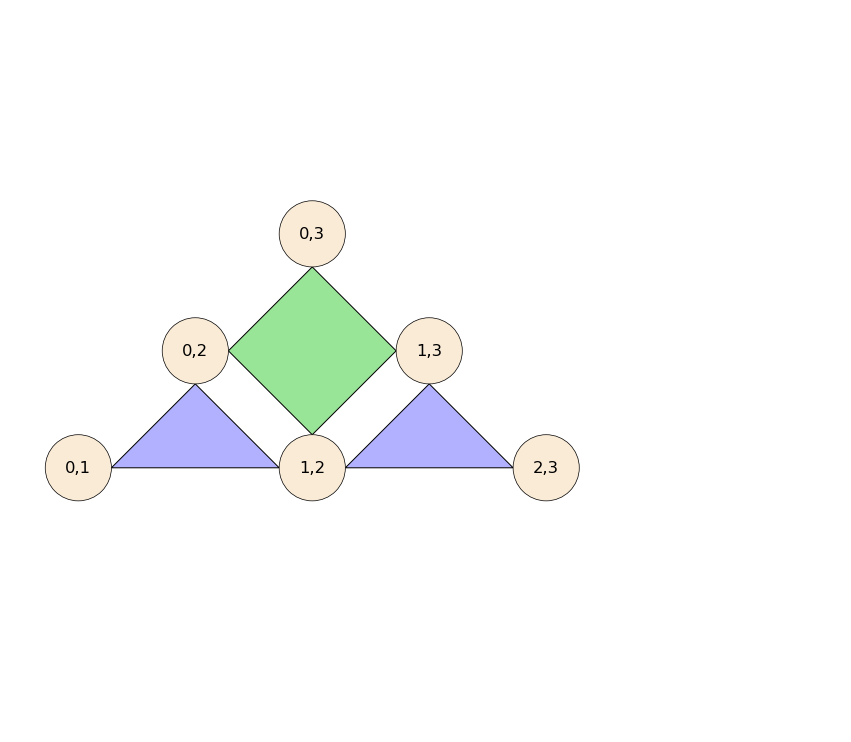

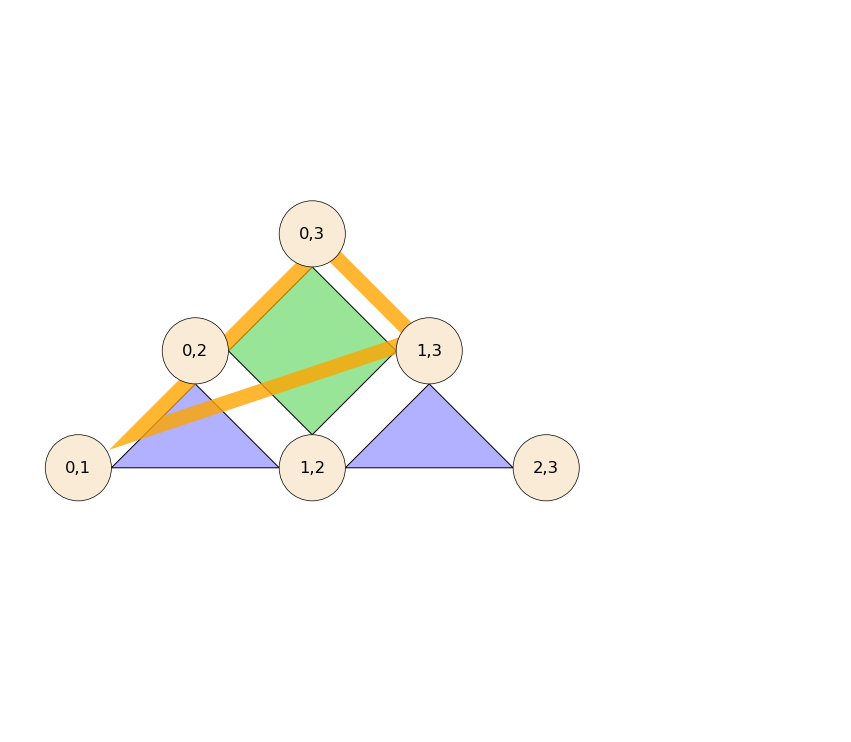

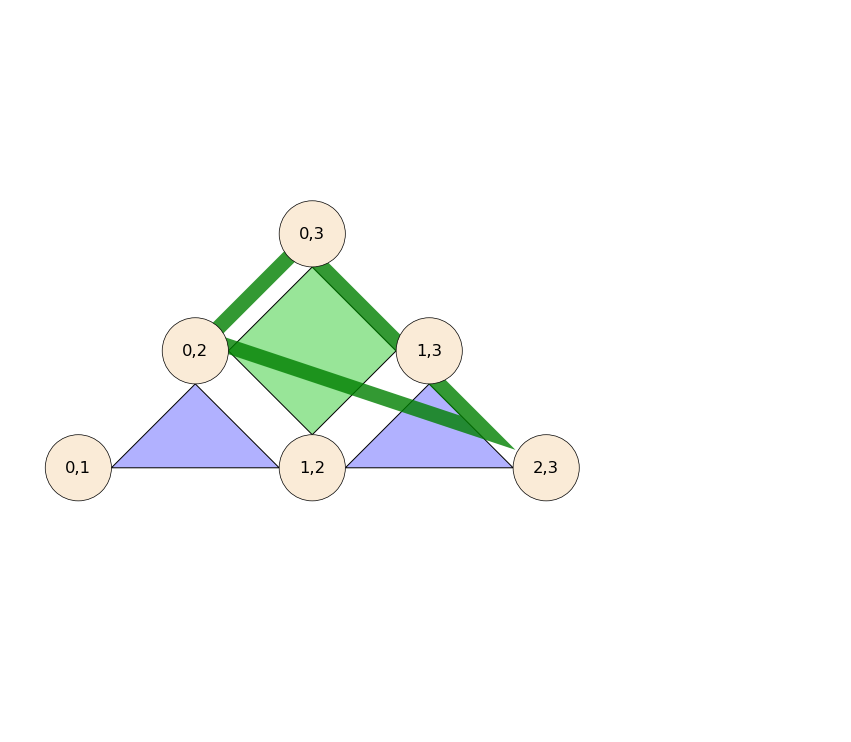

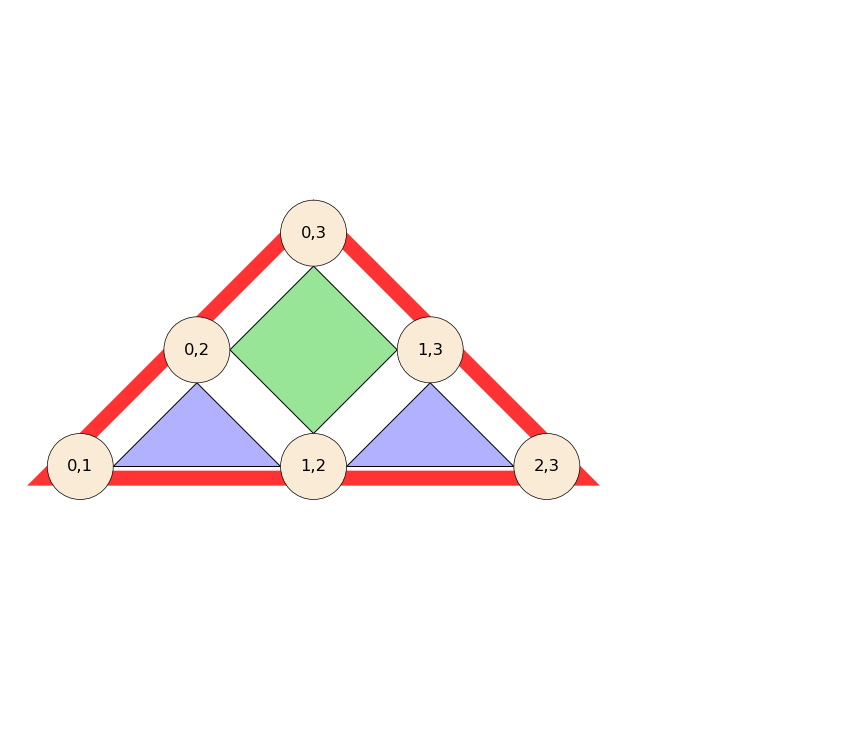

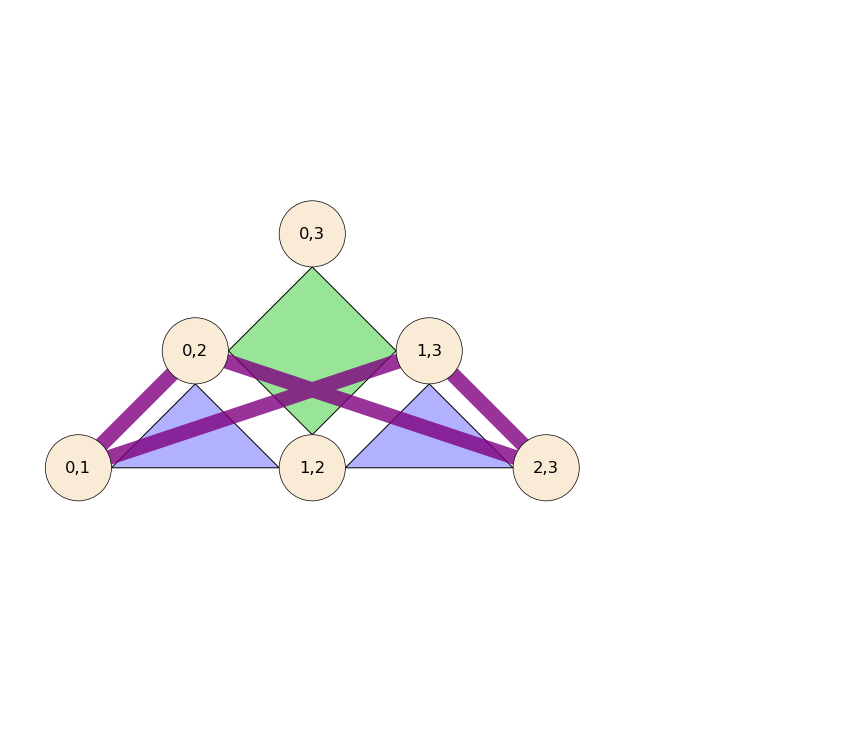

In [60]:
N = 4
rotate = True
graph = Graph.complete(N)
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
polygons = [
     [],
     [(.1, 1.4), (.9, 3), (0.1, 3)],
     [(0, 2.1), (1.6, 2.9), (0, 2.9)],
     [(-.1, .8), (1.1, 2), (2.2, 3.1), (-.1, 3.1)],
     [(0, 1), (1, 3), (2, 3), (0, 2)]
]

for idx, polygon in enumerate(polygons):
    fig, ax = plt.subplots(figsize=(15, 15))
    ax = polygon_object.visualize(ax=ax, rotate=rotate)
    if polygon != []:
        polygon = [Polygons.rotate_coords_by_45(coord, rotate) for coord in polygon]
        patch = plt.Polygon(
            polygon,
            zorder=0,
            lw=15,
            alpha=0.8,
            color=colors[idx],
            fill=False,
        )
        ax.add_patch(patch)
    plt.subplots_adjust(wspace=-.2, hspace=-.6)



    ax.figure.savefig(paths.plots / f"ThesisFigures/LHZ_N_4_with_all_constraints_{idx}.pdf")

    plt.savefig(paths.plots / f"Figures/LHZ_N_4_with_all_constraints_{idx}.pdf")
    plt.savefig(paths.plots / f"Figures/pngs/LHZ_N_4_with_all_constraints_{idx}.png")

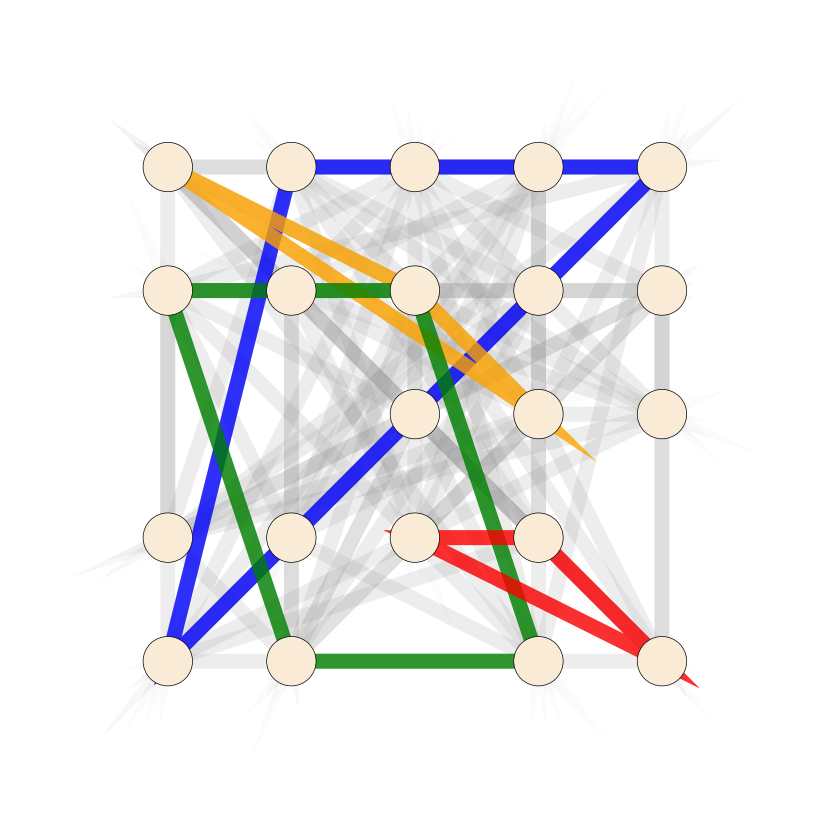

In [61]:
N = 7
rotate = False
graph = Graph.complete(N)
qbits = Qbits.init_qbits_from_dict(graph, {(0, 1): (3, 2),
 (0, 2): (1, 3),
 (0, 3): (3, 4),
 (0, 4): (2, 3),
 (0, 5): (1, 0),
 (0, 6): (1, 1),
 (1, 2): (4, 2),
 (1, 3): (1, 4),
 (1, 4): (0, 4),
 (1, 5): (0, 1),
 (1, 6): (4, 4),
 (2, 3): (2, 1),
 (2, 4): (4, 0),
 (2, 5): (4, 3),
 (2, 6): (2, 4),
 (3, 4): (3, 1),
 (3, 5): (3, 3),
 (3, 6): (0, 0),
 (4, 5): (2, 2),
 (4, 6): (3, 0),
 (5, 6): (0, 3)}, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
fig, ax = plt.subplots(figsize=(15, 15))
polygons = [[(1, 3), (1, 6), (3, 6)], [(0, 1), (0, 4), (1, 4)],
            [(0, 4), (4, 6), (0, 5), (5, 6)], [(2, 3), (2, 4), (3, 4)]
]
#ax = polygon_object.visualize(ax=ax, rotate=rotate)
ax = visualize_without_labels(polygon_object, ax=ax, rotate=rotate)

for idx, polygon in enumerate(polygons):
    polygon = [polygon_object.nodes_object.qbits.qubit_to_coord_dict[qubit] for qubit in polygon]
    polygon = [Polygons.rotate_coords_by_45(coord, rotate) for coord in polygon]
    patch = plt.Polygon(
        polygon,
        zorder=10,
        lw=15,
        alpha=0.8,
        color=colors[idx],
        fill=False,
    )
    ax.add_patch(patch)
    
for polygon in polygon_object.polygons:
    polygon = [polygon_object.nodes_object.qbits.qubit_to_coord_dict[qubit] for qubit in polygon]
    polygon = [Polygons.rotate_coords_by_45(coord, rotate) for coord in polygon]
    patch = plt.Polygon(
        polygon,
        zorder=0,
        lw=15,
        alpha=0.03,
        color='grey',
        fill=False,
    )
    ax.add_patch(patch)
plt.subplots_adjust(wspace=-.2, hspace=-.6)

plt.savefig(paths.plots / "Figures/example_of_polygons.pdf")
plt.savefig(paths.plots / "Figures/pngs/example_of_polygons.png")

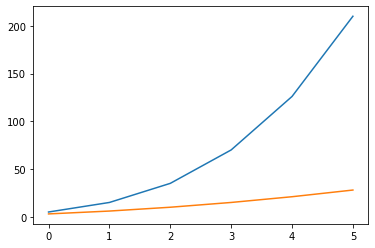

In [62]:

plt.plot([binom(N, 4)+binom(N, 3) for N in range(4, 10)])
plt.plot([N/2*(N-1) - N + 1 for N in range(4, 10)])


plt.savefig(paths.plots / "Figures/scaling_of_plaqs_vs_nonplaqs.pdf")
plt.savefig(paths.plots / "Figures/pngs/scaling_of_plaqs_vs_nonplaqs.png")

/net/fermion/csba1344/CompilerQC/graph.py:184: UserWarning: adjacency matrix contains null columns
  warnings.warn("adjacency matrix contains null columns")


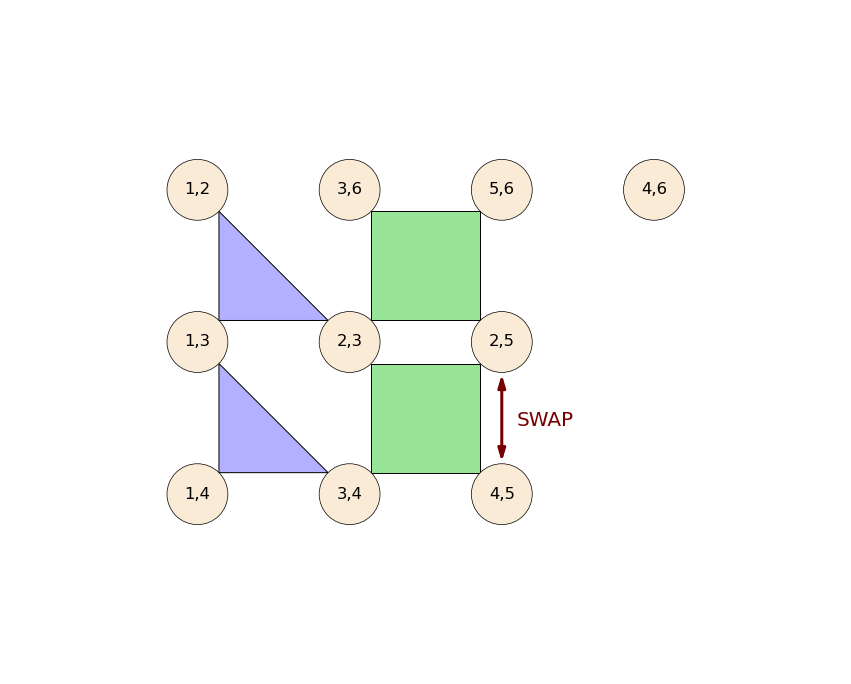

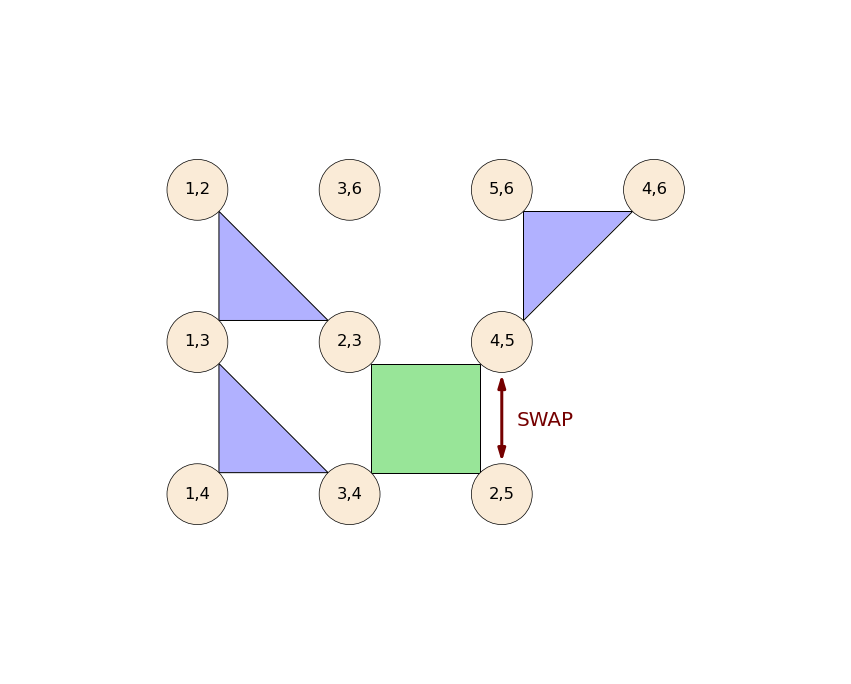

In [63]:
qubit_to_coord_dict = {
    (1, 4): (0, 0),
    (1, 3): (0, 1),
    (1, 2): (0, 2),
    (3, 4): (1, 0),
    (2, 3): (1, 1),
    (3, 6): (1, 2),
    (4, 5): (2, 0),
    (2, 5): (2, 1),
    (5, 6): (2, 2),
    (4, 6): (3, 2),
    
    
}
qubits = [(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 5),
 (4, 6),
 (5, 6)]
graph = Graph.init_without_edges(7, edges_to_remove=[qubit for qubit in qubits if qubit not in qubit_to_coord_dict])
qbits = Qbits.init_qbits_from_dict(graph, qubit_to_coord_dict, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
ax = polygon_object.visualize()
style="<|-|>,head_width=3,head_length=10"
kw = dict(arrowstyle=style)
a3 = patches.FancyArrowPatch((2, 0.2), (2, .8),lw=3,connectionstyle="arc3,rad=0", **kw, zorder=39, color='#750000')
for a in [a3]:
    plt.gca().add_patch(a)
plt.text(2.1, 0.45, "SWAP", fontsize=20, color="#750000")
ax.figure.savefig(paths.plots / f"ThesisFigures/SWAP_gate_example_0.pdf")

plt.savefig(paths.plots / "Figures/SWAP_gate_example_0.pdf")
plt.savefig(paths.plots / "Figures/pngs/SWAP_gate_example_0.png")

qubit_to_coord_dict = {
    (1, 4): (0, 0),
    (1, 3): (0, 1),
    (1, 2): (0, 2),
    (3, 4): (1, 0),
    (2, 3): (1, 1),
    (3, 6): (1, 2),
    (4, 5): (2, 1),
    (2, 5): (2, 0),
    (5, 6): (2, 2),
    (4, 6): (3, 2),
    
    
}
polygon_object.nodes_object.qbits.update_qbits_from_dict(qubit_to_coord_dict, assign_to_core=False)
polygon_object.visualize()
a3 = patches.FancyArrowPatch((2, 0.2), (2, .8),lw=3,connectionstyle="arc3,rad=0", **kw, zorder=39, color='#750000')
for a in [a3]:
    plt.gca().add_patch(a)
plt.text(2.1, 0.45, "SWAP", fontsize=20, color="#750000")
ax.figure.savefig(paths.plots / f"ThesisFigures/SWAP_gate_example_1.pdf")

plt.savefig(paths.plots / "Figures/SWAP_gate_example_1.pdf")
plt.savefig(paths.plots / "Figures/pngs/SWAP_gate_example_1.png")

In [64]:
!ls ../results/run_3

benchmark_training_set_with_BestSettings3


In [65]:
# import pickle
# def load_object(path):
#     file = open(path, "rb")
#     mc = pickle.load(file)
#     file.close()
#     return mc

# for idx, path in enumerate(['/net/fermion/csba1344/CompilerQC/benchmark/results/run_2/benchmark_training_set_with_CoreMcForDatabase2/CoreMcForDatabase2_15/7f3e18ee-4866-4f74-bebc-da2b4b392fd5_0_N_K_C_11_19_9_.pkl',
# '/net/fermion/csba1344/CompilerQC/benchmark/results/run_2/benchmark_training_set_with_CoreMcForDatabase2/CoreMcForDatabase2_9/9b172916-b300-4a71-930b-d3e62c3b65f7_4_N_K_C_12_35_24_.pkl',
# '/net/fermion/csba1344/CompilerQC/benchmark/results/run_2/benchmark_training_set_with_CoreMcForDatabase2/CoreMcForDatabase2_13/ee296614-3fc0-46d4-9285-c64fc503b217_5_N_K_C_12_26_15_.pkl',
# '/net/fermion/csba1344/CompilerQC/benchmark/results/run_2/benchmark_training_set_with_CoreMcForDatabase2/CoreMcForDatabase2_6/2829715d-8efa-4278-8eab-a1f15c30ed97_7_N_K_C_12_26_15_.pkl',
#              "/net/fermion/csba1344/CompilerQC/benchmark/results/run_1/benchmark_lhz_with_McForLHZGraphs1/McForLHZGraphs1_5/8a6334b2-bbbd-4491-aac6-f6e37c023e38_3_N_K_C_10_45_36_.pkl",
# "/net/fermion/csba1344/CompilerQC/benchmark/results/run_1/benchmark_training_set_with_McForDatabase1/McForDatabase1_6/619a4718-4973-4a88-94db-fac132d20800_25_N_K_C_9_19_11_.pkl",
# "/net/fermion/csba1344/CompilerQC/benchmark/results/run_2/benchmark_training_set_with_McForDatabaseWithCore2/McForDatabaseWithCore2_6/f9344067-d27f-443d-8ec5-3aafe0e2a7e0_0_N_K_C_17_30_14_.pkl",
# "/net/fermion/csba1344/CompilerQC/benchmark/results/run_3/benchmark_training_set_with_BestSettings3/BestSettings3_5/5563dc40-ea27-474a-a56f-934d6278ac96_21_N_K_C_17_42_26_.pkl",]):
#     mc_object = load_object(path)
#     mc_object.energy.polygon_object.visualize()
#     plt.savefig(paths.plots / f"Figures/result_plots/compiled_graph_{idx}.png")